Frank Cally A. Tabuco
OS used: Windows 10

In [1]:
import gym
from gym import spaces
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import sys
from collections import defaultdict
import plotting
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch import FloatTensor, LongTensor
from scripts.cliffwalk_env import CliffWalking
from scripts.qlearning import qLearning
from scripts.sarsa import sarsa
from scripts.crossentropy import entropyMethod

from collections  import namedtuple

matplotlib.style.use('ggplot')

Cliff walking environment is a 12x4 gridworld problem. This does not have a render function. 

The rewards for the environment are
    Cliff Reward = -100
    Goal Reward = 0
    Reward elsewhere = -1

In [3]:
#deterministic frozen lake
d_frozen = gym.make('FrozenLake-v0',is_slippery=False)

#Stochatsic frozen lake
s_frozen = gym.make('FrozenLake-v0')

#Environment for cliff walking
cliffWalk = CliffWalking()

In [4]:
#learning parameter
alpha = 0.001

#epsilon parameter
eps = 1
min_eps = 0.01
decay = 0.001

#discount parameter
gamma = 0.9

#episode
max_ep = 1000

#number of steps
max_step = 100

In [7]:
#Cross Entropy parameters
percent = 30
hidden_layer = 128

In [9]:
#results for FrozenLake Deterministic
Q_det, q_det_arr = qLearning(d_frozen)
S_det, s_det_arr = sarsa(d_frozen)
c_det_arr = entropyMethod(d_frozen,batch_size=5,alpha=0.001)

q_det_x, q_det_y = q_det_arr[:,2], q_det_arr[:,1]
s_det_x, s_det_y = s_det_arr[:,2], s_det_arr[:,1]
c_det_x, c_det_y = c_det_arr[:,4], c_det_arr[:,0]

_, q_det_arr_disc70 = qLearning(d_frozen,discount=0.7)
_, s_det_arr_disc70 = sarsa(d_frozen,discount=0.7)
c_det_arr_disc70 = entropyMethod(d_frozen,batch_size=5,discount=0.7,alpha=0.001)

q_det_x_disc70, q_det_y_disc70 = q_det_arr_disc70[:,2], q_det_arr_disc70[:,1]
s_det_x_disc70, s_det_y_disc70 = s_det_arr_disc70[:,2], s_det_arr_disc70[:,1]
c_det_x_disc70, c_det_y_disc70 = c_det_arr_disc70[:,4], c_det_arr_disc70[:,0]

_, q_det_arr_alp10 = qLearning(d_frozen,alpha=.005)
_, s_det_arr_alp10 = sarsa(d_frozen,alpha=.005)
c_det_arr_alp10 = entropyMethod(d_frozen,batch_size=5,discount=0.7,alpha=0.005)

q_det_x_alp10, q_det_y_alp10 = q_det_arr_alp10[:,2], q_det_arr_alp10[:,1]
s_det_x_alp10, s_det_y_alp10 = s_det_arr_alp10[:,2], s_det_arr_alp10[:,1]
c_det_x_alp10, c_det_y_alp10 = c_det_arr_alp10[:,4], c_det_arr_alp10[:,0]

_, q_det_arr_alp10Gamma70 = qLearning(d_frozen,discount=0.7,alpha=.005)
_, s_det_arr_alp10Gamma70 = sarsa(d_frozen,discount=0.5,alpha=.005)
c_det_arr_alp10Gamma70 = entropyMethod(d_frozen,batch_size=5,discount=0.7,alpha=.005)

q_det_x_alp10Gamma70, q_det_y_alp10Gamma70 = q_det_arr_alp10Gamma70[:,2], q_det_arr_alp10Gamma70[:,1]
s_det_x_alp10Gamma70, s_det_y_alp10Gamma70 = s_det_arr_alp10Gamma70[:,2], s_det_arr_alp10Gamma70[:,1]
c_det_x_alp10Gamma70, c_det_y_alp10Gamma70 = c_det_arr_alp10Gamma70[:,4], c_det_arr_alp10Gamma70[:,0]

_, q_det_arr_alp001Gamma70 = qLearning(d_frozen,discount=0.7,alpha=.0009)
_, s_det_arr_alp001Gamma70 = sarsa(d_frozen,discount=0.7,alpha=.0009)
c_det_arr_alp001Gamma70 = entropyMethod(d_frozen,batch_size=5,discount=0.7,alpha=.0009)

q_det_x_alp001Gamma70, q_det_y_alp001Gamma70 = q_det_arr_alp001Gamma70[:,2], q_det_arr_alp001Gamma70[:,1]
s_det_x_alp001Gamma70, s_det_y_alp001Gamma70 = s_det_arr_alp001Gamma70[:,2], s_det_arr_alp001Gamma70[:,1]
c_det_x_alp001Gamma70, c_det_y_alp001Gamma70 = c_det_arr_alp001Gamma70[:,4], c_det_arr_alp001Gamma70[:,0]

C:\Users\cally\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\cally\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


7: loss=1.3891053199768066 Mean=0.2 Sum=1.0 Cumulative=1.0
8: loss=1.370987892150879 Mean=0.2 Sum=1.0 Cumulative=2.0
18: loss=1.363803744316101 Mean=0.2 Sum=1.0 Cumulative=3.0
33: loss=1.3906737565994263 Mean=0.2 Sum=1.0 Cumulative=4.0
36: loss=1.3907781839370728 Mean=0.2 Sum=1.0 Cumulative=5.0
42: loss=1.3324428796768188 Mean=0.2 Sum=1.0 Cumulative=6.0
44: loss=1.3311532735824585 Mean=0.2 Sum=1.0 Cumulative=7.0
77: loss=1.2948358058929443 Mean=0.2 Sum=1.0 Cumulative=8.0
86: loss=1.3486558198928833 Mean=0.2 Sum=1.0 Cumulative=9.0
119: loss=1.2933112382888794 Mean=0.2 Sum=1.0 Cumulative=10.0
121: loss=1.2895550727844238 Mean=0.2 Sum=1.0 Cumulative=11.0
127: loss=1.27116060256958 Mean=0.2 Sum=1.0 Cumulative=12.0
133: loss=1.3854765892028809 Mean=0.2 Sum=1.0 Cumulative=13.0
138: loss=1.3216825723648071 Mean=0.2 Sum=1.0 Cumulative=14.0
156: loss=1.2274541854858398 Mean=0.2 Sum=1.0 Cumulative=15.0
174: loss=1.3034710884094238 Mean=0.2 Sum=1.0 Cumulative=16.0
191: loss=1.329871416091919 Mean

436: loss=1.2576074600219727 Mean=0.2 Sum=1.0 Cumulative=52.0
437: loss=1.2945481538772583 Mean=0.2 Sum=1.0 Cumulative=53.0
439: loss=1.1514034271240234 Mean=0.2 Sum=1.0 Cumulative=54.0
440: loss=1.0031663179397583 Mean=0.2 Sum=1.0 Cumulative=55.0
441: loss=1.199859857559204 Mean=0.4 Sum=2.0 Cumulative=57.0
444: loss=1.0214645862579346 Mean=0.2 Sum=1.0 Cumulative=58.0
446: loss=1.0659538507461548 Mean=0.2 Sum=1.0 Cumulative=59.0
448: loss=1.2249276638031006 Mean=0.2 Sum=1.0 Cumulative=60.0
449: loss=1.053551435470581 Mean=0.2 Sum=1.0 Cumulative=61.0
462: loss=0.8989229202270508 Mean=0.2 Sum=1.0 Cumulative=62.0
463: loss=1.2117700576782227 Mean=0.2 Sum=1.0 Cumulative=63.0
469: loss=0.887105405330658 Mean=0.2 Sum=1.0 Cumulative=64.0
470: loss=1.063231348991394 Mean=0.2 Sum=1.0 Cumulative=65.0
471: loss=0.9117849469184875 Mean=0.2 Sum=1.0 Cumulative=66.0
472: loss=1.3147876262664795 Mean=0.6 Sum=3.0 Cumulative=69.0
474: loss=0.8609533905982971 Mean=0.2 Sum=1.0 Cumulative=70.0
478: loss=1.

123: loss=1.3711374998092651 Mean=0.2 Sum=1.0 Cumulative=11.0
125: loss=1.3513810634613037 Mean=0.2 Sum=1.0 Cumulative=12.0
155: loss=1.353355050086975 Mean=0.4 Sum=2.0 Cumulative=14.0
164: loss=1.3495404720306396 Mean=0.2 Sum=1.0 Cumulative=15.0
168: loss=1.3601080179214478 Mean=0.2 Sum=1.0 Cumulative=16.0
173: loss=1.3757977485656738 Mean=0.2 Sum=1.0 Cumulative=17.0
176: loss=1.356508731842041 Mean=0.2 Sum=1.0 Cumulative=18.0
182: loss=1.3103049993515015 Mean=0.2 Sum=1.0 Cumulative=19.0
188: loss=1.3591809272766113 Mean=0.4 Sum=2.0 Cumulative=21.0
191: loss=1.3055733442306519 Mean=0.2 Sum=1.0 Cumulative=22.0
194: loss=1.3835787773132324 Mean=0.2 Sum=1.0 Cumulative=23.0
196: loss=1.3614461421966553 Mean=0.2 Sum=1.0 Cumulative=24.0
202: loss=1.3100932836532593 Mean=0.2 Sum=1.0 Cumulative=25.0
209: loss=1.2977274656295776 Mean=0.2 Sum=1.0 Cumulative=26.0
214: loss=1.286712884902954 Mean=0.2 Sum=1.0 Cumulative=27.0
232: loss=1.277600884437561 Mean=0.2 Sum=1.0 Cumulative=28.0
238: loss=1.

<function matplotlib.pyplot.show(close=None, block=None)>

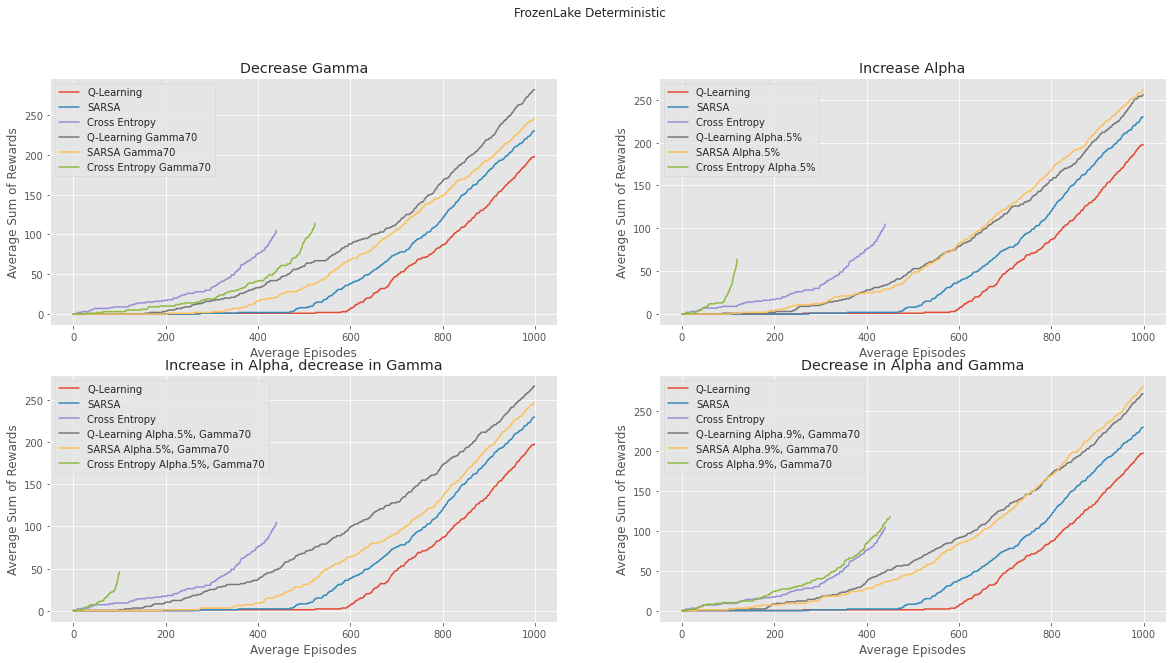

In [10]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('FrozenLake Deterministic')
axs[0,0].plot(q_det_x,q_det_y, label='Q-Learning')
axs[0,0].plot(s_det_x,s_det_y, label='SARSA')
axs[0,0].plot(c_det_x, c_det_y, label='Cross Entropy')
axs[0,0].plot(q_det_x_disc70, q_det_y_disc70, label='Q-Learning Gamma70')
axs[0,0].plot(s_det_x_disc70, s_det_y_disc70, label='SARSA Gamma70')
axs[0,0].plot(c_det_x_disc70, c_det_y_disc70, label='Cross Entropy Gamma70')

axs[0,1].plot(q_det_x,q_det_y, label='Q-Learning')
axs[0,1].plot(s_det_x,s_det_y, label='SARSA')
axs[0,1].plot(c_det_x, c_det_y, label='Cross Entropy')
axs[0,1].plot(q_det_x_alp10, q_det_y_alp10, label='Q-Learning Alpha.5%')
axs[0,1].plot(s_det_x_alp10, s_det_y_alp10, label='SARSA Alpha.5%')
axs[0,1].plot(c_det_x_alp10, c_det_y_alp10, label='Cross Entropy Alpha.5%')

axs[1,0].plot(q_det_x,q_det_y, label='Q-Learning')
axs[1,0].plot(s_det_x,s_det_y, label='SARSA')
axs[1,0].plot(c_det_x, c_det_y, label='Cross Entropy')
axs[1,0].plot(q_det_x_alp10Gamma70, q_det_y_alp10Gamma70, label='Q-Learning Alpha.5%, Gamma70')
axs[1,0].plot(s_det_x_alp10Gamma70, s_det_y_alp10Gamma70, label='SARSA Alpha.5%, Gamma70')
axs[1,0].plot(c_det_x_alp10Gamma70, c_det_y_alp10Gamma70, label='Cross Entropy Alpha.5%, Gamma70')

axs[1,1].plot(q_det_x,q_det_y, label='Q-Learning')
axs[1,1].plot(s_det_x,s_det_y, label='SARSA')
axs[1,1].plot(c_det_x, c_det_y, label='Cross Entropy')
axs[1,1].plot(q_det_x_alp001Gamma70, q_det_y_alp001Gamma70, label='Q-Learning Alpha.9%, Gamma70')
axs[1,1].plot(s_det_x_alp001Gamma70, s_det_y_alp001Gamma70, label='SARSA Alpha.9%, Gamma70')
axs[1,1].plot(c_det_x_alp001Gamma70, c_det_y_alp001Gamma70, label='Cross Alpha.9%, Gamma70')

axs[0,0].set_title('Decrease Gamma')
axs[0,1].set_title('Increase Alpha')
axs[1,0].set_title('Increase in Alpha, decrease in Gamma')
axs[1,1].set_title('Decrease in Alpha and Gamma')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Average Episodes', ylabel='Average Sum of Rewards')
    
plt.show

The learning rate parameters for Cross Entropy is set at 0.001. Having a higher learning rate would cause errors in the codes.

A decrease in the discount parameter lowered the cumulative rewards for cross-entropy initially but then yielded better results. Minimal change for q-learning, but a significant improvement for SARSA.

An increase in alpha increased learning for cross entropy hence the minimal cumulative reward. However, it still improved than the baseline. SARSA also exhibited significant improvement.

An increase in alpha but decrease in Gamma resulted to a better cross entropy despite the minimal cumulative reward. It learned faster. Significant improvements are shown in SARSA.

Decrease in both parameters allowed SARSA to match the performance of Q-Learning. The baseline cross entropy proved to have a better learning and cumulative rewards.

In [11]:
#results for FrozenLake Stochastic
_, q_sto_arr = qLearning(s_frozen)
_, s_sto_arr = sarsa(s_frozen)
c_sto_arr = entropyMethod(s_frozen,batch_size=5,alpha=0.001,sto=True)

q_sto_x, q_sto_y = q_sto_arr[:,2], q_sto_arr[:,1]
s_sto_x, s_sto_y = s_sto_arr[:,2], s_sto_arr[:,1]
c_sto_x, c_sto_y = c_sto_arr[:,4], c_sto_arr[:,0]

_, q_sto_arr_disc70 = qLearning(s_frozen,discount=0.7)
_, s_sto_arr_disc70 = sarsa(s_frozen,discount=0.7)
c_sto_arr_disc70 = entropyMethod(s_frozen,batch_size=5,discount=0.7,alpha=0.001,sto=True)

q_sto_x_disc70, q_sto_y_disc70 = q_sto_arr_disc70[:,2], q_sto_arr_disc70[:,1]
s_sto_x_disc70, s_sto_y_disc70 = s_sto_arr_disc70[:,2], s_sto_arr_disc70[:,1]
c_sto_x_disc70, c_sto_y_disc70 = c_sto_arr_disc70[:,4], c_sto_arr_disc70[:,0]


_, q_sto_arr_alp10 = qLearning(s_frozen,alpha=.1)
_, s_sto_arr_alp10 = sarsa(s_frozen,alpha=.1)
c_sto_arr_alp10 = entropyMethod(s_frozen,batch_size=5,discount=0.7,alpha=0.1,sto=True)

q_sto_x_alp10, q_sto_y_alp10 = q_sto_arr_alp10[:,2], q_sto_arr_alp10[:,1]
s_sto_x_alp10, s_sto_y_alp10 = s_sto_arr_alp10[:,2], s_sto_arr_alp10[:,1]
c_sto_x_alp10, c_sto_y_alp10 = c_sto_arr_alp10[:,4], c_sto_arr_alp10[:,0]

_, q_sto_arr_alp10Gamma70 = qLearning(s_frozen,discount=0.7,alpha=.1)
_, s_sto_arr_alp10Gamma70 = sarsa(s_frozen,discount=0.5,alpha=.1)
c_sto_arr_alp10Gamma70 = entropyMethod(s_frozen,batch_size=5,discount=0.7,alpha=.1,sto=True)

q_sto_x_alp10Gamma70, q_sto_y_alp10Gamma70 = q_sto_arr_alp10Gamma70[:,2], q_sto_arr_alp10Gamma70[:,1]
s_sto_x_alp10Gamma70, s_sto_y_alp10Gamma70 = s_sto_arr_alp10Gamma70[:,2], s_sto_arr_alp10Gamma70[:,1]
c_sto_x_alp10Gamma70, c_sto_y_alp10Gamma70 = c_sto_arr_alp10Gamma70[:,4], c_sto_arr_alp10Gamma70[:,0]

_, q_sto_arr_alp001Gamma70 = qLearning(s_frozen,discount=0.7,alpha=.0009)
_, s_sto_arr_alp001Gamma70 = sarsa(s_frozen,discount=0.7,alpha=.0009)
c_sto_arr_alp001Gamma70 = entropyMethod(s_frozen,batch_size=5,discount=0.7,alpha=.0009,sto=True)

q_sto_x_alp001Gamma70, q_sto_y_alp001Gamma70 = q_sto_arr_alp001Gamma70[:,2], q_sto_arr_alp001Gamma70[:,1]
s_sto_x_alp001Gamma70, s_sto_y_alp001Gamma70 = s_sto_arr_alp001Gamma70[:,2], s_sto_arr_alp001Gamma70[:,1]
c_sto_x_alp001Gamma70, c_sto_y_alp001Gamma70 = c_sto_arr_alp001Gamma70[:,4], c_sto_arr_alp001Gamma70[:,0]

C:\Users\cally\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\cally\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4: loss=1.3752509355545044 Mean=0.2 Sum=1.0 Cumulative=1.0
28: loss=1.354610800743103 Mean=0.2 Sum=1.0 Cumulative=2.0
35: loss=1.3740204572677612 Mean=0.2 Sum=1.0 Cumulative=3.0
75: loss=1.334869384765625 Mean=0.2 Sum=1.0 Cumulative=4.0
89: loss=1.3833973407745361 Mean=0.2 Sum=1.0 Cumulative=5.0
101: loss=1.3521915674209595 Mean=0.2 Sum=1.0 Cumulative=6.0
124: loss=1.3512123823165894 Mean=0.2 Sum=1.0 Cumulative=7.0
134: loss=1.4554777145385742 Mean=0.2 Sum=1.0 Cumulative=8.0
200: loss=1.384495735168457 Mean=0.2 Sum=1.0 Cumulative=9.0
206: loss=1.443125605583191 Mean=0.2 Sum=1.0 Cumulative=10.0
210: loss=1.4233105182647705 Mean=0.2 Sum=1.0 Cumulative=11.0
229: loss=1.2757307291030884 Mean=0.2 Sum=1.0 Cumulative=12.0
240: loss=1.4328105449676514 Mean=0.2 Sum=1.0 Cumulative=13.0
248: loss=1.4387534856796265 Mean=0.2 Sum=1.0 Cumulative=14.0
284: loss=1.373705267906189 Mean=0.2 Sum=1.0 Cumulative=15.0
307: loss=1.3822855949401855 Mean=0.2 Sum=1.0 Cumulative=16.0
333: loss=1.3764712810516357

823: loss=1.2980821132659912 Mean=0.2 Sum=1.0 Cumulative=62.0
834: loss=1.370595932006836 Mean=0.2 Sum=1.0 Cumulative=63.0
840: loss=1.3715498447418213 Mean=0.4 Sum=2.0 Cumulative=65.0
846: loss=1.2165133953094482 Mean=0.2 Sum=1.0 Cumulative=66.0
862: loss=1.2305070161819458 Mean=0.2 Sum=1.0 Cumulative=67.0
869: loss=1.3924479484558105 Mean=0.2 Sum=1.0 Cumulative=68.0
902: loss=1.2965456247329712 Mean=0.2 Sum=1.0 Cumulative=69.0
908: loss=1.2852433919906616 Mean=0.2 Sum=1.0 Cumulative=70.0
917: loss=1.2444260120391846 Mean=0.2 Sum=1.0 Cumulative=71.0
918: loss=1.4259849786758423 Mean=0.2 Sum=1.0 Cumulative=72.0
923: loss=1.2118291854858398 Mean=0.2 Sum=1.0 Cumulative=73.0
942: loss=1.2301089763641357 Mean=0.2 Sum=1.0 Cumulative=74.0
943: loss=1.438300371170044 Mean=0.2 Sum=1.0 Cumulative=75.0
952: loss=1.1237283945083618 Mean=0.2 Sum=1.0 Cumulative=76.0
959: loss=1.337707757949829 Mean=0.2 Sum=1.0 Cumulative=77.0
981: loss=1.361130952835083 Mean=0.2 Sum=1.0 Cumulative=78.0
1005: loss=1

651: loss=2.043587130629021e-07 Mean=0.2 Sum=1.0 Cumulative=126.0
652: loss=1.3411040811206476e-07 Mean=0.2 Sum=1.0 Cumulative=127.0
658: loss=7.947283364728719e-08 Mean=0.2 Sum=1.0 Cumulative=128.0
661: loss=2.3841850804728892e-07 Mean=0.2 Sum=1.0 Cumulative=129.0
670: loss=8.940693874137651e-08 Mean=0.2 Sum=1.0 Cumulative=130.0
678: loss=8.940693874137651e-08 Mean=0.2 Sum=1.0 Cumulative=131.0
692: loss=1.950696884023273e-07 Mean=0.2 Sum=1.0 Cumulative=132.0
705: loss=8.940693874137651e-08 Mean=0.2 Sum=1.0 Cumulative=133.0
706: loss=1.7881387748275301e-07 Mean=0.2 Sum=1.0 Cumulative=134.0
708: loss=6.502322946744243e-08 Mean=0.2 Sum=1.0 Cumulative=135.0
717: loss=1.3709021686736378e-06 Mean=0.2 Sum=1.0 Cumulative=136.0
724: loss=1.6505896383023355e-07 Mean=0.2 Sum=1.0 Cumulative=137.0
725: loss=1.5894566729457438e-07 Mean=0.2 Sum=1.0 Cumulative=138.0
726: loss=1.2069905324096908e-06 Mean=0.2 Sum=1.0 Cumulative=139.0
728: loss=1.7166081534014666e-06 Mean=0.2 Sum=1.0 Cumulative=140.0
73

399: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=95.0
408: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=96.0
423: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=97.0
433: loss=0.0 Mean=0.4 Sum=2.0 Cumulative=99.0
439: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=100.0
441: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=101.0
443: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=102.0
444: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=103.0
446: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=104.0
447: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=105.0
449: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=106.0
450: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=107.0
451: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=108.0
469: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=109.0
470: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=110.0
483: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=111.0
491: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=112.0
492: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=113.0
495: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=114.0
500: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=115.0
502: loss=0.0 Mean=0.2 Sum=1.0 Cumulative=11

310: loss=1.3575555086135864 Mean=0.2 Sum=1.0 Cumulative=29.0
316: loss=1.3694777488708496 Mean=0.2 Sum=1.0 Cumulative=30.0
326: loss=1.3350880146026611 Mean=0.2 Sum=1.0 Cumulative=31.0
329: loss=1.365722417831421 Mean=0.2 Sum=1.0 Cumulative=32.0
340: loss=1.3862131834030151 Mean=0.2 Sum=1.0 Cumulative=33.0
359: loss=1.3369112014770508 Mean=0.2 Sum=1.0 Cumulative=34.0
371: loss=1.3336331844329834 Mean=0.2 Sum=1.0 Cumulative=35.0
418: loss=1.3331103324890137 Mean=0.2 Sum=1.0 Cumulative=36.0
419: loss=1.3145661354064941 Mean=0.2 Sum=1.0 Cumulative=37.0
426: loss=1.3592474460601807 Mean=0.2 Sum=1.0 Cumulative=38.0
450: loss=1.4176850318908691 Mean=0.2 Sum=1.0 Cumulative=39.0
467: loss=1.3605537414550781 Mean=0.2 Sum=1.0 Cumulative=40.0
468: loss=1.3638641834259033 Mean=0.2 Sum=1.0 Cumulative=41.0
469: loss=1.2781360149383545 Mean=0.2 Sum=1.0 Cumulative=42.0
495: loss=1.29929780960083 Mean=0.2 Sum=1.0 Cumulative=43.0
500: loss=1.3812763690948486 Mean=0.2 Sum=1.0 Cumulative=44.0
526: loss=1

<function matplotlib.pyplot.show(close=None, block=None)>

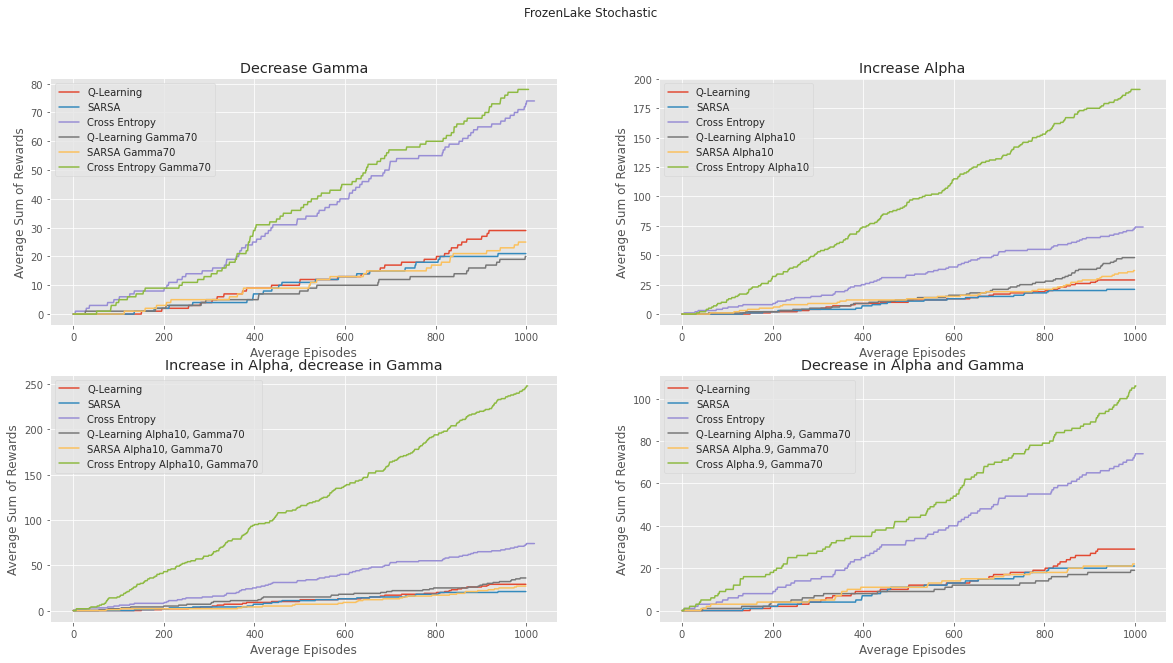

In [12]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('FrozenLake Stochastic')
axs[0,0].plot(q_sto_x,q_sto_y, label='Q-Learning')
axs[0,0].plot(s_sto_x,s_sto_y, label='SARSA')
axs[0,0].plot(c_sto_x, c_sto_y, label='Cross Entropy')
axs[0,0].plot(q_sto_x_disc70, q_sto_y_disc70, label='Q-Learning Gamma70')
axs[0,0].plot(s_sto_x_disc70, s_sto_y_disc70, label='SARSA Gamma70')
axs[0,0].plot(c_sto_x_disc70, c_sto_y_disc70, label='Cross Entropy Gamma70')

axs[0,1].plot(q_sto_x,q_sto_y, label='Q-Learning')
axs[0,1].plot(s_sto_x,s_sto_y, label='SARSA')
axs[0,1].plot(c_sto_x, c_sto_y, label='Cross Entropy')
axs[0,1].plot(q_sto_x_alp10, q_sto_y_alp10, label='Q-Learning Alpha10')
axs[0,1].plot(s_sto_x_alp10, s_sto_y_alp10, label='SARSA Alpha10')
axs[0,1].plot(c_sto_x_alp10, c_sto_y_alp10, label='Cross Entropy Alpha10')

axs[1,0].plot(q_sto_x,q_sto_y, label='Q-Learning')
axs[1,0].plot(s_sto_x,s_sto_y, label='SARSA')
axs[1,0].plot(c_sto_x, c_sto_y, label='Cross Entropy')
axs[1,0].plot(q_sto_x_alp10Gamma70, q_sto_y_alp10Gamma70, label='Q-Learning Alpha10, Gamma70')
axs[1,0].plot(s_sto_x_alp10Gamma70, s_sto_y_alp10Gamma70, label='SARSA Alpha10, Gamma70')
axs[1,0].plot(c_sto_x_alp10Gamma70, c_sto_y_alp10Gamma70, label='Cross Entropy Alpha10, Gamma70')

axs[1,1].plot(q_sto_x,q_sto_y, label='Q-Learning')
axs[1,1].plot(s_sto_x,s_sto_y, label='SARSA')
axs[1,1].plot(c_sto_x, c_sto_y, label='Cross Entropy')
axs[1,1].plot(q_sto_x_alp001Gamma70, q_sto_y_alp001Gamma70, label='Q-Learning Alpha.9, Gamma70')
axs[1,1].plot(s_sto_x_alp001Gamma70, s_sto_y_alp001Gamma70, label='SARSA Alpha.9, Gamma70')
axs[1,1].plot(c_sto_x_alp001Gamma70, c_sto_y_alp001Gamma70, label='Cross Alpha.9, Gamma70')

axs[0,0].set_title('Decrease Gamma')
axs[0,1].set_title('Increase Alpha')
axs[1,0].set_title('Increase in Alpha, decrease in Gamma')
axs[1,1].set_title('Decrease in Alpha and Gamma')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Average Episodes', ylabel='Average Sum of Rewards')
    
plt.show

Only cross entropy benefited from changes in the gamma parameter for the upper left figure. Other algorithms had lower cumulative rewards than baseline.

With a change in alpha, cross entropy yielded the bnest performance where an increase in cumulative rewards are also displayed. This also improved the performance of SARSA and Q-Learning than the baseline.

Other changes also resulted to similar results from the second statement. Cross Entropy is still the best compared to SARSA and Q-Learning.

In [13]:
_, q_arr = qLearning(cliffWalk,episode=4000)
_, s_arr = sarsa(cliffWalk,episode=4000)
c_arr = entropyMethod(cliffWalk,episode=4000,batch_size=2,alpha=0.001,cliff=True)

C:\Users\cally\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\cally\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0: loss=1.3856900930404663 Mean=-115.5 Sum=-231.0 Cumulative=-231.0
1: loss=1.3760713338851929 Mean=-115.5 Sum=-231.0 Cumulative=-462.0
2: loss=1.390777826309204 Mean=-118.0 Sum=-236.0 Cumulative=-698.0
3: loss=1.3086899518966675 Mean=-103.0 Sum=-206.0 Cumulative=-904.0
4: loss=1.377247929573059 Mean=-115.0 Sum=-230.0 Cumulative=-1134.0
5: loss=1.3322265148162842 Mean=-102.5 Sum=-205.0 Cumulative=-1339.0
6: loss=1.334454894065857 Mean=-104.5 Sum=-209.0 Cumulative=-1548.0
7: loss=1.4074411392211914 Mean=-126.0 Sum=-252.0 Cumulative=-1800.0
8: loss=1.363254427909851 Mean=-112.5 Sum=-225.0 Cumulative=-2025.0
9: loss=1.4634861946105957 Mean=-100.5 Sum=-201.0 Cumulative=-2226.0
10: loss=1.4125747680664062 Mean=-105.0 Sum=-210.0 Cumulative=-2436.0
11: loss=1.3607964515686035 Mean=-104.0 Sum=-208.0 Cumulative=-2644.0
12: loss=1.391860008239746 Mean=-119.0 Sum=-238.0 Cumulative=-2882.0
13: loss=1.345611572265625 Mean=-103.0 Sum=-206.0 Cumulative=-3088.0
14: loss=1.3445940017700195 Mean=-103.5 

177: loss=1.3165339231491089 Mean=-107.0 Sum=-214.0 Cumulative=-38061.0
178: loss=1.1422089338302612 Mean=-101.0 Sum=-202.0 Cumulative=-38263.0
179: loss=1.3508195877075195 Mean=-101.5 Sum=-203.0 Cumulative=-38466.0
180: loss=1.3328957557678223 Mean=-105.5 Sum=-211.0 Cumulative=-38677.0
181: loss=1.4321849346160889 Mean=-106.0 Sum=-212.0 Cumulative=-38889.0
183: loss=1.353927493095398 Mean=-108.5 Sum=-217.0 Cumulative=-39306.0
185: loss=1.4107950925827026 Mean=-102.5 Sum=-205.0 Cumulative=-39715.0
186: loss=1.347002625465393 Mean=-101.5 Sum=-203.0 Cumulative=-39918.0
187: loss=1.3458709716796875 Mean=-101.0 Sum=-202.0 Cumulative=-40120.0
188: loss=1.3146283626556396 Mean=-112.5 Sum=-225.0 Cumulative=-40345.0
189: loss=1.287955641746521 Mean=-104.5 Sum=-209.0 Cumulative=-40554.0
190: loss=1.5242559909820557 Mean=-100.5 Sum=-201.0 Cumulative=-40755.0
191: loss=1.2970128059387207 Mean=-106.0 Sum=-212.0 Cumulative=-40967.0
192: loss=1.4108115434646606 Mean=-108.0 Sum=-216.0 Cumulative=-411

337: loss=0.9542663097381592 Mean=-105.5 Sum=-211.0 Cumulative=-71368.0
338: loss=1.205379843711853 Mean=-109.5 Sum=-219.0 Cumulative=-71587.0
339: loss=0.8752722144126892 Mean=-102.5 Sum=-205.0 Cumulative=-71792.0
340: loss=1.112480640411377 Mean=-100.5 Sum=-201.0 Cumulative=-71993.0
341: loss=0.9693567156791687 Mean=-112.5 Sum=-225.0 Cumulative=-72218.0
342: loss=0.9485920071601868 Mean=-101.5 Sum=-203.0 Cumulative=-72421.0
343: loss=1.2843554019927979 Mean=-106.5 Sum=-213.0 Cumulative=-72634.0
344: loss=0.8114644885063171 Mean=-103.0 Sum=-206.0 Cumulative=-72840.0
345: loss=0.7180830836296082 Mean=-104.0 Sum=-208.0 Cumulative=-73048.0
346: loss=1.0745755434036255 Mean=-107.0 Sum=-214.0 Cumulative=-73262.0
347: loss=0.9327273368835449 Mean=-101.0 Sum=-202.0 Cumulative=-73464.0
348: loss=0.8417506814002991 Mean=-102.0 Sum=-204.0 Cumulative=-73668.0
349: loss=1.2966156005859375 Mean=-108.5 Sum=-217.0 Cumulative=-73885.0
350: loss=0.8318361043930054 Mean=-101.5 Sum=-203.0 Cumulative=-74

466: loss=1.580844521522522 Mean=-104.5 Sum=-209.0 Cumulative=-98636.0
467: loss=1.1438002586364746 Mean=-100.5 Sum=-201.0 Cumulative=-98837.0
468: loss=0.5253923535346985 Mean=-104.5 Sum=-209.0 Cumulative=-99046.0
469: loss=0.7546405792236328 Mean=-101.5 Sum=-203.0 Cumulative=-99249.0
470: loss=0.806785523891449 Mean=-108.5 Sum=-217.0 Cumulative=-99466.0
471: loss=0.9679481983184814 Mean=-104.5 Sum=-209.0 Cumulative=-99675.0
472: loss=0.9471925497055054 Mean=-103.0 Sum=-206.0 Cumulative=-99881.0
473: loss=1.1526038646697998 Mean=-108.0 Sum=-216.0 Cumulative=-100097.0
474: loss=0.7967024445533752 Mean=-107.0 Sum=-214.0 Cumulative=-100311.0
475: loss=0.8207875490188599 Mean=-103.5 Sum=-207.0 Cumulative=-100518.0
476: loss=0.6139155626296997 Mean=-109.5 Sum=-219.0 Cumulative=-100737.0
477: loss=0.5432619452476501 Mean=-104.0 Sum=-208.0 Cumulative=-100945.0
478: loss=1.3900697231292725 Mean=-107.5 Sum=-215.0 Cumulative=-101160.0
479: loss=0.7535807490348816 Mean=-109.5 Sum=-219.0 Cumulati

596: loss=0.9207941293716431 Mean=-107.0 Sum=-214.0 Cumulative=-126136.0
597: loss=1.3981471061706543 Mean=-105.0 Sum=-210.0 Cumulative=-126346.0
598: loss=0.7643538117408752 Mean=-101.5 Sum=-203.0 Cumulative=-126549.0
599: loss=1.167300820350647 Mean=-108.5 Sum=-217.0 Cumulative=-126766.0
600: loss=0.582351565361023 Mean=-104.0 Sum=-208.0 Cumulative=-126974.0
601: loss=1.0255250930786133 Mean=-105.0 Sum=-210.0 Cumulative=-127184.0
602: loss=0.5639495849609375 Mean=-105.0 Sum=-210.0 Cumulative=-127394.0
603: loss=0.6477022767066956 Mean=-112.5 Sum=-225.0 Cumulative=-127619.0
604: loss=1.1766853332519531 Mean=-113.0 Sum=-226.0 Cumulative=-127845.0
605: loss=1.0494840145111084 Mean=-109.5 Sum=-219.0 Cumulative=-128064.0
606: loss=1.3347095251083374 Mean=-102.5 Sum=-205.0 Cumulative=-128269.0
607: loss=1.2509524822235107 Mean=-104.0 Sum=-208.0 Cumulative=-128477.0
608: loss=1.7393187284469604 Mean=-103.5 Sum=-207.0 Cumulative=-128684.0
609: loss=1.4488731622695923 Mean=-101.5 Sum=-203.0 C

770: loss=0.5227174162864685 Mean=-105.0 Sum=-210.0 Cumulative=-163287.0
771: loss=1.447788953781128 Mean=-108.5 Sum=-217.0 Cumulative=-163504.0
772: loss=1.0677350759506226 Mean=-104.0 Sum=-208.0 Cumulative=-163712.0
773: loss=0.7341605424880981 Mean=-125.0 Sum=-250.0 Cumulative=-163962.0
774: loss=0.8609699606895447 Mean=-109.5 Sum=-219.0 Cumulative=-164181.0
775: loss=0.5585947036743164 Mean=-104.5 Sum=-209.0 Cumulative=-164390.0
776: loss=2.0618855953216553 Mean=-101.5 Sum=-203.0 Cumulative=-164593.0
777: loss=0.8232871890068054 Mean=-120.0 Sum=-240.0 Cumulative=-164833.0
778: loss=0.671636164188385 Mean=-106.0 Sum=-212.0 Cumulative=-165045.0
779: loss=0.5260215401649475 Mean=-106.0 Sum=-212.0 Cumulative=-165257.0
780: loss=0.7749893665313721 Mean=-101.5 Sum=-203.0 Cumulative=-165460.0
781: loss=1.681613564491272 Mean=-103.5 Sum=-207.0 Cumulative=-165667.0
782: loss=0.7540106177330017 Mean=-117.5 Sum=-235.0 Cumulative=-165902.0
783: loss=0.7201662659645081 Mean=-109.5 Sum=-219.0 Cu

941: loss=1.0050522089004517 Mean=-103.5 Sum=-207.0 Cumulative=-199900.0
942: loss=0.6376103162765503 Mean=-115.5 Sum=-231.0 Cumulative=-200131.0
943: loss=1.4676451683044434 Mean=-104.5 Sum=-209.0 Cumulative=-200340.0
944: loss=0.5180070400238037 Mean=-107.0 Sum=-214.0 Cumulative=-200554.0
945: loss=1.4258747100830078 Mean=-102.5 Sum=-205.0 Cumulative=-200759.0
946: loss=0.9720803499221802 Mean=-102.0 Sum=-204.0 Cumulative=-200963.0
947: loss=0.6996739506721497 Mean=-107.0 Sum=-214.0 Cumulative=-201177.0
948: loss=1.3963552713394165 Mean=-104.5 Sum=-209.0 Cumulative=-201386.0
949: loss=0.9358483552932739 Mean=-105.0 Sum=-210.0 Cumulative=-201596.0
950: loss=1.3643320798873901 Mean=-101.5 Sum=-203.0 Cumulative=-201799.0
951: loss=1.168906807899475 Mean=-109.0 Sum=-218.0 Cumulative=-202017.0
952: loss=1.043610692024231 Mean=-108.5 Sum=-217.0 Cumulative=-202234.0
954: loss=1.0381863117218018 Mean=-107.0 Sum=-214.0 Cumulative=-202650.0
955: loss=1.104671597480774 Mean=-102.0 Sum=-204.0 Cu

1105: loss=0.8136919736862183 Mean=-108.5 Sum=-217.0 Cumulative=-235016.0
1106: loss=1.0102216005325317 Mean=-113.0 Sum=-226.0 Cumulative=-235242.0
1107: loss=0.9008781313896179 Mean=-106.5 Sum=-213.0 Cumulative=-235455.0
1108: loss=1.0721524953842163 Mean=-101.5 Sum=-203.0 Cumulative=-235658.0
1109: loss=1.0343657732009888 Mean=-105.0 Sum=-210.0 Cumulative=-235868.0
1110: loss=1.143206000328064 Mean=-103.5 Sum=-207.0 Cumulative=-236075.0
1111: loss=1.3977266550064087 Mean=-107.5 Sum=-215.0 Cumulative=-236290.0
1112: loss=0.7511526942253113 Mean=-102.5 Sum=-205.0 Cumulative=-236495.0
1113: loss=0.8007659912109375 Mean=-113.5 Sum=-227.0 Cumulative=-236722.0
1114: loss=0.8312625885009766 Mean=-112.0 Sum=-224.0 Cumulative=-236946.0
1115: loss=0.6692174077033997 Mean=-107.5 Sum=-215.0 Cumulative=-237161.0
1116: loss=0.8083640933036804 Mean=-109.0 Sum=-218.0 Cumulative=-237379.0
1117: loss=0.9885916113853455 Mean=-103.5 Sum=-207.0 Cumulative=-237586.0
1118: loss=1.1294411420822144 Mean=-106

1254: loss=0.773411750793457 Mean=-107.5 Sum=-215.0 Cumulative=-267227.0
1255: loss=1.0439800024032593 Mean=-103.0 Sum=-206.0 Cumulative=-267433.0
1256: loss=1.3081039190292358 Mean=-112.0 Sum=-224.0 Cumulative=-267657.0
1257: loss=0.7072404026985168 Mean=-108.5 Sum=-217.0 Cumulative=-267874.0
1258: loss=1.1622437238693237 Mean=-105.5 Sum=-211.0 Cumulative=-268085.0
1259: loss=0.7184062004089355 Mean=-109.5 Sum=-219.0 Cumulative=-268304.0
1260: loss=0.7457378506660461 Mean=-107.0 Sum=-214.0 Cumulative=-268518.0
1261: loss=1.2799018621444702 Mean=-107.0 Sum=-214.0 Cumulative=-268732.0
1262: loss=0.9371728897094727 Mean=-117.0 Sum=-234.0 Cumulative=-268966.0
1263: loss=0.667141854763031 Mean=-106.0 Sum=-212.0 Cumulative=-269178.0
1264: loss=0.7976987957954407 Mean=-114.5 Sum=-229.0 Cumulative=-269407.0
1265: loss=1.0519150495529175 Mean=-106.0 Sum=-212.0 Cumulative=-269619.0
1266: loss=0.860000729560852 Mean=-112.0 Sum=-224.0 Cumulative=-269843.0
1267: loss=1.2232763767242432 Mean=-108.5

1404: loss=0.3813726007938385 Mean=-119.5 Sum=-239.0 Cumulative=-300886.0
1405: loss=0.8632540702819824 Mean=-118.0 Sum=-236.0 Cumulative=-301122.0
1406: loss=0.5089110136032104 Mean=-119.0 Sum=-238.0 Cumulative=-301360.0
1407: loss=0.6398172974586487 Mean=-116.5 Sum=-233.0 Cumulative=-301593.0
1408: loss=0.9317432641983032 Mean=-114.5 Sum=-229.0 Cumulative=-301822.0
1409: loss=0.6834496259689331 Mean=-110.0 Sum=-220.0 Cumulative=-302042.0
1410: loss=0.8946033716201782 Mean=-113.5 Sum=-227.0 Cumulative=-302269.0
1411: loss=1.0896716117858887 Mean=-103.0 Sum=-206.0 Cumulative=-302475.0
1412: loss=0.7682069540023804 Mean=-114.5 Sum=-229.0 Cumulative=-302704.0
1413: loss=0.9326831102371216 Mean=-123.0 Sum=-246.0 Cumulative=-302950.0
1414: loss=0.6423798203468323 Mean=-119.5 Sum=-239.0 Cumulative=-303189.0
1415: loss=1.0549947023391724 Mean=-108.5 Sum=-217.0 Cumulative=-303406.0
1416: loss=0.8129459619522095 Mean=-132.5 Sum=-265.0 Cumulative=-303671.0
1417: loss=1.1191917657852173 Mean=-10

1540: loss=0.976954460144043 Mean=-110.0 Sum=-220.0 Cumulative=-331653.0
1541: loss=0.6342394351959229 Mean=-134.0 Sum=-268.0 Cumulative=-331921.0
1542: loss=0.6013122200965881 Mean=-105.0 Sum=-210.0 Cumulative=-332131.0
1543: loss=1.0242936611175537 Mean=-114.0 Sum=-228.0 Cumulative=-332359.0
1544: loss=0.6211286187171936 Mean=-115.0 Sum=-230.0 Cumulative=-332589.0
1545: loss=0.49252209067344666 Mean=-121.0 Sum=-242.0 Cumulative=-332831.0
1546: loss=0.998264729976654 Mean=-110.5 Sum=-221.0 Cumulative=-333052.0
1547: loss=0.6599400043487549 Mean=-106.0 Sum=-212.0 Cumulative=-333264.0
1548: loss=0.5109858512878418 Mean=-117.5 Sum=-235.0 Cumulative=-333499.0
1549: loss=0.5065191388130188 Mean=-106.5 Sum=-213.0 Cumulative=-333712.0
1550: loss=0.5271168947219849 Mean=-128.0 Sum=-256.0 Cumulative=-333968.0
1551: loss=0.4152752757072449 Mean=-113.0 Sum=-226.0 Cumulative=-334194.0
1552: loss=0.4271775782108307 Mean=-133.0 Sum=-266.0 Cumulative=-334460.0
1553: loss=0.944599449634552 Mean=-110.

1681: loss=0.871662974357605 Mean=-108.5 Sum=-217.0 Cumulative=-363575.0
1682: loss=1.1394097805023193 Mean=-111.5 Sum=-223.0 Cumulative=-363798.0
1683: loss=1.0810319185256958 Mean=-113.5 Sum=-227.0 Cumulative=-364025.0
1684: loss=0.9564613699913025 Mean=-107.0 Sum=-214.0 Cumulative=-364239.0
1685: loss=1.1302891969680786 Mean=-103.0 Sum=-206.0 Cumulative=-364445.0
1686: loss=0.7082818150520325 Mean=-106.5 Sum=-213.0 Cumulative=-364658.0
1687: loss=1.2127673625946045 Mean=-114.0 Sum=-228.0 Cumulative=-364886.0
1688: loss=1.4910329580307007 Mean=-100.5 Sum=-201.0 Cumulative=-365087.0
1689: loss=0.5896960496902466 Mean=-104.0 Sum=-208.0 Cumulative=-365295.0
1690: loss=0.9702975153923035 Mean=-110.5 Sum=-221.0 Cumulative=-365516.0
1692: loss=0.6864564418792725 Mean=-104.0 Sum=-208.0 Cumulative=-365932.0
1693: loss=1.0294474363327026 Mean=-103.0 Sum=-206.0 Cumulative=-366138.0
1694: loss=0.4802308976650238 Mean=-107.5 Sum=-215.0 Cumulative=-366353.0
1695: loss=0.8733130693435669 Mean=-102

1843: loss=0.8938985466957092 Mean=-105.0 Sum=-210.0 Cumulative=-398394.0
1844: loss=1.0546296834945679 Mean=-101.0 Sum=-202.0 Cumulative=-398596.0
1845: loss=0.9661772847175598 Mean=-104.5 Sum=-209.0 Cumulative=-398805.0
1846: loss=1.1017862558364868 Mean=-103.0 Sum=-206.0 Cumulative=-399011.0
1847: loss=1.1125060319900513 Mean=-104.5 Sum=-209.0 Cumulative=-399220.0
1848: loss=1.2680840492248535 Mean=-102.0 Sum=-204.0 Cumulative=-399424.0
1849: loss=1.3900270462036133 Mean=-102.5 Sum=-205.0 Cumulative=-399629.0
1850: loss=1.167638897895813 Mean=-104.0 Sum=-208.0 Cumulative=-399837.0
1851: loss=0.6089738607406616 Mean=-104.5 Sum=-209.0 Cumulative=-400046.0
1852: loss=0.7588344812393188 Mean=-106.5 Sum=-213.0 Cumulative=-400259.0
1853: loss=1.4113799333572388 Mean=-107.0 Sum=-214.0 Cumulative=-400473.0
1854: loss=1.1083686351776123 Mean=-105.0 Sum=-210.0 Cumulative=-400683.0
1855: loss=1.0262709856033325 Mean=-101.0 Sum=-202.0 Cumulative=-400885.0
1856: loss=1.5587985515594482 Mean=-102

2014: loss=0.6145839095115662 Mean=-104.0 Sum=-208.0 Cumulative=-434913.0
2015: loss=0.5644891262054443 Mean=-104.5 Sum=-209.0 Cumulative=-435122.0
2017: loss=0.735016405582428 Mean=-102.0 Sum=-204.0 Cumulative=-435534.0
2018: loss=0.3634447157382965 Mean=-110.5 Sum=-221.0 Cumulative=-435755.0
2019: loss=0.7359750866889954 Mean=-102.5 Sum=-205.0 Cumulative=-435960.0
2020: loss=0.9523969292640686 Mean=-112.5 Sum=-225.0 Cumulative=-436185.0
2021: loss=1.1480363607406616 Mean=-108.0 Sum=-216.0 Cumulative=-436401.0
2022: loss=1.0186671018600464 Mean=-109.0 Sum=-218.0 Cumulative=-436619.0
2023: loss=0.33781692385673523 Mean=-117.0 Sum=-234.0 Cumulative=-436853.0
2024: loss=1.0339573621749878 Mean=-102.5 Sum=-205.0 Cumulative=-437058.0
2025: loss=0.6065376996994019 Mean=-104.5 Sum=-209.0 Cumulative=-437267.0
2026: loss=0.7439929842948914 Mean=-116.5 Sum=-233.0 Cumulative=-437500.0
2027: loss=0.6091789603233337 Mean=-115.5 Sum=-231.0 Cumulative=-437731.0
2028: loss=0.500645101070404 Mean=-107

2135: loss=0.3618234395980835 Mean=-113.0 Sum=-226.0 Cumulative=-461967.0
2136: loss=0.6568138599395752 Mean=-126.0 Sum=-252.0 Cumulative=-462219.0
2137: loss=0.5347574949264526 Mean=-116.5 Sum=-233.0 Cumulative=-462452.0
2138: loss=0.6947988867759705 Mean=-104.5 Sum=-209.0 Cumulative=-462661.0
2139: loss=0.6076541543006897 Mean=-115.5 Sum=-231.0 Cumulative=-462892.0
2140: loss=0.7091793417930603 Mean=-110.0 Sum=-220.0 Cumulative=-463112.0
2141: loss=0.3130590319633484 Mean=-123.0 Sum=-246.0 Cumulative=-463358.0
2142: loss=0.36889326572418213 Mean=-118.5 Sum=-237.0 Cumulative=-463595.0
2143: loss=0.5311694741249084 Mean=-116.5 Sum=-233.0 Cumulative=-463828.0
2144: loss=0.3892981708049774 Mean=-141.5 Sum=-283.0 Cumulative=-464111.0
2145: loss=0.43281570076942444 Mean=-131.5 Sum=-263.0 Cumulative=-464374.0
2146: loss=0.5510703921318054 Mean=-104.5 Sum=-209.0 Cumulative=-464583.0
2147: loss=0.4962470233440399 Mean=-107.0 Sum=-214.0 Cumulative=-464797.0
2148: loss=0.212336465716362 Mean=-1

2275: loss=0.5025876760482788 Mean=-117.5 Sum=-235.0 Cumulative=-495223.0
2276: loss=0.4346534311771393 Mean=-124.0 Sum=-248.0 Cumulative=-495471.0
2277: loss=0.4701261520385742 Mean=-108.0 Sum=-216.0 Cumulative=-495687.0
2278: loss=0.45873507857322693 Mean=-123.0 Sum=-246.0 Cumulative=-495933.0
2279: loss=0.46880272030830383 Mean=-118.5 Sum=-237.0 Cumulative=-496170.0
2280: loss=0.3772929012775421 Mean=-123.0 Sum=-246.0 Cumulative=-496416.0
2281: loss=0.909224808216095 Mean=-111.0 Sum=-222.0 Cumulative=-496638.0
2282: loss=0.5910241007804871 Mean=-113.5 Sum=-227.0 Cumulative=-496865.0
2283: loss=0.4411512613296509 Mean=-111.0 Sum=-222.0 Cumulative=-497087.0
2284: loss=0.7836553454399109 Mean=-105.5 Sum=-211.0 Cumulative=-497298.0
2285: loss=0.4093494415283203 Mean=-108.0 Sum=-216.0 Cumulative=-497514.0
2286: loss=0.5649549961090088 Mean=-115.0 Sum=-230.0 Cumulative=-497744.0
2287: loss=0.3291764557361603 Mean=-122.5 Sum=-245.0 Cumulative=-497989.0
2288: loss=0.34817245602607727 Mean=-

2420: loss=0.45405688881874084 Mean=-105.5 Sum=-211.0 Cumulative=-529522.0
2421: loss=0.35771408677101135 Mean=-117.5 Sum=-235.0 Cumulative=-529757.0
2422: loss=0.5267990827560425 Mean=-104.5 Sum=-209.0 Cumulative=-529966.0
2423: loss=0.5428870916366577 Mean=-127.0 Sum=-254.0 Cumulative=-530220.0
2424: loss=0.5146005749702454 Mean=-105.0 Sum=-210.0 Cumulative=-530430.0
2425: loss=0.42659687995910645 Mean=-106.0 Sum=-212.0 Cumulative=-530642.0
2426: loss=0.4608421325683594 Mean=-114.0 Sum=-228.0 Cumulative=-530870.0
2427: loss=0.9008347392082214 Mean=-105.0 Sum=-210.0 Cumulative=-531080.0
2428: loss=1.3001567125320435 Mean=-104.0 Sum=-208.0 Cumulative=-531288.0
2429: loss=1.012991189956665 Mean=-105.5 Sum=-211.0 Cumulative=-531499.0
2430: loss=0.4996855556964874 Mean=-129.5 Sum=-259.0 Cumulative=-531758.0
2431: loss=0.6274475455284119 Mean=-106.0 Sum=-212.0 Cumulative=-531970.0
2432: loss=0.6109951138496399 Mean=-111.0 Sum=-222.0 Cumulative=-532192.0
2433: loss=0.530834972858429 Mean=-1

2551: loss=0.5468579530715942 Mean=-121.5 Sum=-243.0 Cumulative=-558948.0
2552: loss=0.48679986596107483 Mean=-111.0 Sum=-222.0 Cumulative=-559170.0
2553: loss=0.5166587829589844 Mean=-105.5 Sum=-211.0 Cumulative=-559381.0
2554: loss=0.849624514579773 Mean=-112.0 Sum=-224.0 Cumulative=-559605.0
2555: loss=0.8315630555152893 Mean=-110.0 Sum=-220.0 Cumulative=-559825.0
2556: loss=0.8873444199562073 Mean=-114.0 Sum=-228.0 Cumulative=-560053.0
2557: loss=0.2859337031841278 Mean=-117.5 Sum=-235.0 Cumulative=-560288.0
2558: loss=0.46390604972839355 Mean=-114.0 Sum=-228.0 Cumulative=-560516.0
2559: loss=0.6500265598297119 Mean=-106.5 Sum=-213.0 Cumulative=-560729.0
2560: loss=0.47368913888931274 Mean=-118.5 Sum=-237.0 Cumulative=-560966.0
2561: loss=0.5370979309082031 Mean=-116.0 Sum=-232.0 Cumulative=-561198.0
2562: loss=0.6527147889137268 Mean=-113.5 Sum=-227.0 Cumulative=-561425.0
2563: loss=0.7365188002586365 Mean=-104.0 Sum=-208.0 Cumulative=-561633.0
2564: loss=0.4827721416950226 Mean=-

2682: loss=0.3168512284755707 Mean=-140.5 Sum=-281.0 Cumulative=-589118.0
2683: loss=0.849367618560791 Mean=-114.0 Sum=-228.0 Cumulative=-589346.0
2684: loss=1.3520854711532593 Mean=-101.5 Sum=-203.0 Cumulative=-589549.0
2685: loss=0.2597886323928833 Mean=-119.5 Sum=-239.0 Cumulative=-589788.0
2686: loss=0.29948553442955017 Mean=-111.5 Sum=-223.0 Cumulative=-590011.0
2687: loss=0.4957816004753113 Mean=-120.5 Sum=-241.0 Cumulative=-590252.0
2688: loss=0.8010810613632202 Mean=-106.5 Sum=-213.0 Cumulative=-590465.0
2689: loss=0.3027879595756531 Mean=-130.5 Sum=-261.0 Cumulative=-590726.0
2690: loss=0.3382391929626465 Mean=-120.5 Sum=-241.0 Cumulative=-590967.0
2691: loss=0.29422494769096375 Mean=-109.5 Sum=-219.0 Cumulative=-591186.0
2692: loss=0.4351555407047272 Mean=-108.5 Sum=-217.0 Cumulative=-591403.0
2693: loss=1.3250153064727783 Mean=-101.5 Sum=-203.0 Cumulative=-591606.0
2694: loss=0.4732034206390381 Mean=-119.0 Sum=-238.0 Cumulative=-591844.0
2695: loss=0.36681926250457764 Mean=-

2808: loss=0.46543991565704346 Mean=-107.5 Sum=-215.0 Cumulative=-618165.0
2809: loss=0.8593333959579468 Mean=-103.0 Sum=-206.0 Cumulative=-618371.0
2810: loss=0.2648761570453644 Mean=-112.0 Sum=-224.0 Cumulative=-618595.0
2811: loss=0.6756937503814697 Mean=-110.0 Sum=-220.0 Cumulative=-618815.0
2812: loss=0.4379444122314453 Mean=-121.5 Sum=-243.0 Cumulative=-619058.0
2813: loss=0.9082363247871399 Mean=-104.0 Sum=-208.0 Cumulative=-619266.0
2814: loss=0.6352524757385254 Mean=-136.0 Sum=-272.0 Cumulative=-619538.0
2815: loss=0.24177753925323486 Mean=-131.0 Sum=-262.0 Cumulative=-619800.0
2816: loss=0.3439498543739319 Mean=-109.5 Sum=-219.0 Cumulative=-620019.0
2817: loss=0.4757887125015259 Mean=-114.0 Sum=-228.0 Cumulative=-620247.0
2818: loss=0.42735758423805237 Mean=-116.0 Sum=-232.0 Cumulative=-620479.0
2819: loss=0.34310048818588257 Mean=-111.0 Sum=-222.0 Cumulative=-620701.0
2820: loss=0.2636417746543884 Mean=-116.0 Sum=-232.0 Cumulative=-620933.0
2821: loss=0.6898174285888672 Mean

2934: loss=0.4786853790283203 Mean=-108.0 Sum=-216.0 Cumulative=-647407.0
2935: loss=1.2471176385879517 Mean=-111.5 Sum=-223.0 Cumulative=-647630.0
2936: loss=0.1646064817905426 Mean=-127.0 Sum=-254.0 Cumulative=-647884.0
2937: loss=0.8941679000854492 Mean=-107.0 Sum=-214.0 Cumulative=-648098.0
2938: loss=0.2988348603248596 Mean=-111.0 Sum=-222.0 Cumulative=-648320.0
2939: loss=0.5013892650604248 Mean=-116.0 Sum=-232.0 Cumulative=-648552.0
2940: loss=0.4212629795074463 Mean=-111.0 Sum=-222.0 Cumulative=-648774.0
2941: loss=0.6369534730911255 Mean=-102.5 Sum=-205.0 Cumulative=-648979.0
2942: loss=0.622866153717041 Mean=-112.5 Sum=-225.0 Cumulative=-649204.0
2943: loss=0.36965230107307434 Mean=-120.0 Sum=-240.0 Cumulative=-649444.0
2944: loss=0.3094955086708069 Mean=-130.5 Sum=-261.0 Cumulative=-649705.0
2945: loss=0.1975865662097931 Mean=-138.0 Sum=-276.0 Cumulative=-649981.0
2946: loss=0.9825750589370728 Mean=-108.0 Sum=-216.0 Cumulative=-650197.0
2947: loss=0.7283522486686707 Mean=-11

3053: loss=0.8964617848396301 Mean=-111.5 Sum=-223.0 Cumulative=-673994.0
3054: loss=0.4866078794002533 Mean=-105.0 Sum=-210.0 Cumulative=-674204.0
3055: loss=0.7552483081817627 Mean=-101.5 Sum=-203.0 Cumulative=-674407.0
3056: loss=0.9011736512184143 Mean=-103.0 Sum=-206.0 Cumulative=-674613.0
3057: loss=0.3710367679595947 Mean=-106.5 Sum=-213.0 Cumulative=-674826.0
3058: loss=0.697829008102417 Mean=-104.5 Sum=-209.0 Cumulative=-675035.0
3059: loss=0.6838479042053223 Mean=-114.5 Sum=-229.0 Cumulative=-675264.0
3060: loss=0.4221304953098297 Mean=-123.5 Sum=-247.0 Cumulative=-675511.0
3061: loss=1.1523915529251099 Mean=-114.0 Sum=-228.0 Cumulative=-675739.0
3062: loss=0.5308187007904053 Mean=-106.5 Sum=-213.0 Cumulative=-675952.0
3063: loss=0.8558228015899658 Mean=-106.0 Sum=-212.0 Cumulative=-676164.0
3064: loss=0.4799554944038391 Mean=-106.5 Sum=-213.0 Cumulative=-676377.0
3065: loss=0.8474926352500916 Mean=-109.5 Sum=-219.0 Cumulative=-676596.0
3066: loss=0.9051828384399414 Mean=-109

3167: loss=0.24468670785427094 Mean=-121.0 Sum=-242.0 Cumulative=-699505.0
3168: loss=1.5061122179031372 Mean=-101.5 Sum=-203.0 Cumulative=-699708.0
3169: loss=0.26085707545280457 Mean=-112.5 Sum=-225.0 Cumulative=-699933.0
3170: loss=0.21145838499069214 Mean=-125.5 Sum=-251.0 Cumulative=-700184.0
3171: loss=0.7647504210472107 Mean=-116.5 Sum=-233.0 Cumulative=-700417.0
3173: loss=0.3209737539291382 Mean=-119.5 Sum=-239.0 Cumulative=-700876.0
3174: loss=0.6719287633895874 Mean=-107.0 Sum=-214.0 Cumulative=-701090.0
3176: loss=0.6797912120819092 Mean=-113.5 Sum=-227.0 Cumulative=-701529.0
3177: loss=0.4836088716983795 Mean=-116.5 Sum=-233.0 Cumulative=-701762.0
3178: loss=0.21340778470039368 Mean=-115.0 Sum=-230.0 Cumulative=-701992.0
3179: loss=0.7290582656860352 Mean=-115.0 Sum=-230.0 Cumulative=-702222.0
3180: loss=0.2671296298503876 Mean=-110.0 Sum=-220.0 Cumulative=-702442.0
3181: loss=0.34320199489593506 Mean=-107.0 Sum=-214.0 Cumulative=-702656.0
3182: loss=0.3269897401332855 Mea

3282: loss=0.23350416123867035 Mean=-139.5 Sum=-279.0 Cumulative=-726812.0
3283: loss=0.40317869186401367 Mean=-106.5 Sum=-213.0 Cumulative=-727025.0
3284: loss=0.18076279759407043 Mean=-132.5 Sum=-265.0 Cumulative=-727290.0
3285: loss=1.3359556198120117 Mean=-110.5 Sum=-221.0 Cumulative=-727511.0
3286: loss=0.29102006554603577 Mean=-108.0 Sum=-216.0 Cumulative=-727727.0
3287: loss=0.4929448664188385 Mean=-123.5 Sum=-247.0 Cumulative=-727974.0
3288: loss=0.24351973831653595 Mean=-110.5 Sum=-221.0 Cumulative=-728195.0
3289: loss=0.25355640053749084 Mean=-111.0 Sum=-222.0 Cumulative=-728417.0
3290: loss=0.2913588583469391 Mean=-110.5 Sum=-221.0 Cumulative=-728638.0
3291: loss=0.3248821496963501 Mean=-123.0 Sum=-246.0 Cumulative=-728884.0
3292: loss=0.3725929856300354 Mean=-125.0 Sum=-250.0 Cumulative=-729134.0
3293: loss=0.4406982362270355 Mean=-123.0 Sum=-246.0 Cumulative=-729380.0
3294: loss=0.25127312541007996 Mean=-136.0 Sum=-272.0 Cumulative=-729652.0
3295: loss=0.3577282428741455 M

3412: loss=0.5204481482505798 Mean=-129.5 Sum=-259.0 Cumulative=-758196.0
3413: loss=0.43633678555488586 Mean=-105.0 Sum=-210.0 Cumulative=-758406.0
3414: loss=0.7786116003990173 Mean=-107.5 Sum=-215.0 Cumulative=-758621.0
3415: loss=0.7761541604995728 Mean=-106.0 Sum=-212.0 Cumulative=-758833.0
3416: loss=0.6485607624053955 Mean=-115.0 Sum=-230.0 Cumulative=-759063.0
3417: loss=0.21781544387340546 Mean=-115.5 Sum=-231.0 Cumulative=-759294.0
3418: loss=0.17050005495548248 Mean=-131.0 Sum=-262.0 Cumulative=-759556.0
3419: loss=0.2307719588279724 Mean=-120.5 Sum=-241.0 Cumulative=-759797.0
3420: loss=0.7118130922317505 Mean=-110.5 Sum=-221.0 Cumulative=-760018.0
3422: loss=0.5176428556442261 Mean=-113.0 Sum=-226.0 Cumulative=-760472.0
3423: loss=0.22143588960170746 Mean=-131.5 Sum=-263.0 Cumulative=-760735.0
3424: loss=0.15690605342388153 Mean=-190.5 Sum=-381.0 Cumulative=-761116.0
3425: loss=0.3566291630268097 Mean=-110.5 Sum=-221.0 Cumulative=-761337.0
3426: loss=0.3850586414337158 Mea

3558: loss=0.4762456715106964 Mean=-118.0 Sum=-236.0 Cumulative=-792268.0
3559: loss=0.6148186922073364 Mean=-122.0 Sum=-244.0 Cumulative=-792512.0
3560: loss=0.333635538816452 Mean=-114.0 Sum=-228.0 Cumulative=-792740.0
3561: loss=1.241190791130066 Mean=-109.5 Sum=-219.0 Cumulative=-792959.0
3562: loss=0.8427708745002747 Mean=-112.5 Sum=-225.0 Cumulative=-793184.0
3563: loss=0.4130799472332001 Mean=-111.5 Sum=-223.0 Cumulative=-793407.0
3564: loss=0.5201562643051147 Mean=-104.0 Sum=-208.0 Cumulative=-793615.0
3565: loss=0.5844129920005798 Mean=-116.5 Sum=-233.0 Cumulative=-793848.0
3566: loss=0.6057897806167603 Mean=-111.5 Sum=-223.0 Cumulative=-794071.0
3567: loss=0.7887969613075256 Mean=-132.0 Sum=-264.0 Cumulative=-794335.0
3568: loss=0.2948302626609802 Mean=-113.5 Sum=-227.0 Cumulative=-794562.0
3569: loss=0.5059199333190918 Mean=-113.5 Sum=-227.0 Cumulative=-794789.0
3570: loss=0.8241373896598816 Mean=-107.5 Sum=-215.0 Cumulative=-795004.0
3571: loss=1.1558936834335327 Mean=-107.

3694: loss=0.8043630719184875 Mean=-105.5 Sum=-211.0 Cumulative=-823373.0
3695: loss=0.3063185513019562 Mean=-139.0 Sum=-278.0 Cumulative=-823651.0
3696: loss=0.31505370140075684 Mean=-111.0 Sum=-222.0 Cumulative=-823873.0
3697: loss=0.24050095677375793 Mean=-112.5 Sum=-225.0 Cumulative=-824098.0
3698: loss=0.30302557349205017 Mean=-113.0 Sum=-226.0 Cumulative=-824324.0
3699: loss=0.265264630317688 Mean=-110.5 Sum=-221.0 Cumulative=-824545.0
3700: loss=0.2458948940038681 Mean=-123.0 Sum=-246.0 Cumulative=-824791.0
3701: loss=0.5715086460113525 Mean=-115.5 Sum=-231.0 Cumulative=-825022.0
3702: loss=0.44175291061401367 Mean=-113.5 Sum=-227.0 Cumulative=-825249.0
3703: loss=0.3347955048084259 Mean=-131.5 Sum=-263.0 Cumulative=-825512.0
3704: loss=0.4907296597957611 Mean=-118.5 Sum=-237.0 Cumulative=-825749.0
3705: loss=0.48948243260383606 Mean=-112.5 Sum=-225.0 Cumulative=-825974.0
3706: loss=0.4107831120491028 Mean=-105.5 Sum=-211.0 Cumulative=-826185.0
3707: loss=0.22099249064922333 Mea

3809: loss=2.0240652561187744 Mean=-105.5 Sum=-211.0 Cumulative=-850407.0
3810: loss=0.49178463220596313 Mean=-111.0 Sum=-222.0 Cumulative=-850629.0
3811: loss=0.4419235587120056 Mean=-111.5 Sum=-223.0 Cumulative=-850852.0
3812: loss=1.0716569423675537 Mean=-114.5 Sum=-229.0 Cumulative=-851081.0
3813: loss=0.7250775694847107 Mean=-104.5 Sum=-209.0 Cumulative=-851290.0
3814: loss=0.21429811418056488 Mean=-115.5 Sum=-231.0 Cumulative=-851521.0
3815: loss=0.3060400187969208 Mean=-113.5 Sum=-227.0 Cumulative=-851748.0
3816: loss=0.971897304058075 Mean=-110.5 Sum=-221.0 Cumulative=-851969.0
3817: loss=0.6723409295082092 Mean=-111.5 Sum=-223.0 Cumulative=-852192.0
3818: loss=0.44907236099243164 Mean=-117.5 Sum=-235.0 Cumulative=-852427.0
3819: loss=0.3065742552280426 Mean=-136.5 Sum=-273.0 Cumulative=-852700.0
3820: loss=0.5286824107170105 Mean=-118.0 Sum=-236.0 Cumulative=-852936.0
3821: loss=0.2885265648365021 Mean=-113.0 Sum=-226.0 Cumulative=-853162.0
3822: loss=0.9542633891105652 Mean=-

3948: loss=0.28596025705337524 Mean=-116.5 Sum=-233.0 Cumulative=-881909.0
3949: loss=0.4650424122810364 Mean=-127.5 Sum=-255.0 Cumulative=-882164.0
3950: loss=0.3143736720085144 Mean=-110.5 Sum=-221.0 Cumulative=-882385.0
3951: loss=0.923490583896637 Mean=-106.5 Sum=-213.0 Cumulative=-882598.0
3952: loss=0.49746766686439514 Mean=-132.0 Sum=-264.0 Cumulative=-882862.0
3953: loss=0.8222536444664001 Mean=-110.0 Sum=-220.0 Cumulative=-883082.0
3954: loss=0.5296766757965088 Mean=-105.5 Sum=-211.0 Cumulative=-883293.0
3955: loss=0.19503767788410187 Mean=-129.0 Sum=-258.0 Cumulative=-883551.0
3956: loss=0.42549771070480347 Mean=-117.0 Sum=-234.0 Cumulative=-883785.0
3957: loss=0.3871513903141022 Mean=-108.0 Sum=-216.0 Cumulative=-884001.0
3958: loss=0.30944544076919556 Mean=-134.0 Sum=-268.0 Cumulative=-884269.0
3959: loss=0.3756166994571686 Mean=-118.5 Sum=-237.0 Cumulative=-884506.0
3960: loss=0.47421640157699585 Mean=-117.0 Sum=-234.0 Cumulative=-884740.0
3961: loss=0.4166264235973358 Mea

The results are scaled to contain averages of 40 episodes.

Results for 4000 episodes of the algorithms are shown below under the CliffWalking Environment. It can be seen that Q-Learning and SARSA are better when dealing with environments with multiple reward mechanisms. With the goal of CliffWalking having 0 reward. The Cross entropy algorithm cannot find an optimal path.

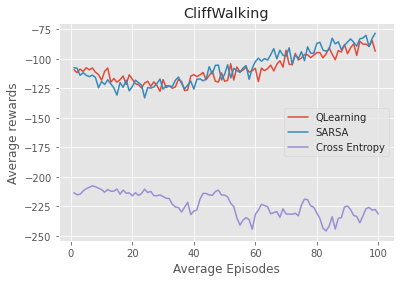

In [14]:
q_x, q_y = q_arr[:,4], q_arr[:,3]
s_x, s_y = s_arr[:,4], s_arr[:,3]
c_x, c_y = c_arr[:,6], c_arr[:,5]

plt.plot(q_x,q_y, label='QLearning')
plt.plot(s_x,s_y, label='SARSA')
plt.plot(c_x,c_y, label='Cross Entropy')
plt.xlabel('Average Episodes')
plt.ylabel('Average rewards')
plt.title('CliffWalking')
plt.legend()
plt.show()

The results are scaled to contain averages of 40 episodes.

We can see that after 4000 episodes, SARSA and Q-Learning have achieved lower instances of falling into the cliff.

C:\Users\cally\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\cally\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


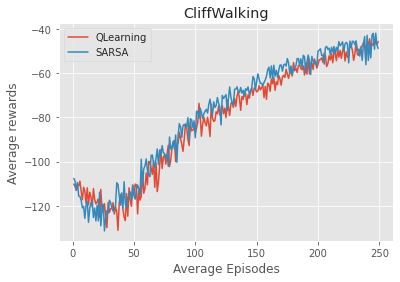

In [15]:
_, q_arr = qLearning(cliffWalk,episode=10000)
_, s_arr = sarsa(cliffWalk,episode=10000)

q_x, q_y = q_arr[:,4], q_arr[:,3]
s_x, s_y = s_arr[:,4], s_arr[:,3]

plt.plot(q_x,q_y, label='QLearning')
plt.plot(s_x,s_y, label='SARSA')
plt.xlabel('Average Episodes')
plt.ylabel('Average rewards')
plt.title('CliffWalking')
plt.legend()
plt.show()

Alpha parameter has been set to 0.001 for the experiments on CliffWalking

In [16]:
#results for CliffWalking
_, q_arr = qLearning(cliffWalk,episode=4000,alpha=0.001)
_, s_arr = sarsa(cliffWalk,episode=4000,alpha=0.001)
c_arr = entropyMethod(cliffWalk,episode=4000,batch_size=2,alpha=0.001,cliff=True)

q_x, q_y = q_arr[:,4], q_arr[:,3]
s_x, s_y = s_arr[:,4], s_arr[:,3]
c_x, c_y = c_arr[:,6], c_arr[:,5]

_, q_arr_disc70 = qLearning(cliffWalk,episode=4000,discount=0.7,alpha=0.001)
_, s_arr_disc70 = sarsa(cliffWalk,episode=4000,discount=0.7,alpha=0.001)
c_arr_disc70 = entropyMethod(cliffWalk,episode=4000,batch_size=2,discount=0.7,alpha=0.001,cliff=True)

q_x_disc70, q_y_disc70 = q_arr_disc70[:,4], q_arr_disc70[:,3]
s_x_disc70, s_y_disc70 = s_arr_disc70[:,4], s_arr_disc70[:,3]
c_x_disc70, c_y_disc70 = c_arr_disc70[:,6], c_arr_disc70[:,5]

_, q_arr_alp10 = qLearning(cliffWalk,episode=4000,alpha=.005)
_, s_arr_alp10 = sarsa(cliffWalk,episode=4000,alpha=.005)
c_arr_alp10 = entropyMethod(cliffWalk,episode=4000,batch_size=2,discount=0.7,alpha=0.005,cliff=True)

q_x_alp10, q_y_alp10 = q_arr_alp10[:,4], q_arr_alp10[:,3]
s_x_alp10, s_y_alp10 = s_arr_alp10[:,4], s_arr_alp10[:,3]
c_x_alp10, c_y_alp10 = c_arr_alp10[:,6], c_arr_alp10[:,5]

_, q_arr_alp10Gamma70 = qLearning(cliffWalk,episode=4000,discount=0.7,alpha=.005)
_, s_arr_alp10Gamma70 = sarsa(cliffWalk,episode=4000,discount=0.5,alpha=.005)
c_arr_alp10Gamma70 = entropyMethod(cliffWalk,episode=4000,batch_size=2,discount=0.7,alpha=.005,cliff=True)

q_x_alp10Gamma70, q_y_alp10Gamma70 = q_arr_alp10Gamma70[:,4], q_arr_alp10Gamma70[:,3]
s_x_alp10Gamma70, s_y_alp10Gamma70 = s_arr_alp10Gamma70[:,4], s_arr_alp10Gamma70[:,3]
c_x_alp10Gamma70, c_y_alp10Gamma70 = c_arr_alp10Gamma70[:,6], c_arr_alp10Gamma70[:,5]

_, q_arr_alp001Gamma70 = qLearning(cliffWalk,episode=4000,discount=0.7,alpha=.0009)
_, s_arr_alp001Gamma70 = sarsa(cliffWalk,episode=4000,discount=0.7,alpha=.0009)
c_arr_alp001Gamma70 = entropyMethod(cliffWalk,episode=4000,batch_size=2,discount=0.7,alpha=.0009,cliff=True)

q_x_alp001Gamma70, q_y_alp001Gamma70 = q_arr_alp001Gamma70[:,4], q_arr_alp001Gamma70[:,3]
s_x_alp001Gamma70, s_y_alp001Gamma70 = s_arr_alp001Gamma70[:,4], s_arr_alp001Gamma70[:,3]
c_x_alp001Gamma70, c_y_alp001Gamma70 = c_arr_alp001Gamma70[:,6], c_arr_alp001Gamma70[:,5]

C:\Users\cally\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\cally\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0: loss=1.3879908323287964 Mean=-123.0 Sum=-246.0 Cumulative=-246.0
1: loss=1.3826712369918823 Mean=-103.5 Sum=-207.0 Cumulative=-453.0
2: loss=1.3763660192489624 Mean=-102.5 Sum=-205.0 Cumulative=-658.0
3: loss=1.3896510601043701 Mean=-111.0 Sum=-222.0 Cumulative=-880.0
4: loss=1.392557144165039 Mean=-149.5 Sum=-299.0 Cumulative=-1179.0
5: loss=1.385075330734253 Mean=-137.5 Sum=-275.0 Cumulative=-1454.0
6: loss=1.3948376178741455 Mean=-125.0 Sum=-250.0 Cumulative=-1704.0
7: loss=1.3888624906539917 Mean=-124.5 Sum=-249.0 Cumulative=-1953.0
8: loss=1.4029580354690552 Mean=-101.0 Sum=-202.0 Cumulative=-2155.0
9: loss=1.37726891040802 Mean=-102.0 Sum=-204.0 Cumulative=-2359.0
11: loss=1.394609808921814 Mean=-123.0 Sum=-246.0 Cumulative=-2805.0
12: loss=1.3875404596328735 Mean=-129.0 Sum=-258.0 Cumulative=-3063.0
13: loss=1.3863332271575928 Mean=-109.5 Sum=-219.0 Cumulative=-3282.0
15: loss=1.366245985031128 Mean=-113.0 Sum=-226.0 Cumulative=-3710.0
16: loss=1.3938177824020386 Mean=-100.5 

190: loss=1.2795463800430298 Mean=-102.0 Sum=-204.0 Cumulative=-40661.0
191: loss=1.3553107976913452 Mean=-104.0 Sum=-208.0 Cumulative=-40869.0
192: loss=1.3810664415359497 Mean=-107.5 Sum=-215.0 Cumulative=-41084.0
193: loss=1.2748709917068481 Mean=-102.0 Sum=-204.0 Cumulative=-41288.0
194: loss=1.4290835857391357 Mean=-113.5 Sum=-227.0 Cumulative=-41515.0
196: loss=1.3294821977615356 Mean=-108.0 Sum=-216.0 Cumulative=-41947.0
197: loss=1.3868160247802734 Mean=-110.0 Sum=-220.0 Cumulative=-42167.0
198: loss=1.3735111951828003 Mean=-110.0 Sum=-220.0 Cumulative=-42387.0
199: loss=1.4067250490188599 Mean=-114.5 Sum=-229.0 Cumulative=-42616.0
200: loss=1.422093152999878 Mean=-103.5 Sum=-207.0 Cumulative=-42823.0
201: loss=1.4130864143371582 Mean=-102.0 Sum=-204.0 Cumulative=-43027.0
202: loss=1.414808750152588 Mean=-115.0 Sum=-230.0 Cumulative=-43257.0
203: loss=1.2234363555908203 Mean=-101.5 Sum=-203.0 Cumulative=-43460.0
204: loss=1.3693584203720093 Mean=-118.5 Sum=-237.0 Cumulative=-43

338: loss=1.447141170501709 Mean=-121.0 Sum=-242.0 Cumulative=-71742.0
339: loss=1.4342583417892456 Mean=-103.5 Sum=-207.0 Cumulative=-71949.0
340: loss=1.3343822956085205 Mean=-101.5 Sum=-203.0 Cumulative=-72152.0
341: loss=1.2442855834960938 Mean=-109.0 Sum=-218.0 Cumulative=-72370.0
342: loss=1.2063478231430054 Mean=-102.0 Sum=-204.0 Cumulative=-72574.0
343: loss=1.426664113998413 Mean=-110.5 Sum=-221.0 Cumulative=-72795.0
345: loss=1.342142939567566 Mean=-105.5 Sum=-211.0 Cumulative=-73206.0
346: loss=1.289541482925415 Mean=-100.5 Sum=-201.0 Cumulative=-73407.0
347: loss=1.35856032371521 Mean=-102.0 Sum=-204.0 Cumulative=-73611.0
348: loss=1.1499254703521729 Mean=-106.0 Sum=-212.0 Cumulative=-73823.0
350: loss=1.2842228412628174 Mean=-107.5 Sum=-215.0 Cumulative=-74238.0
351: loss=1.1613456010818481 Mean=-102.5 Sum=-205.0 Cumulative=-74443.0
352: loss=1.2750388383865356 Mean=-108.0 Sum=-216.0 Cumulative=-74659.0
353: loss=1.3651362657546997 Mean=-106.5 Sum=-213.0 Cumulative=-74872.

486: loss=1.1188424825668335 Mean=-103.5 Sum=-207.0 Cumulative=-102697.0
487: loss=1.4451459646224976 Mean=-106.0 Sum=-212.0 Cumulative=-102909.0
489: loss=1.2363333702087402 Mean=-103.0 Sum=-206.0 Cumulative=-103329.0
490: loss=1.363466501235962 Mean=-101.5 Sum=-203.0 Cumulative=-103532.0
491: loss=1.2051887512207031 Mean=-108.0 Sum=-216.0 Cumulative=-103748.0
492: loss=1.2121115922927856 Mean=-103.5 Sum=-207.0 Cumulative=-103955.0
493: loss=1.258760690689087 Mean=-100.5 Sum=-201.0 Cumulative=-104156.0
494: loss=1.3931970596313477 Mean=-101.5 Sum=-203.0 Cumulative=-104359.0
495: loss=1.2489274740219116 Mean=-106.0 Sum=-212.0 Cumulative=-104571.0
496: loss=1.4036164283752441 Mean=-109.5 Sum=-219.0 Cumulative=-104790.0
497: loss=1.2581944465637207 Mean=-101.5 Sum=-203.0 Cumulative=-104993.0
498: loss=1.3897805213928223 Mean=-101.5 Sum=-203.0 Cumulative=-105196.0
499: loss=1.249387264251709 Mean=-106.0 Sum=-212.0 Cumulative=-105408.0
500: loss=1.1847573518753052 Mean=-101.5 Sum=-203.0 Cu

634: loss=1.460115671157837 Mean=-105.0 Sum=-210.0 Cumulative=-133687.0
635: loss=1.4167500734329224 Mean=-108.0 Sum=-216.0 Cumulative=-133903.0
636: loss=1.3397444486618042 Mean=-103.0 Sum=-206.0 Cumulative=-134109.0
637: loss=1.0254554748535156 Mean=-107.5 Sum=-215.0 Cumulative=-134324.0
638: loss=1.4202325344085693 Mean=-106.5 Sum=-213.0 Cumulative=-134537.0
639: loss=1.1065069437026978 Mean=-118.5 Sum=-237.0 Cumulative=-134774.0
640: loss=1.3660024404525757 Mean=-105.0 Sum=-210.0 Cumulative=-134984.0
642: loss=1.1503738164901733 Mean=-101.5 Sum=-203.0 Cumulative=-135401.0
644: loss=1.4809002876281738 Mean=-108.5 Sum=-217.0 Cumulative=-135818.0
645: loss=1.0929471254348755 Mean=-105.0 Sum=-210.0 Cumulative=-136028.0
646: loss=1.2877631187438965 Mean=-101.0 Sum=-202.0 Cumulative=-136230.0
647: loss=1.402774453163147 Mean=-106.5 Sum=-213.0 Cumulative=-136443.0
648: loss=1.5854250192642212 Mean=-101.5 Sum=-203.0 Cumulative=-136646.0
649: loss=1.2002017498016357 Mean=-112.0 Sum=-224.0 C

768: loss=1.199823260307312 Mean=-108.5 Sum=-217.0 Cumulative=-161969.0
769: loss=1.0136163234710693 Mean=-108.0 Sum=-216.0 Cumulative=-162185.0
771: loss=1.2903790473937988 Mean=-112.5 Sum=-225.0 Cumulative=-162626.0
772: loss=1.3248332738876343 Mean=-103.0 Sum=-206.0 Cumulative=-162832.0
773: loss=1.095058798789978 Mean=-111.0 Sum=-222.0 Cumulative=-163054.0
774: loss=1.2033880949020386 Mean=-107.5 Sum=-215.0 Cumulative=-163269.0
775: loss=1.2541292905807495 Mean=-109.0 Sum=-218.0 Cumulative=-163487.0
776: loss=1.1625890731811523 Mean=-103.0 Sum=-206.0 Cumulative=-163693.0
777: loss=1.1522313356399536 Mean=-107.5 Sum=-215.0 Cumulative=-163908.0
778: loss=1.1180769205093384 Mean=-108.5 Sum=-217.0 Cumulative=-164125.0
779: loss=1.18970787525177 Mean=-101.5 Sum=-203.0 Cumulative=-164328.0
781: loss=1.4051326513290405 Mean=-103.5 Sum=-207.0 Cumulative=-164741.0
782: loss=1.2709214687347412 Mean=-102.0 Sum=-204.0 Cumulative=-164945.0
783: loss=1.2752420902252197 Mean=-102.0 Sum=-204.0 Cum

906: loss=1.2140107154846191 Mean=-110.5 Sum=-221.0 Cumulative=-191034.0
907: loss=1.5862445831298828 Mean=-101.5 Sum=-203.0 Cumulative=-191237.0
908: loss=1.1964486837387085 Mean=-105.0 Sum=-210.0 Cumulative=-191447.0
909: loss=1.101772665977478 Mean=-103.5 Sum=-207.0 Cumulative=-191654.0
910: loss=1.2949620485305786 Mean=-102.5 Sum=-205.0 Cumulative=-191859.0
911: loss=1.3148590326309204 Mean=-105.0 Sum=-210.0 Cumulative=-192069.0
912: loss=1.2315033674240112 Mean=-109.0 Sum=-218.0 Cumulative=-192287.0
913: loss=1.4284210205078125 Mean=-100.5 Sum=-201.0 Cumulative=-192488.0
915: loss=1.3993874788284302 Mean=-107.0 Sum=-214.0 Cumulative=-192906.0
916: loss=1.361668348312378 Mean=-103.5 Sum=-207.0 Cumulative=-193113.0
917: loss=1.1702613830566406 Mean=-116.0 Sum=-232.0 Cumulative=-193345.0
918: loss=1.2454407215118408 Mean=-102.5 Sum=-205.0 Cumulative=-193550.0
919: loss=1.4156577587127686 Mean=-101.5 Sum=-203.0 Cumulative=-193753.0
920: loss=1.2180776596069336 Mean=-122.5 Sum=-245.0 C

1089: loss=1.0557072162628174 Mean=-109.5 Sum=-219.0 Cumulative=-229874.0
1090: loss=1.0171089172363281 Mean=-113.5 Sum=-227.0 Cumulative=-230101.0
1092: loss=1.4006342887878418 Mean=-104.0 Sum=-208.0 Cumulative=-230509.0
1093: loss=1.353219985961914 Mean=-104.5 Sum=-209.0 Cumulative=-230718.0
1094: loss=1.4779918193817139 Mean=-108.0 Sum=-216.0 Cumulative=-230934.0
1095: loss=1.1393897533416748 Mean=-111.0 Sum=-222.0 Cumulative=-231156.0
1098: loss=1.2258414030075073 Mean=-103.0 Sum=-206.0 Cumulative=-231774.0
1099: loss=1.3378450870513916 Mean=-105.5 Sum=-211.0 Cumulative=-231985.0
1100: loss=1.2770216464996338 Mean=-104.0 Sum=-208.0 Cumulative=-232193.0
1101: loss=1.1454898118972778 Mean=-106.0 Sum=-212.0 Cumulative=-232405.0
1102: loss=1.2682386636734009 Mean=-107.5 Sum=-215.0 Cumulative=-232620.0
1103: loss=1.0754337310791016 Mean=-110.5 Sum=-221.0 Cumulative=-232841.0
1104: loss=1.3298144340515137 Mean=-118.0 Sum=-236.0 Cumulative=-233077.0
1106: loss=1.1016680002212524 Mean=-108

1277: loss=1.0769450664520264 Mean=-102.0 Sum=-204.0 Cumulative=-269873.0
1278: loss=1.1159237623214722 Mean=-111.5 Sum=-223.0 Cumulative=-270096.0
1281: loss=1.2044320106506348 Mean=-101.5 Sum=-203.0 Cumulative=-270703.0
1282: loss=1.611494541168213 Mean=-103.5 Sum=-207.0 Cumulative=-270910.0
1283: loss=1.0726549625396729 Mean=-107.0 Sum=-214.0 Cumulative=-271124.0
1284: loss=1.1708554029464722 Mean=-111.5 Sum=-223.0 Cumulative=-271347.0
1285: loss=1.0988258123397827 Mean=-114.0 Sum=-228.0 Cumulative=-271575.0
1286: loss=1.070446491241455 Mean=-104.5 Sum=-209.0 Cumulative=-271784.0
1288: loss=1.2492667436599731 Mean=-114.0 Sum=-228.0 Cumulative=-272216.0
1289: loss=1.1709409952163696 Mean=-104.5 Sum=-209.0 Cumulative=-272425.0
1290: loss=0.9698103666305542 Mean=-105.5 Sum=-211.0 Cumulative=-272636.0
1291: loss=1.7512909173965454 Mean=-102.0 Sum=-204.0 Cumulative=-272840.0
1292: loss=1.0044068098068237 Mean=-117.0 Sum=-234.0 Cumulative=-273074.0
1293: loss=1.351356029510498 Mean=-102.5

1446: loss=1.113300085067749 Mean=-102.5 Sum=-205.0 Cumulative=-306090.0
1447: loss=1.0351139307022095 Mean=-101.5 Sum=-203.0 Cumulative=-306293.0
1448: loss=1.210890531539917 Mean=-114.5 Sum=-229.0 Cumulative=-306522.0
1449: loss=1.2171553373336792 Mean=-107.5 Sum=-215.0 Cumulative=-306737.0
1450: loss=1.2597953081130981 Mean=-108.5 Sum=-217.0 Cumulative=-306954.0
1451: loss=1.3212215900421143 Mean=-105.0 Sum=-210.0 Cumulative=-307164.0
1452: loss=1.497246503829956 Mean=-105.5 Sum=-211.0 Cumulative=-307375.0
1453: loss=1.0460879802703857 Mean=-114.0 Sum=-228.0 Cumulative=-307603.0
1454: loss=0.8482180237770081 Mean=-102.5 Sum=-205.0 Cumulative=-307808.0
1455: loss=0.8949499130249023 Mean=-106.0 Sum=-212.0 Cumulative=-308020.0
1456: loss=1.0673224925994873 Mean=-102.0 Sum=-204.0 Cumulative=-308224.0
1457: loss=1.153996467590332 Mean=-113.0 Sum=-226.0 Cumulative=-308450.0
1458: loss=0.8284563422203064 Mean=-106.0 Sum=-212.0 Cumulative=-308662.0
1459: loss=1.067007303237915 Mean=-102.5 S

1616: loss=1.0189844369888306 Mean=-105.5 Sum=-211.0 Cumulative=-342703.0
1617: loss=1.2316488027572632 Mean=-109.0 Sum=-218.0 Cumulative=-342921.0
1618: loss=1.2305277585983276 Mean=-113.5 Sum=-227.0 Cumulative=-343148.0
1621: loss=1.3783419132232666 Mean=-104.5 Sum=-209.0 Cumulative=-343763.0
1622: loss=1.1398804187774658 Mean=-112.5 Sum=-225.0 Cumulative=-343988.0
1623: loss=1.2852965593338013 Mean=-106.5 Sum=-213.0 Cumulative=-344201.0
1624: loss=0.9454268217086792 Mean=-101.5 Sum=-203.0 Cumulative=-344404.0
1625: loss=1.1852511167526245 Mean=-110.5 Sum=-221.0 Cumulative=-344625.0
1626: loss=1.3188350200653076 Mean=-102.0 Sum=-204.0 Cumulative=-344829.0
1627: loss=1.09773588180542 Mean=-105.0 Sum=-210.0 Cumulative=-345039.0
1628: loss=1.4052367210388184 Mean=-104.0 Sum=-208.0 Cumulative=-345247.0
1629: loss=1.1476609706878662 Mean=-109.0 Sum=-218.0 Cumulative=-345465.0
1630: loss=1.2379647493362427 Mean=-113.0 Sum=-226.0 Cumulative=-345691.0
1631: loss=1.1563984155654907 Mean=-106.

1774: loss=1.068522334098816 Mean=-110.5 Sum=-221.0 Cumulative=-376876.0
1775: loss=1.2961628437042236 Mean=-106.5 Sum=-213.0 Cumulative=-377089.0
1776: loss=1.0127061605453491 Mean=-110.0 Sum=-220.0 Cumulative=-377309.0
1777: loss=1.2071342468261719 Mean=-106.0 Sum=-212.0 Cumulative=-377521.0
1778: loss=1.0166980028152466 Mean=-120.0 Sum=-240.0 Cumulative=-377761.0
1779: loss=1.0497597455978394 Mean=-112.0 Sum=-224.0 Cumulative=-377985.0
1780: loss=1.2203866243362427 Mean=-116.0 Sum=-232.0 Cumulative=-378217.0
1781: loss=1.4963701963424683 Mean=-106.5 Sum=-213.0 Cumulative=-378430.0
1782: loss=0.9673768281936646 Mean=-108.0 Sum=-216.0 Cumulative=-378646.0
1783: loss=0.9689314961433411 Mean=-105.5 Sum=-211.0 Cumulative=-378857.0
1784: loss=0.9639989733695984 Mean=-109.0 Sum=-218.0 Cumulative=-379075.0
1785: loss=1.2582858800888062 Mean=-117.0 Sum=-234.0 Cumulative=-379309.0
1786: loss=1.0657624006271362 Mean=-106.5 Sum=-213.0 Cumulative=-379522.0
1787: loss=1.1405845880508423 Mean=-113

1903: loss=0.9312829375267029 Mean=-116.5 Sum=-233.0 Cumulative=-405476.0
1904: loss=1.108282446861267 Mean=-108.5 Sum=-217.0 Cumulative=-405693.0
1905: loss=0.9847703576087952 Mean=-126.5 Sum=-253.0 Cumulative=-405946.0
1907: loss=1.0996407270431519 Mean=-113.0 Sum=-226.0 Cumulative=-406390.0
1908: loss=0.9923090934753418 Mean=-105.5 Sum=-211.0 Cumulative=-406601.0
1909: loss=1.092149257659912 Mean=-131.0 Sum=-262.0 Cumulative=-406863.0
1910: loss=1.2235519886016846 Mean=-114.5 Sum=-229.0 Cumulative=-407092.0
1911: loss=1.0016814470291138 Mean=-113.0 Sum=-226.0 Cumulative=-407318.0
1912: loss=0.9504256248474121 Mean=-127.5 Sum=-255.0 Cumulative=-407573.0
1913: loss=0.7770087122917175 Mean=-111.0 Sum=-222.0 Cumulative=-407795.0
1914: loss=1.2166595458984375 Mean=-104.5 Sum=-209.0 Cumulative=-408004.0
1915: loss=0.8280156850814819 Mean=-106.5 Sum=-213.0 Cumulative=-408217.0
1916: loss=1.2012606859207153 Mean=-120.0 Sum=-240.0 Cumulative=-408457.0
1917: loss=0.8427950739860535 Mean=-127.

2026: loss=1.3223209381103516 Mean=-108.0 Sum=-216.0 Cumulative=-432694.0
2027: loss=1.2050307989120483 Mean=-114.0 Sum=-228.0 Cumulative=-432922.0
2028: loss=1.1880872249603271 Mean=-112.0 Sum=-224.0 Cumulative=-433146.0
2029: loss=1.0773016214370728 Mean=-105.5 Sum=-211.0 Cumulative=-433357.0
2030: loss=0.7847241759300232 Mean=-109.0 Sum=-218.0 Cumulative=-433575.0
2031: loss=0.9770154356956482 Mean=-103.5 Sum=-207.0 Cumulative=-433782.0
2032: loss=1.0297800302505493 Mean=-105.0 Sum=-210.0 Cumulative=-433992.0
2033: loss=1.1264342069625854 Mean=-104.5 Sum=-209.0 Cumulative=-434201.0
2034: loss=1.0263386964797974 Mean=-117.5 Sum=-235.0 Cumulative=-434436.0
2035: loss=1.1908215284347534 Mean=-103.0 Sum=-206.0 Cumulative=-434642.0
2036: loss=1.2460815906524658 Mean=-116.5 Sum=-233.0 Cumulative=-434875.0
2037: loss=0.9892054796218872 Mean=-111.0 Sum=-222.0 Cumulative=-435097.0
2038: loss=1.4322044849395752 Mean=-110.0 Sum=-220.0 Cumulative=-435317.0
2039: loss=0.9082265496253967 Mean=-10

2178: loss=0.9048340916633606 Mean=-109.5 Sum=-219.0 Cumulative=-465857.0
2179: loss=1.2681797742843628 Mean=-109.0 Sum=-218.0 Cumulative=-466075.0
2180: loss=1.422492265701294 Mean=-104.0 Sum=-208.0 Cumulative=-466283.0
2181: loss=1.0884612798690796 Mean=-105.5 Sum=-211.0 Cumulative=-466494.0
2182: loss=1.3299692869186401 Mean=-112.5 Sum=-225.0 Cumulative=-466719.0
2183: loss=1.267723560333252 Mean=-107.5 Sum=-215.0 Cumulative=-466934.0
2184: loss=1.2680341005325317 Mean=-108.5 Sum=-217.0 Cumulative=-467151.0
2186: loss=1.1709181070327759 Mean=-114.0 Sum=-228.0 Cumulative=-467589.0
2188: loss=1.067731261253357 Mean=-110.5 Sum=-221.0 Cumulative=-468028.0
2189: loss=1.240771770477295 Mean=-110.0 Sum=-220.0 Cumulative=-468248.0
2190: loss=1.0550252199172974 Mean=-111.5 Sum=-223.0 Cumulative=-468471.0
2191: loss=1.1100910902023315 Mean=-107.5 Sum=-215.0 Cumulative=-468686.0
2192: loss=1.3084497451782227 Mean=-110.5 Sum=-221.0 Cumulative=-468907.0
2193: loss=0.8609944581985474 Mean=-101.5 

2328: loss=0.6842948198318481 Mean=-103.0 Sum=-206.0 Cumulative=-498551.0
2329: loss=1.0421215295791626 Mean=-120.5 Sum=-241.0 Cumulative=-498792.0
2330: loss=1.4554699659347534 Mean=-125.0 Sum=-250.0 Cumulative=-499042.0
2331: loss=1.5614380836486816 Mean=-108.5 Sum=-217.0 Cumulative=-499259.0
2332: loss=0.9277727603912354 Mean=-121.5 Sum=-243.0 Cumulative=-499502.0
2333: loss=1.4432151317596436 Mean=-106.0 Sum=-212.0 Cumulative=-499714.0
2334: loss=1.1379367113113403 Mean=-113.0 Sum=-226.0 Cumulative=-499940.0
2335: loss=1.045698881149292 Mean=-106.5 Sum=-213.0 Cumulative=-500153.0
2336: loss=1.539044737815857 Mean=-107.0 Sum=-214.0 Cumulative=-500367.0
2337: loss=0.8860204815864563 Mean=-110.0 Sum=-220.0 Cumulative=-500587.0
2338: loss=0.8106414079666138 Mean=-112.0 Sum=-224.0 Cumulative=-500811.0
2339: loss=1.0991190671920776 Mean=-113.0 Sum=-226.0 Cumulative=-501037.0
2340: loss=1.2665965557098389 Mean=-119.0 Sum=-238.0 Cumulative=-501275.0
2341: loss=1.148870587348938 Mean=-105.0

2447: loss=0.7674440741539001 Mean=-108.5 Sum=-217.0 Cumulative=-525337.0
2448: loss=0.6905511021614075 Mean=-105.5 Sum=-211.0 Cumulative=-525548.0
2449: loss=0.9669238924980164 Mean=-115.5 Sum=-231.0 Cumulative=-525779.0
2450: loss=0.9877129793167114 Mean=-114.0 Sum=-228.0 Cumulative=-526007.0
2451: loss=1.456109642982483 Mean=-104.5 Sum=-209.0 Cumulative=-526216.0
2452: loss=1.015371322631836 Mean=-119.0 Sum=-238.0 Cumulative=-526454.0
2453: loss=1.169541358947754 Mean=-112.5 Sum=-225.0 Cumulative=-526679.0
2454: loss=1.1072208881378174 Mean=-126.0 Sum=-252.0 Cumulative=-526931.0
2455: loss=0.9915111064910889 Mean=-109.0 Sum=-218.0 Cumulative=-527149.0
2456: loss=1.144842505455017 Mean=-126.0 Sum=-252.0 Cumulative=-527401.0
2458: loss=1.053975224494934 Mean=-103.5 Sum=-207.0 Cumulative=-527812.0
2459: loss=1.2093424797058105 Mean=-113.0 Sum=-226.0 Cumulative=-528038.0
2460: loss=1.0560728311538696 Mean=-106.0 Sum=-212.0 Cumulative=-528250.0
2461: loss=0.9246774315834045 Mean=-109.0 S

2568: loss=0.9993016719818115 Mean=-113.5 Sum=-227.0 Cumulative=-552495.0
2569: loss=1.1740086078643799 Mean=-117.0 Sum=-234.0 Cumulative=-552729.0
2570: loss=1.193676471710205 Mean=-107.5 Sum=-215.0 Cumulative=-552944.0
2571: loss=1.0711662769317627 Mean=-107.5 Sum=-215.0 Cumulative=-553159.0
2572: loss=1.2160817384719849 Mean=-109.0 Sum=-218.0 Cumulative=-553377.0
2573: loss=1.211366891860962 Mean=-119.0 Sum=-238.0 Cumulative=-553615.0
2574: loss=1.2605335712432861 Mean=-122.0 Sum=-244.0 Cumulative=-553859.0
2575: loss=1.148230791091919 Mean=-117.0 Sum=-234.0 Cumulative=-554093.0
2576: loss=0.942055881023407 Mean=-104.5 Sum=-209.0 Cumulative=-554302.0
2577: loss=1.0498203039169312 Mean=-106.0 Sum=-212.0 Cumulative=-554514.0
2578: loss=0.770031213760376 Mean=-111.5 Sum=-223.0 Cumulative=-554737.0
2579: loss=1.0292840003967285 Mean=-105.5 Sum=-211.0 Cumulative=-554948.0
2580: loss=1.098487377166748 Mean=-116.0 Sum=-232.0 Cumulative=-555180.0
2581: loss=1.1307107210159302 Mean=-105.5 Su

2697: loss=1.4205831289291382 Mean=-107.0 Sum=-214.0 Cumulative=-581234.0
2698: loss=1.0915182828903198 Mean=-108.0 Sum=-216.0 Cumulative=-581450.0
2699: loss=1.1788904666900635 Mean=-110.5 Sum=-221.0 Cumulative=-581671.0
2700: loss=1.1505295038223267 Mean=-102.0 Sum=-204.0 Cumulative=-581875.0
2701: loss=0.9084879755973816 Mean=-108.5 Sum=-217.0 Cumulative=-582092.0
2702: loss=1.1871532201766968 Mean=-117.5 Sum=-235.0 Cumulative=-582327.0
2703: loss=1.0359145402908325 Mean=-118.5 Sum=-237.0 Cumulative=-582564.0
2704: loss=1.4073207378387451 Mean=-110.0 Sum=-220.0 Cumulative=-582784.0
2705: loss=1.003081202507019 Mean=-106.5 Sum=-213.0 Cumulative=-582997.0
2706: loss=1.5605882406234741 Mean=-104.5 Sum=-209.0 Cumulative=-583206.0
2707: loss=0.6949871778488159 Mean=-116.5 Sum=-233.0 Cumulative=-583439.0
2708: loss=1.2632149457931519 Mean=-107.5 Sum=-215.0 Cumulative=-583654.0
2709: loss=1.0962927341461182 Mean=-119.5 Sum=-239.0 Cumulative=-583893.0
2710: loss=1.2568466663360596 Mean=-106

2831: loss=1.5022951364517212 Mean=-111.0 Sum=-222.0 Cumulative=-610929.0
2832: loss=1.3270150423049927 Mean=-123.0 Sum=-246.0 Cumulative=-611175.0
2833: loss=1.0261461734771729 Mean=-114.5 Sum=-229.0 Cumulative=-611404.0
2834: loss=1.2332558631896973 Mean=-109.5 Sum=-219.0 Cumulative=-611623.0
2835: loss=1.2383251190185547 Mean=-106.0 Sum=-212.0 Cumulative=-611835.0
2836: loss=0.8802732229232788 Mean=-104.0 Sum=-208.0 Cumulative=-612043.0
2837: loss=1.1157543659210205 Mean=-106.5 Sum=-213.0 Cumulative=-612256.0
2838: loss=1.2779784202575684 Mean=-109.5 Sum=-219.0 Cumulative=-612475.0
2839: loss=1.2448384761810303 Mean=-104.0 Sum=-208.0 Cumulative=-612683.0
2841: loss=1.1593947410583496 Mean=-114.0 Sum=-228.0 Cumulative=-613119.0
2842: loss=1.046637773513794 Mean=-111.5 Sum=-223.0 Cumulative=-613342.0
2843: loss=1.3969838619232178 Mean=-108.0 Sum=-216.0 Cumulative=-613558.0
2844: loss=0.923407256603241 Mean=-106.5 Sum=-213.0 Cumulative=-613771.0
2845: loss=1.2168152332305908 Mean=-106.

2972: loss=1.3966423273086548 Mean=-113.0 Sum=-226.0 Cumulative=-641913.0
2973: loss=0.6758509278297424 Mean=-105.5 Sum=-211.0 Cumulative=-642124.0
2974: loss=1.0913524627685547 Mean=-116.0 Sum=-232.0 Cumulative=-642356.0
2975: loss=1.3344535827636719 Mean=-114.5 Sum=-229.0 Cumulative=-642585.0
2976: loss=0.7070330381393433 Mean=-109.0 Sum=-218.0 Cumulative=-642803.0
2977: loss=1.2316383123397827 Mean=-110.0 Sum=-220.0 Cumulative=-643023.0
2978: loss=1.1391549110412598 Mean=-110.5 Sum=-221.0 Cumulative=-643244.0
2980: loss=0.9741103649139404 Mean=-109.5 Sum=-219.0 Cumulative=-643673.0
2981: loss=1.1838189363479614 Mean=-119.0 Sum=-238.0 Cumulative=-643911.0
2982: loss=1.051959753036499 Mean=-110.0 Sum=-220.0 Cumulative=-644131.0
2983: loss=0.9319328665733337 Mean=-105.0 Sum=-210.0 Cumulative=-644341.0
2984: loss=1.1782413721084595 Mean=-108.0 Sum=-216.0 Cumulative=-644557.0
2985: loss=0.8342481851577759 Mean=-106.5 Sum=-213.0 Cumulative=-644770.0
2986: loss=0.8429335355758667 Mean=-110

3091: loss=1.2593363523483276 Mean=-121.5 Sum=-243.0 Cumulative=-668714.0
3092: loss=0.9541980028152466 Mean=-111.0 Sum=-222.0 Cumulative=-668936.0
3093: loss=1.1527913808822632 Mean=-106.5 Sum=-213.0 Cumulative=-669149.0
3094: loss=1.2390551567077637 Mean=-106.0 Sum=-212.0 Cumulative=-669361.0
3095: loss=0.6181561350822449 Mean=-105.5 Sum=-211.0 Cumulative=-669572.0
3096: loss=1.078518033027649 Mean=-111.5 Sum=-223.0 Cumulative=-669795.0
3097: loss=0.9303605556488037 Mean=-113.0 Sum=-226.0 Cumulative=-670021.0
3098: loss=1.2431374788284302 Mean=-107.0 Sum=-214.0 Cumulative=-670235.0
3099: loss=1.232642650604248 Mean=-105.5 Sum=-211.0 Cumulative=-670446.0
3100: loss=1.055331826210022 Mean=-119.5 Sum=-239.0 Cumulative=-670685.0
3101: loss=1.118209719657898 Mean=-110.5 Sum=-221.0 Cumulative=-670906.0
3102: loss=0.8816553354263306 Mean=-108.5 Sum=-217.0 Cumulative=-671123.0
3103: loss=1.0355406999588013 Mean=-111.0 Sum=-222.0 Cumulative=-671345.0
3104: loss=0.9580913186073303 Mean=-112.5 

3204: loss=1.4070279598236084 Mean=-107.5 Sum=-215.0 Cumulative=-694348.0
3205: loss=1.0577948093414307 Mean=-109.0 Sum=-218.0 Cumulative=-694566.0
3206: loss=0.7991746068000793 Mean=-116.0 Sum=-232.0 Cumulative=-694798.0
3207: loss=1.0038700103759766 Mean=-121.5 Sum=-243.0 Cumulative=-695041.0
3208: loss=1.131629228591919 Mean=-116.5 Sum=-233.0 Cumulative=-695274.0
3209: loss=0.950351893901825 Mean=-122.0 Sum=-244.0 Cumulative=-695518.0
3210: loss=1.1317167282104492 Mean=-117.0 Sum=-234.0 Cumulative=-695752.0
3211: loss=1.1086937189102173 Mean=-101.5 Sum=-203.0 Cumulative=-695955.0
3212: loss=1.2362579107284546 Mean=-122.0 Sum=-244.0 Cumulative=-696199.0
3213: loss=0.8951013684272766 Mean=-109.0 Sum=-218.0 Cumulative=-696417.0
3214: loss=1.190894603729248 Mean=-120.0 Sum=-240.0 Cumulative=-696657.0
3215: loss=1.130734920501709 Mean=-133.5 Sum=-267.0 Cumulative=-696924.0
3216: loss=1.106090784072876 Mean=-135.0 Sum=-270.0 Cumulative=-697194.0
3217: loss=1.0391626358032227 Mean=-147.5 S

3334: loss=1.1370059251785278 Mean=-108.5 Sum=-217.0 Cumulative=-724800.0
3335: loss=0.9584688544273376 Mean=-112.5 Sum=-225.0 Cumulative=-725025.0
3336: loss=0.6988807916641235 Mean=-115.0 Sum=-230.0 Cumulative=-725255.0
3337: loss=0.913937509059906 Mean=-116.0 Sum=-232.0 Cumulative=-725487.0
3338: loss=0.7335687875747681 Mean=-122.5 Sum=-245.0 Cumulative=-725732.0
3339: loss=1.1464643478393555 Mean=-116.5 Sum=-233.0 Cumulative=-725965.0
3340: loss=0.8902357220649719 Mean=-140.5 Sum=-281.0 Cumulative=-726246.0
3341: loss=1.2982735633850098 Mean=-105.0 Sum=-210.0 Cumulative=-726456.0
3342: loss=1.4253041744232178 Mean=-108.0 Sum=-216.0 Cumulative=-726672.0
3343: loss=0.8619207739830017 Mean=-124.5 Sum=-249.0 Cumulative=-726921.0
3344: loss=1.112192153930664 Mean=-115.0 Sum=-230.0 Cumulative=-727151.0
3345: loss=1.092139720916748 Mean=-116.5 Sum=-233.0 Cumulative=-727384.0
3346: loss=0.879459798336029 Mean=-114.0 Sum=-228.0 Cumulative=-727612.0
3347: loss=0.9171823859214783 Mean=-122.5 

3472: loss=0.9459376931190491 Mean=-124.5 Sum=-249.0 Cumulative=-756821.0
3473: loss=0.8135355710983276 Mean=-121.5 Sum=-243.0 Cumulative=-757064.0
3474: loss=1.3126083612442017 Mean=-116.5 Sum=-233.0 Cumulative=-757297.0
3475: loss=0.7093402743339539 Mean=-125.0 Sum=-250.0 Cumulative=-757547.0
3476: loss=1.007611632347107 Mean=-110.5 Sum=-221.0 Cumulative=-757768.0
3477: loss=1.0534977912902832 Mean=-119.0 Sum=-238.0 Cumulative=-758006.0
3478: loss=1.0813342332839966 Mean=-119.0 Sum=-238.0 Cumulative=-758244.0
3479: loss=0.8266259431838989 Mean=-118.5 Sum=-237.0 Cumulative=-758481.0
3480: loss=1.260753870010376 Mean=-107.5 Sum=-215.0 Cumulative=-758696.0
3481: loss=0.9156635999679565 Mean=-123.0 Sum=-246.0 Cumulative=-758942.0
3482: loss=0.8559827208518982 Mean=-113.5 Sum=-227.0 Cumulative=-759169.0
3483: loss=0.9791186451911926 Mean=-131.0 Sum=-262.0 Cumulative=-759431.0
3484: loss=1.0026934146881104 Mean=-117.5 Sum=-235.0 Cumulative=-759666.0
3485: loss=0.9881798028945923 Mean=-108.

3602: loss=0.9356397390365601 Mean=-118.0 Sum=-236.0 Cumulative=-787187.0
3603: loss=0.9660109877586365 Mean=-122.5 Sum=-245.0 Cumulative=-787432.0
3604: loss=1.0594311952590942 Mean=-117.0 Sum=-234.0 Cumulative=-787666.0
3605: loss=1.2017097473144531 Mean=-105.5 Sum=-211.0 Cumulative=-787877.0
3606: loss=0.9448487162590027 Mean=-125.0 Sum=-250.0 Cumulative=-788127.0
3607: loss=0.7934247255325317 Mean=-119.5 Sum=-239.0 Cumulative=-788366.0
3608: loss=0.9665312767028809 Mean=-125.5 Sum=-251.0 Cumulative=-788617.0
3609: loss=1.2305214405059814 Mean=-111.5 Sum=-223.0 Cumulative=-788840.0
3610: loss=1.1295747756958008 Mean=-114.0 Sum=-228.0 Cumulative=-789068.0
3611: loss=0.9109023213386536 Mean=-121.0 Sum=-242.0 Cumulative=-789310.0
3612: loss=1.1894173622131348 Mean=-120.0 Sum=-240.0 Cumulative=-789550.0
3613: loss=1.318152904510498 Mean=-113.5 Sum=-227.0 Cumulative=-789777.0
3614: loss=0.9522355794906616 Mean=-131.0 Sum=-262.0 Cumulative=-790039.0
3615: loss=1.2941462993621826 Mean=-113

3742: loss=1.2646275758743286 Mean=-108.0 Sum=-216.0 Cumulative=-820828.0
3743: loss=1.1323156356811523 Mean=-117.0 Sum=-234.0 Cumulative=-821062.0
3744: loss=1.1229599714279175 Mean=-109.5 Sum=-219.0 Cumulative=-821281.0
3745: loss=1.1987539529800415 Mean=-110.5 Sum=-221.0 Cumulative=-821502.0
3746: loss=1.3267488479614258 Mean=-118.0 Sum=-236.0 Cumulative=-821738.0
3747: loss=1.0130442380905151 Mean=-126.0 Sum=-252.0 Cumulative=-821990.0
3748: loss=1.101278305053711 Mean=-127.5 Sum=-255.0 Cumulative=-822245.0
3749: loss=1.5173168182373047 Mean=-104.0 Sum=-208.0 Cumulative=-822453.0
3750: loss=0.9729232788085938 Mean=-130.0 Sum=-260.0 Cumulative=-822713.0
3751: loss=1.0474568605422974 Mean=-131.0 Sum=-262.0 Cumulative=-822975.0
3752: loss=1.2231172323226929 Mean=-104.5 Sum=-209.0 Cumulative=-823184.0
3753: loss=1.5087461471557617 Mean=-109.0 Sum=-218.0 Cumulative=-823402.0
3754: loss=1.0331101417541504 Mean=-105.5 Sum=-211.0 Cumulative=-823613.0
3755: loss=1.0174301862716675 Mean=-125

3862: loss=0.9937803149223328 Mean=-117.5 Sum=-235.0 Cumulative=-849190.0
3863: loss=1.0680692195892334 Mean=-105.5 Sum=-211.0 Cumulative=-849401.0
3864: loss=1.0485806465148926 Mean=-123.5 Sum=-247.0 Cumulative=-849648.0
3865: loss=0.9752588868141174 Mean=-112.0 Sum=-224.0 Cumulative=-849872.0
3866: loss=1.211225986480713 Mean=-107.0 Sum=-214.0 Cumulative=-850086.0
3867: loss=1.1993008852005005 Mean=-139.0 Sum=-278.0 Cumulative=-850364.0
3868: loss=1.0084655284881592 Mean=-117.5 Sum=-235.0 Cumulative=-850599.0
3869: loss=1.0982903242111206 Mean=-110.0 Sum=-220.0 Cumulative=-850819.0
3870: loss=0.9848232865333557 Mean=-114.5 Sum=-229.0 Cumulative=-851048.0
3871: loss=1.041923999786377 Mean=-110.5 Sum=-221.0 Cumulative=-851269.0
3872: loss=1.1751346588134766 Mean=-121.5 Sum=-243.0 Cumulative=-851512.0
3873: loss=1.1979037523269653 Mean=-110.0 Sum=-220.0 Cumulative=-851732.0
3874: loss=0.9628750681877136 Mean=-135.5 Sum=-271.0 Cumulative=-852003.0
3875: loss=1.0442451238632202 Mean=-125.

3980: loss=1.0978323221206665 Mean=-115.0 Sum=-230.0 Cumulative=-877240.0
3981: loss=0.9894160032272339 Mean=-135.0 Sum=-270.0 Cumulative=-877510.0
3982: loss=1.0993293523788452 Mean=-120.0 Sum=-240.0 Cumulative=-877750.0
3983: loss=1.0093711614608765 Mean=-106.5 Sum=-213.0 Cumulative=-877963.0
3984: loss=1.1668716669082642 Mean=-103.5 Sum=-207.0 Cumulative=-878170.0
3985: loss=1.3072237968444824 Mean=-110.0 Sum=-220.0 Cumulative=-878390.0
3986: loss=0.9377354979515076 Mean=-114.0 Sum=-228.0 Cumulative=-878618.0
3987: loss=0.9366703033447266 Mean=-116.5 Sum=-233.0 Cumulative=-878851.0
3989: loss=0.95182204246521 Mean=-120.0 Sum=-240.0 Cumulative=-879325.0
3990: loss=0.9723054766654968 Mean=-129.0 Sum=-258.0 Cumulative=-879583.0
3991: loss=0.9437058568000793 Mean=-109.0 Sum=-218.0 Cumulative=-879801.0
3992: loss=0.937073826789856 Mean=-111.0 Sum=-222.0 Cumulative=-880023.0
3993: loss=1.116567850112915 Mean=-112.5 Sum=-225.0 Cumulative=-880248.0
3994: loss=0.9359077215194702 Mean=-119.0 

109: loss=1.4099384546279907 Mean=-101.5 Sum=-203.0 Cumulative=-23850.0
110: loss=1.4595372676849365 Mean=-101.5 Sum=-203.0 Cumulative=-24053.0
111: loss=1.300691843032837 Mean=-104.5 Sum=-209.0 Cumulative=-24262.0
112: loss=1.3592864274978638 Mean=-118.5 Sum=-237.0 Cumulative=-24499.0
114: loss=1.5963919162750244 Mean=-100.5 Sum=-201.0 Cumulative=-24904.0
115: loss=1.4141578674316406 Mean=-101.5 Sum=-203.0 Cumulative=-25107.0
116: loss=1.3071688413619995 Mean=-112.5 Sum=-225.0 Cumulative=-25332.0
117: loss=1.447994351387024 Mean=-104.0 Sum=-208.0 Cumulative=-25540.0
118: loss=1.3410744667053223 Mean=-117.5 Sum=-235.0 Cumulative=-25775.0
119: loss=1.4196277856826782 Mean=-113.5 Sum=-227.0 Cumulative=-26002.0
120: loss=1.3773295879364014 Mean=-104.5 Sum=-209.0 Cumulative=-26211.0
121: loss=1.562098741531372 Mean=-100.5 Sum=-201.0 Cumulative=-26412.0
122: loss=1.3931599855422974 Mean=-117.5 Sum=-235.0 Cumulative=-26647.0
123: loss=1.4509021043777466 Mean=-103.5 Sum=-207.0 Cumulative=-268

242: loss=1.3863312005996704 Mean=-111.0 Sum=-222.0 Cumulative=-52097.0
243: loss=1.3941224813461304 Mean=-101.0 Sum=-202.0 Cumulative=-52299.0
244: loss=1.4022743701934814 Mean=-104.5 Sum=-209.0 Cumulative=-52508.0
246: loss=1.4882638454437256 Mean=-103.5 Sum=-207.0 Cumulative=-52915.0
247: loss=1.2499501705169678 Mean=-117.0 Sum=-234.0 Cumulative=-53149.0
248: loss=1.3749040365219116 Mean=-106.0 Sum=-212.0 Cumulative=-53361.0
249: loss=1.147510051727295 Mean=-105.0 Sum=-210.0 Cumulative=-53571.0
250: loss=1.2581572532653809 Mean=-104.5 Sum=-209.0 Cumulative=-53780.0
251: loss=1.0856159925460815 Mean=-105.0 Sum=-210.0 Cumulative=-53990.0
252: loss=1.4888672828674316 Mean=-103.5 Sum=-207.0 Cumulative=-54197.0
253: loss=0.997845470905304 Mean=-103.5 Sum=-207.0 Cumulative=-54404.0
254: loss=1.117917537689209 Mean=-104.5 Sum=-209.0 Cumulative=-54613.0
256: loss=1.1090935468673706 Mean=-106.0 Sum=-212.0 Cumulative=-55029.0
257: loss=1.075454831123352 Mean=-106.5 Sum=-213.0 Cumulative=-5524

378: loss=1.4838429689407349 Mean=-106.5 Sum=-213.0 Cumulative=-80875.0
379: loss=1.284062385559082 Mean=-111.5 Sum=-223.0 Cumulative=-81098.0
380: loss=1.118198037147522 Mean=-120.5 Sum=-241.0 Cumulative=-81339.0
381: loss=1.4600064754486084 Mean=-103.5 Sum=-207.0 Cumulative=-81546.0
382: loss=1.4738459587097168 Mean=-102.5 Sum=-205.0 Cumulative=-81751.0
383: loss=1.2204869985580444 Mean=-109.5 Sum=-219.0 Cumulative=-81970.0
384: loss=1.2228178977966309 Mean=-105.5 Sum=-211.0 Cumulative=-82181.0
386: loss=1.3905202150344849 Mean=-101.0 Sum=-202.0 Cumulative=-82587.0
387: loss=1.2122212648391724 Mean=-108.0 Sum=-216.0 Cumulative=-82803.0
388: loss=1.2527986764907837 Mean=-106.5 Sum=-213.0 Cumulative=-83016.0
389: loss=1.3455417156219482 Mean=-102.5 Sum=-205.0 Cumulative=-83221.0
390: loss=1.198595643043518 Mean=-103.0 Sum=-206.0 Cumulative=-83427.0
391: loss=1.2117013931274414 Mean=-102.0 Sum=-204.0 Cumulative=-83631.0
392: loss=1.4841086864471436 Mean=-115.5 Sum=-231.0 Cumulative=-838

557: loss=1.485584020614624 Mean=-111.0 Sum=-222.0 Cumulative=-119236.0
558: loss=1.2034916877746582 Mean=-111.0 Sum=-222.0 Cumulative=-119458.0
559: loss=1.21791672706604 Mean=-103.5 Sum=-207.0 Cumulative=-119665.0
560: loss=1.2620617151260376 Mean=-116.0 Sum=-232.0 Cumulative=-119897.0
561: loss=1.4128731489181519 Mean=-118.5 Sum=-237.0 Cumulative=-120134.0
562: loss=1.547041654586792 Mean=-102.0 Sum=-204.0 Cumulative=-120338.0
563: loss=1.0125125646591187 Mean=-109.5 Sum=-219.0 Cumulative=-120557.0
564: loss=1.2197965383529663 Mean=-104.0 Sum=-208.0 Cumulative=-120765.0
565: loss=1.2373219728469849 Mean=-104.5 Sum=-209.0 Cumulative=-120974.0
566: loss=1.285976529121399 Mean=-104.0 Sum=-208.0 Cumulative=-121182.0
567: loss=1.2208991050720215 Mean=-104.5 Sum=-209.0 Cumulative=-121391.0
569: loss=1.2586629390716553 Mean=-108.5 Sum=-217.0 Cumulative=-121808.0
570: loss=1.275397777557373 Mean=-114.0 Sum=-228.0 Cumulative=-122036.0
571: loss=1.3190107345581055 Mean=-106.5 Sum=-213.0 Cumul

737: loss=1.1777461767196655 Mean=-110.5 Sum=-221.0 Cumulative=-157748.0
739: loss=1.5069074630737305 Mean=-103.0 Sum=-206.0 Cumulative=-158172.0
740: loss=1.3872724771499634 Mean=-106.0 Sum=-212.0 Cumulative=-158384.0
741: loss=1.0265926122665405 Mean=-106.0 Sum=-212.0 Cumulative=-158596.0
742: loss=1.3448529243469238 Mean=-125.0 Sum=-250.0 Cumulative=-158846.0
743: loss=1.3036634922027588 Mean=-101.5 Sum=-203.0 Cumulative=-159049.0
744: loss=1.166609525680542 Mean=-137.0 Sum=-274.0 Cumulative=-159323.0
745: loss=1.5280468463897705 Mean=-101.5 Sum=-203.0 Cumulative=-159526.0
746: loss=1.5081565380096436 Mean=-108.0 Sum=-216.0 Cumulative=-159742.0
747: loss=1.453866958618164 Mean=-123.0 Sum=-246.0 Cumulative=-159988.0
748: loss=1.052654504776001 Mean=-104.5 Sum=-209.0 Cumulative=-160197.0
750: loss=1.1240988969802856 Mean=-108.0 Sum=-216.0 Cumulative=-160641.0
751: loss=1.0886527299880981 Mean=-104.0 Sum=-208.0 Cumulative=-160849.0
752: loss=1.3646162748336792 Mean=-102.5 Sum=-205.0 Cu

917: loss=1.270042061805725 Mean=-103.5 Sum=-207.0 Cumulative=-196274.0
918: loss=1.2053459882736206 Mean=-107.5 Sum=-215.0 Cumulative=-196489.0
919: loss=0.8166053891181946 Mean=-105.0 Sum=-210.0 Cumulative=-196699.0
920: loss=1.1627222299575806 Mean=-105.0 Sum=-210.0 Cumulative=-196909.0
921: loss=0.852509081363678 Mean=-112.5 Sum=-225.0 Cumulative=-197134.0
922: loss=0.9659043550491333 Mean=-122.5 Sum=-245.0 Cumulative=-197379.0
923: loss=1.1242330074310303 Mean=-103.5 Sum=-207.0 Cumulative=-197586.0
924: loss=1.2107433080673218 Mean=-104.5 Sum=-209.0 Cumulative=-197795.0
925: loss=1.0004894733428955 Mean=-107.0 Sum=-214.0 Cumulative=-198009.0
926: loss=1.2898705005645752 Mean=-112.5 Sum=-225.0 Cumulative=-198234.0
927: loss=1.1052019596099854 Mean=-116.5 Sum=-233.0 Cumulative=-198467.0
928: loss=1.4974137544631958 Mean=-109.5 Sum=-219.0 Cumulative=-198686.0
929: loss=0.9004706144332886 Mean=-111.5 Sum=-223.0 Cumulative=-198909.0
930: loss=1.185006022453308 Mean=-107.0 Sum=-214.0 Cu

1094: loss=1.1216850280761719 Mean=-123.0 Sum=-246.0 Cumulative=-234269.0
1095: loss=1.2023913860321045 Mean=-104.5 Sum=-209.0 Cumulative=-234478.0
1096: loss=0.820695161819458 Mean=-108.5 Sum=-217.0 Cumulative=-234695.0
1097: loss=0.9635594487190247 Mean=-111.5 Sum=-223.0 Cumulative=-234918.0
1098: loss=0.9304549694061279 Mean=-121.5 Sum=-243.0 Cumulative=-235161.0
1099: loss=1.1516590118408203 Mean=-103.5 Sum=-207.0 Cumulative=-235368.0
1100: loss=1.2693225145339966 Mean=-106.5 Sum=-213.0 Cumulative=-235581.0
1101: loss=0.8631353378295898 Mean=-107.5 Sum=-215.0 Cumulative=-235796.0
1102: loss=1.494649052619934 Mean=-103.0 Sum=-206.0 Cumulative=-236002.0
1103: loss=0.8296183347702026 Mean=-108.0 Sum=-216.0 Cumulative=-236218.0
1104: loss=1.035658597946167 Mean=-115.0 Sum=-230.0 Cumulative=-236448.0
1105: loss=0.7082778811454773 Mean=-112.5 Sum=-225.0 Cumulative=-236673.0
1106: loss=1.0415830612182617 Mean=-103.5 Sum=-207.0 Cumulative=-236880.0
1107: loss=0.8409318327903748 Mean=-109.0

1256: loss=1.2763546705245972 Mean=-101.0 Sum=-202.0 Cumulative=-269270.0
1257: loss=1.1725924015045166 Mean=-110.0 Sum=-220.0 Cumulative=-269490.0
1258: loss=0.8946480751037598 Mean=-102.0 Sum=-204.0 Cumulative=-269694.0
1259: loss=1.132934808731079 Mean=-108.0 Sum=-216.0 Cumulative=-269910.0
1260: loss=1.4194320440292358 Mean=-111.5 Sum=-223.0 Cumulative=-270133.0
1261: loss=1.3072062730789185 Mean=-106.0 Sum=-212.0 Cumulative=-270345.0
1262: loss=0.9901107549667358 Mean=-117.5 Sum=-235.0 Cumulative=-270580.0
1263: loss=1.2440268993377686 Mean=-109.5 Sum=-219.0 Cumulative=-270799.0
1264: loss=1.0204224586486816 Mean=-105.0 Sum=-210.0 Cumulative=-271009.0
1265: loss=0.8174317479133606 Mean=-111.5 Sum=-223.0 Cumulative=-271232.0
1266: loss=0.961809515953064 Mean=-120.0 Sum=-240.0 Cumulative=-271472.0
1267: loss=1.2412636280059814 Mean=-105.0 Sum=-210.0 Cumulative=-271682.0
1268: loss=1.113005518913269 Mean=-106.0 Sum=-212.0 Cumulative=-271894.0
1269: loss=1.0477961301803589 Mean=-114.5

1416: loss=1.0910401344299316 Mean=-116.5 Sum=-233.0 Cumulative=-304016.0
1417: loss=1.0172039270401 Mean=-107.5 Sum=-215.0 Cumulative=-304231.0
1418: loss=1.4043523073196411 Mean=-113.5 Sum=-227.0 Cumulative=-304458.0
1419: loss=1.07179856300354 Mean=-105.5 Sum=-211.0 Cumulative=-304669.0
1420: loss=1.1763980388641357 Mean=-117.5 Sum=-235.0 Cumulative=-304904.0
1421: loss=0.9452747702598572 Mean=-124.0 Sum=-248.0 Cumulative=-305152.0
1422: loss=0.9395527243614197 Mean=-101.5 Sum=-203.0 Cumulative=-305355.0
1423: loss=1.2439488172531128 Mean=-105.5 Sum=-211.0 Cumulative=-305566.0
1424: loss=1.1937193870544434 Mean=-105.5 Sum=-211.0 Cumulative=-305777.0
1425: loss=1.0762341022491455 Mean=-114.5 Sum=-229.0 Cumulative=-306006.0
1426: loss=1.0594285726547241 Mean=-110.0 Sum=-220.0 Cumulative=-306226.0
1427: loss=1.1380878686904907 Mean=-108.5 Sum=-217.0 Cumulative=-306443.0
1428: loss=1.1874470710754395 Mean=-103.5 Sum=-207.0 Cumulative=-306650.0
1429: loss=1.1156492233276367 Mean=-113.5 S

1564: loss=1.156087875366211 Mean=-118.0 Sum=-236.0 Cumulative=-336375.0
1565: loss=1.5033698081970215 Mean=-102.5 Sum=-205.0 Cumulative=-336580.0
1566: loss=1.054429292678833 Mean=-114.5 Sum=-229.0 Cumulative=-336809.0
1567: loss=1.0863860845565796 Mean=-106.5 Sum=-213.0 Cumulative=-337022.0
1568: loss=1.0323245525360107 Mean=-106.5 Sum=-213.0 Cumulative=-337235.0
1569: loss=0.9771103262901306 Mean=-106.5 Sum=-213.0 Cumulative=-337448.0
1570: loss=1.3611650466918945 Mean=-103.5 Sum=-207.0 Cumulative=-337655.0
1571: loss=0.9494487643241882 Mean=-103.0 Sum=-206.0 Cumulative=-337861.0
1572: loss=0.816582977771759 Mean=-103.0 Sum=-206.0 Cumulative=-338067.0
1573: loss=1.1414543390274048 Mean=-103.5 Sum=-207.0 Cumulative=-338274.0
1574: loss=0.9861595630645752 Mean=-109.5 Sum=-219.0 Cumulative=-338493.0
1575: loss=1.1769816875457764 Mean=-104.0 Sum=-208.0 Cumulative=-338701.0
1576: loss=1.1365201473236084 Mean=-107.0 Sum=-214.0 Cumulative=-338915.0
1577: loss=0.8086631894111633 Mean=-106.5

1708: loss=1.0901075601577759 Mean=-106.0 Sum=-212.0 Cumulative=-367927.0
1709: loss=0.9891989827156067 Mean=-112.5 Sum=-225.0 Cumulative=-368152.0
1710: loss=1.0390702486038208 Mean=-108.0 Sum=-216.0 Cumulative=-368368.0
1711: loss=0.9017764329910278 Mean=-110.5 Sum=-221.0 Cumulative=-368589.0
1712: loss=1.1990540027618408 Mean=-102.0 Sum=-204.0 Cumulative=-368793.0
1713: loss=0.9335638880729675 Mean=-111.0 Sum=-222.0 Cumulative=-369015.0
1714: loss=1.0206128358840942 Mean=-110.0 Sum=-220.0 Cumulative=-369235.0
1715: loss=0.9664171934127808 Mean=-119.0 Sum=-238.0 Cumulative=-369473.0
1717: loss=1.0117828845977783 Mean=-113.0 Sum=-226.0 Cumulative=-369913.0
1718: loss=0.9851133227348328 Mean=-123.0 Sum=-246.0 Cumulative=-370159.0
1719: loss=1.0762070417404175 Mean=-120.0 Sum=-240.0 Cumulative=-370399.0
1720: loss=1.3498222827911377 Mean=-102.0 Sum=-204.0 Cumulative=-370603.0
1721: loss=1.0573142766952515 Mean=-114.0 Sum=-228.0 Cumulative=-370831.0
1722: loss=1.0720267295837402 Mean=-10

1829: loss=0.9215911626815796 Mean=-111.5 Sum=-223.0 Cumulative=-395147.0
1830: loss=1.2131370306015015 Mean=-114.0 Sum=-228.0 Cumulative=-395375.0
1831: loss=0.7411146759986877 Mean=-122.5 Sum=-245.0 Cumulative=-395620.0
1832: loss=0.8847436904907227 Mean=-109.5 Sum=-219.0 Cumulative=-395839.0
1833: loss=0.8442597985267639 Mean=-109.0 Sum=-218.0 Cumulative=-396057.0
1835: loss=0.8279801607131958 Mean=-105.0 Sum=-210.0 Cumulative=-396487.0
1836: loss=0.9761947393417358 Mean=-117.5 Sum=-235.0 Cumulative=-396722.0
1837: loss=0.6636313199996948 Mean=-111.5 Sum=-223.0 Cumulative=-396945.0
1838: loss=1.0375406742095947 Mean=-108.5 Sum=-217.0 Cumulative=-397162.0
1839: loss=1.3902474641799927 Mean=-105.5 Sum=-211.0 Cumulative=-397373.0
1840: loss=0.6687219738960266 Mean=-133.5 Sum=-267.0 Cumulative=-397640.0
1841: loss=1.2637323141098022 Mean=-111.5 Sum=-223.0 Cumulative=-397863.0
1842: loss=0.7918779253959656 Mean=-105.5 Sum=-211.0 Cumulative=-398074.0
1843: loss=0.8169552683830261 Mean=-12

1958: loss=0.9181824922561646 Mean=-114.0 Sum=-228.0 Cumulative=-423804.0
1959: loss=0.9225603938102722 Mean=-122.5 Sum=-245.0 Cumulative=-424049.0
1960: loss=0.9779053330421448 Mean=-106.0 Sum=-212.0 Cumulative=-424261.0
1961: loss=1.2308766841888428 Mean=-106.5 Sum=-213.0 Cumulative=-424474.0
1962: loss=1.0207303762435913 Mean=-106.5 Sum=-213.0 Cumulative=-424687.0
1964: loss=0.9812783002853394 Mean=-108.0 Sum=-216.0 Cumulative=-425111.0
1965: loss=1.360585331916809 Mean=-109.0 Sum=-218.0 Cumulative=-425329.0
1966: loss=1.1315293312072754 Mean=-109.5 Sum=-219.0 Cumulative=-425548.0
1967: loss=1.1476861238479614 Mean=-111.0 Sum=-222.0 Cumulative=-425770.0
1968: loss=1.0543267726898193 Mean=-109.5 Sum=-219.0 Cumulative=-425989.0
1969: loss=1.0311793088912964 Mean=-116.5 Sum=-233.0 Cumulative=-426222.0
1970: loss=0.9127722382545471 Mean=-104.5 Sum=-209.0 Cumulative=-426431.0
1971: loss=0.7987566590309143 Mean=-115.0 Sum=-230.0 Cumulative=-426661.0
1972: loss=0.9619293808937073 Mean=-123

2112: loss=1.0091322660446167 Mean=-109.0 Sum=-218.0 Cumulative=-457254.0
2114: loss=1.043571949005127 Mean=-120.0 Sum=-240.0 Cumulative=-457698.0
2115: loss=1.2487298250198364 Mean=-107.5 Sum=-215.0 Cumulative=-457913.0
2116: loss=1.006553053855896 Mean=-105.0 Sum=-210.0 Cumulative=-458123.0
2117: loss=0.7998096346855164 Mean=-105.5 Sum=-211.0 Cumulative=-458334.0
2118: loss=1.276491641998291 Mean=-111.5 Sum=-223.0 Cumulative=-458557.0
2119: loss=0.6800117492675781 Mean=-104.5 Sum=-209.0 Cumulative=-458766.0
2121: loss=0.9639032483100891 Mean=-109.5 Sum=-219.0 Cumulative=-459197.0
2122: loss=1.0772721767425537 Mean=-103.0 Sum=-206.0 Cumulative=-459403.0
2123: loss=1.1049857139587402 Mean=-111.5 Sum=-223.0 Cumulative=-459626.0
2124: loss=1.175893783569336 Mean=-108.5 Sum=-217.0 Cumulative=-459843.0
2126: loss=1.0119177103042603 Mean=-104.0 Sum=-208.0 Cumulative=-460255.0
2127: loss=1.0504791736602783 Mean=-103.0 Sum=-206.0 Cumulative=-460461.0
2128: loss=0.9024912714958191 Mean=-105.5 

2270: loss=1.3907475471496582 Mean=-106.0 Sum=-212.0 Cumulative=-491548.0
2271: loss=0.7316583395004272 Mean=-112.0 Sum=-224.0 Cumulative=-491772.0
2272: loss=0.9512909650802612 Mean=-105.5 Sum=-211.0 Cumulative=-491983.0
2273: loss=1.2905129194259644 Mean=-108.0 Sum=-216.0 Cumulative=-492199.0
2274: loss=1.138257384300232 Mean=-104.5 Sum=-209.0 Cumulative=-492408.0
2275: loss=1.0115748643875122 Mean=-111.0 Sum=-222.0 Cumulative=-492630.0
2276: loss=0.946832001209259 Mean=-107.5 Sum=-215.0 Cumulative=-492845.0
2277: loss=1.0485610961914062 Mean=-113.5 Sum=-227.0 Cumulative=-493072.0
2278: loss=0.7225658893585205 Mean=-111.5 Sum=-223.0 Cumulative=-493295.0
2279: loss=1.0451585054397583 Mean=-107.5 Sum=-215.0 Cumulative=-493510.0
2280: loss=0.9923147559165955 Mean=-111.0 Sum=-222.0 Cumulative=-493732.0
2281: loss=0.9008661508560181 Mean=-116.0 Sum=-232.0 Cumulative=-493964.0
2282: loss=0.8377397060394287 Mean=-105.0 Sum=-210.0 Cumulative=-494174.0
2283: loss=1.2807432413101196 Mean=-110.

2390: loss=1.2081774473190308 Mean=-110.0 Sum=-220.0 Cumulative=-518625.0
2391: loss=0.8323310017585754 Mean=-104.5 Sum=-209.0 Cumulative=-518834.0
2392: loss=0.968170702457428 Mean=-111.5 Sum=-223.0 Cumulative=-519057.0
2393: loss=1.0945700407028198 Mean=-108.0 Sum=-216.0 Cumulative=-519273.0
2394: loss=0.9862992167472839 Mean=-106.5 Sum=-213.0 Cumulative=-519486.0
2395: loss=0.9181823134422302 Mean=-117.0 Sum=-234.0 Cumulative=-519720.0
2396: loss=0.7227001190185547 Mean=-114.0 Sum=-228.0 Cumulative=-519948.0
2397: loss=0.7378600835800171 Mean=-103.5 Sum=-207.0 Cumulative=-520155.0
2398: loss=1.2264753580093384 Mean=-106.5 Sum=-213.0 Cumulative=-520368.0
2399: loss=0.879168689250946 Mean=-130.5 Sum=-261.0 Cumulative=-520629.0
2400: loss=0.6163216829299927 Mean=-119.0 Sum=-238.0 Cumulative=-520867.0
2401: loss=0.773465633392334 Mean=-115.5 Sum=-231.0 Cumulative=-521098.0
2402: loss=0.9407229423522949 Mean=-131.0 Sum=-262.0 Cumulative=-521360.0
2403: loss=0.8265957832336426 Mean=-105.5

2512: loss=0.7730779647827148 Mean=-111.5 Sum=-223.0 Cumulative=-545962.0
2513: loss=0.9258350133895874 Mean=-104.0 Sum=-208.0 Cumulative=-546170.0
2514: loss=0.9171985387802124 Mean=-118.5 Sum=-237.0 Cumulative=-546407.0
2515: loss=1.2207181453704834 Mean=-108.5 Sum=-217.0 Cumulative=-546624.0
2516: loss=1.0191203355789185 Mean=-103.0 Sum=-206.0 Cumulative=-546830.0
2517: loss=1.2702839374542236 Mean=-110.0 Sum=-220.0 Cumulative=-547050.0
2518: loss=0.9473303556442261 Mean=-106.0 Sum=-212.0 Cumulative=-547262.0
2519: loss=0.6722490191459656 Mean=-117.5 Sum=-235.0 Cumulative=-547497.0
2520: loss=1.1425621509552002 Mean=-106.5 Sum=-213.0 Cumulative=-547710.0
2521: loss=0.9728352427482605 Mean=-125.5 Sum=-251.0 Cumulative=-547961.0
2522: loss=0.595606803894043 Mean=-105.5 Sum=-211.0 Cumulative=-548172.0
2523: loss=0.6312984824180603 Mean=-104.5 Sum=-209.0 Cumulative=-548381.0
2524: loss=0.7382670044898987 Mean=-116.0 Sum=-232.0 Cumulative=-548613.0
2525: loss=0.8518233299255371 Mean=-108

2633: loss=0.7459163665771484 Mean=-129.5 Sum=-259.0 Cumulative=-573000.0
2634: loss=1.0397350788116455 Mean=-111.5 Sum=-223.0 Cumulative=-573223.0
2635: loss=1.0492209196090698 Mean=-121.5 Sum=-243.0 Cumulative=-573466.0
2636: loss=0.9120379686355591 Mean=-106.0 Sum=-212.0 Cumulative=-573678.0
2637: loss=0.8754745125770569 Mean=-102.5 Sum=-205.0 Cumulative=-573883.0
2638: loss=0.8758999109268188 Mean=-109.0 Sum=-218.0 Cumulative=-574101.0
2639: loss=1.2462341785430908 Mean=-113.0 Sum=-226.0 Cumulative=-574327.0
2640: loss=1.1541343927383423 Mean=-111.5 Sum=-223.0 Cumulative=-574550.0
2641: loss=1.0061430931091309 Mean=-120.5 Sum=-241.0 Cumulative=-574791.0
2642: loss=1.123848557472229 Mean=-106.0 Sum=-212.0 Cumulative=-575003.0
2643: loss=0.5925566554069519 Mean=-117.5 Sum=-235.0 Cumulative=-575238.0
2644: loss=0.8588302731513977 Mean=-109.5 Sum=-219.0 Cumulative=-575457.0
2645: loss=0.9073033928871155 Mean=-117.5 Sum=-235.0 Cumulative=-575692.0
2646: loss=1.105577826499939 Mean=-113.

2751: loss=1.1117579936981201 Mean=-106.5 Sum=-213.0 Cumulative=-599410.0
2752: loss=1.1974807977676392 Mean=-112.0 Sum=-224.0 Cumulative=-599634.0
2753: loss=1.0071302652359009 Mean=-113.5 Sum=-227.0 Cumulative=-599861.0
2754: loss=0.8996674418449402 Mean=-110.0 Sum=-220.0 Cumulative=-600081.0
2755: loss=0.940859854221344 Mean=-116.0 Sum=-232.0 Cumulative=-600313.0
2756: loss=1.212300419807434 Mean=-120.0 Sum=-240.0 Cumulative=-600553.0
2757: loss=0.779670238494873 Mean=-106.5 Sum=-213.0 Cumulative=-600766.0
2758: loss=0.7114378809928894 Mean=-112.5 Sum=-225.0 Cumulative=-600991.0
2759: loss=1.1921483278274536 Mean=-114.0 Sum=-228.0 Cumulative=-601219.0
2760: loss=1.1293977499008179 Mean=-110.5 Sum=-221.0 Cumulative=-601440.0
2761: loss=0.9164671301841736 Mean=-107.5 Sum=-215.0 Cumulative=-601655.0
2762: loss=1.276118516921997 Mean=-108.5 Sum=-217.0 Cumulative=-601872.0
2763: loss=1.0529814958572388 Mean=-115.5 Sum=-231.0 Cumulative=-602103.0
2764: loss=1.0286329984664917 Mean=-109.0 

2876: loss=1.0502173900604248 Mean=-132.0 Sum=-264.0 Cumulative=-628508.0
2877: loss=0.8530535101890564 Mean=-108.0 Sum=-216.0 Cumulative=-628724.0
2878: loss=0.9859219193458557 Mean=-121.0 Sum=-242.0 Cumulative=-628966.0
2879: loss=0.9743505120277405 Mean=-122.5 Sum=-245.0 Cumulative=-629211.0
2880: loss=0.6493687629699707 Mean=-134.5 Sum=-269.0 Cumulative=-629480.0
2881: loss=1.1390321254730225 Mean=-111.5 Sum=-223.0 Cumulative=-629703.0
2882: loss=0.8747606873512268 Mean=-134.0 Sum=-268.0 Cumulative=-629971.0
2883: loss=1.0375967025756836 Mean=-109.0 Sum=-218.0 Cumulative=-630189.0
2884: loss=0.6044381260871887 Mean=-113.0 Sum=-226.0 Cumulative=-630415.0
2886: loss=0.824036180973053 Mean=-113.5 Sum=-227.0 Cumulative=-630872.0
2887: loss=1.0504041910171509 Mean=-108.0 Sum=-216.0 Cumulative=-631088.0
2888: loss=0.7711738348007202 Mean=-118.0 Sum=-236.0 Cumulative=-631324.0
2889: loss=0.7455264329910278 Mean=-138.0 Sum=-276.0 Cumulative=-631600.0
2890: loss=0.5130150318145752 Mean=-123

3009: loss=1.3077912330627441 Mean=-112.0 Sum=-224.0 Cumulative=-660560.0
3010: loss=0.8855884671211243 Mean=-127.0 Sum=-254.0 Cumulative=-660814.0
3011: loss=0.7592347860336304 Mean=-140.0 Sum=-280.0 Cumulative=-661094.0
3012: loss=0.7193479537963867 Mean=-109.0 Sum=-218.0 Cumulative=-661312.0
3013: loss=0.8531779050827026 Mean=-127.0 Sum=-254.0 Cumulative=-661566.0
3014: loss=0.7155605554580688 Mean=-136.5 Sum=-273.0 Cumulative=-661839.0
3015: loss=0.7548556923866272 Mean=-112.5 Sum=-225.0 Cumulative=-662064.0
3016: loss=0.6948251724243164 Mean=-116.0 Sum=-232.0 Cumulative=-662296.0
3017: loss=0.8883305191993713 Mean=-112.5 Sum=-225.0 Cumulative=-662521.0
3018: loss=0.7460052967071533 Mean=-114.0 Sum=-228.0 Cumulative=-662749.0
3019: loss=0.874279260635376 Mean=-126.5 Sum=-253.0 Cumulative=-663002.0
3020: loss=0.6248874068260193 Mean=-130.5 Sum=-261.0 Cumulative=-663263.0
3021: loss=0.8114268779754639 Mean=-131.0 Sum=-262.0 Cumulative=-663525.0
3022: loss=0.6301320791244507 Mean=-141

3132: loss=1.0021580457687378 Mean=-130.5 Sum=-261.0 Cumulative=-690993.0
3133: loss=0.5753265023231506 Mean=-107.0 Sum=-214.0 Cumulative=-691207.0
3134: loss=0.968920886516571 Mean=-107.5 Sum=-215.0 Cumulative=-691422.0
3135: loss=1.0062018632888794 Mean=-135.0 Sum=-270.0 Cumulative=-691692.0
3136: loss=1.0172659158706665 Mean=-113.5 Sum=-227.0 Cumulative=-691919.0
3137: loss=1.0937608480453491 Mean=-113.5 Sum=-227.0 Cumulative=-692146.0
3138: loss=1.1660704612731934 Mean=-118.5 Sum=-237.0 Cumulative=-692383.0
3139: loss=0.9476713538169861 Mean=-115.0 Sum=-230.0 Cumulative=-692613.0
3140: loss=1.1351301670074463 Mean=-106.5 Sum=-213.0 Cumulative=-692826.0
3141: loss=0.7712732553482056 Mean=-116.5 Sum=-233.0 Cumulative=-693059.0
3142: loss=0.9064050316810608 Mean=-147.0 Sum=-294.0 Cumulative=-693353.0
3143: loss=1.0334429740905762 Mean=-119.0 Sum=-238.0 Cumulative=-693591.0
3144: loss=0.6334334015846252 Mean=-127.0 Sum=-254.0 Cumulative=-693845.0
3145: loss=0.9347199201583862 Mean=-125

3260: loss=0.5329269170761108 Mean=-118.5 Sum=-237.0 Cumulative=-722449.0
3261: loss=0.774503767490387 Mean=-104.0 Sum=-208.0 Cumulative=-722657.0
3262: loss=0.8630499243736267 Mean=-109.0 Sum=-218.0 Cumulative=-722875.0
3263: loss=1.1009613275527954 Mean=-109.5 Sum=-219.0 Cumulative=-723094.0
3264: loss=0.9361440539360046 Mean=-112.5 Sum=-225.0 Cumulative=-723319.0
3265: loss=0.9044473171234131 Mean=-113.5 Sum=-227.0 Cumulative=-723546.0
3266: loss=0.6290313601493835 Mean=-123.5 Sum=-247.0 Cumulative=-723793.0
3267: loss=0.6371097564697266 Mean=-114.0 Sum=-228.0 Cumulative=-724021.0
3268: loss=0.6801222562789917 Mean=-116.5 Sum=-233.0 Cumulative=-724254.0
3270: loss=1.0962259769439697 Mean=-138.5 Sum=-277.0 Cumulative=-724757.0
3272: loss=0.812214732170105 Mean=-124.0 Sum=-248.0 Cumulative=-725307.0
3273: loss=0.9454380869865417 Mean=-114.0 Sum=-228.0 Cumulative=-725535.0
3274: loss=1.2397997379302979 Mean=-112.5 Sum=-225.0 Cumulative=-725760.0
3275: loss=1.131945252418518 Mean=-112.0

3399: loss=0.8802996277809143 Mean=-124.0 Sum=-248.0 Cumulative=-756277.0
3400: loss=0.8633089661598206 Mean=-135.0 Sum=-270.0 Cumulative=-756547.0
3401: loss=1.0958895683288574 Mean=-118.0 Sum=-236.0 Cumulative=-756783.0
3402: loss=0.49659353494644165 Mean=-123.5 Sum=-247.0 Cumulative=-757030.0
3403: loss=0.852616012096405 Mean=-119.5 Sum=-239.0 Cumulative=-757269.0
3404: loss=0.8841039538383484 Mean=-140.0 Sum=-280.0 Cumulative=-757549.0
3405: loss=1.1852433681488037 Mean=-116.0 Sum=-232.0 Cumulative=-757781.0
3406: loss=0.932019054889679 Mean=-126.0 Sum=-252.0 Cumulative=-758033.0
3407: loss=1.0556795597076416 Mean=-122.5 Sum=-245.0 Cumulative=-758278.0
3408: loss=0.8732698559761047 Mean=-103.5 Sum=-207.0 Cumulative=-758485.0
3409: loss=0.9769198298454285 Mean=-131.5 Sum=-263.0 Cumulative=-758748.0
3410: loss=1.041114330291748 Mean=-114.0 Sum=-228.0 Cumulative=-758976.0
3411: loss=1.0247770547866821 Mean=-109.0 Sum=-218.0 Cumulative=-759194.0
3412: loss=0.9001396894454956 Mean=-154.

3528: loss=0.8510501384735107 Mean=-116.0 Sum=-232.0 Cumulative=-788968.0
3529: loss=0.7051893472671509 Mean=-123.0 Sum=-246.0 Cumulative=-789214.0
3531: loss=0.8812993764877319 Mean=-141.0 Sum=-282.0 Cumulative=-789750.0
3532: loss=0.9660817384719849 Mean=-152.0 Sum=-304.0 Cumulative=-790054.0
3533: loss=0.5768675208091736 Mean=-130.5 Sum=-261.0 Cumulative=-790315.0
3534: loss=1.2597442865371704 Mean=-115.5 Sum=-231.0 Cumulative=-790546.0
3535: loss=0.8938047289848328 Mean=-129.0 Sum=-258.0 Cumulative=-790804.0
3536: loss=0.5238657593727112 Mean=-117.0 Sum=-234.0 Cumulative=-791038.0
3537: loss=0.8851479291915894 Mean=-140.0 Sum=-280.0 Cumulative=-791318.0
3538: loss=0.6776572465896606 Mean=-111.5 Sum=-223.0 Cumulative=-791541.0
3540: loss=0.8286352753639221 Mean=-122.0 Sum=-244.0 Cumulative=-792003.0
3541: loss=0.9036828875541687 Mean=-121.5 Sum=-243.0 Cumulative=-792246.0
3543: loss=0.5799558162689209 Mean=-150.5 Sum=-301.0 Cumulative=-792797.0
3544: loss=0.5756486058235168 Mean=-13

3650: loss=0.70566725730896 Mean=-153.5 Sum=-307.0 Cumulative=-820181.0
3651: loss=0.6262238025665283 Mean=-112.0 Sum=-224.0 Cumulative=-820405.0
3652: loss=1.081054925918579 Mean=-122.0 Sum=-244.0 Cumulative=-820649.0
3653: loss=1.1943817138671875 Mean=-118.5 Sum=-237.0 Cumulative=-820886.0
3654: loss=0.9994508624076843 Mean=-136.5 Sum=-273.0 Cumulative=-821159.0
3655: loss=0.9144982099533081 Mean=-115.5 Sum=-231.0 Cumulative=-821390.0
3656: loss=0.8272101283073425 Mean=-119.0 Sum=-238.0 Cumulative=-821628.0
3657: loss=0.9829276204109192 Mean=-121.5 Sum=-243.0 Cumulative=-821871.0
3658: loss=0.8179243206977844 Mean=-138.5 Sum=-277.0 Cumulative=-822148.0
3659: loss=0.797034740447998 Mean=-123.0 Sum=-246.0 Cumulative=-822394.0
3660: loss=0.8706226348876953 Mean=-122.0 Sum=-244.0 Cumulative=-822638.0
3661: loss=0.8700237274169922 Mean=-164.0 Sum=-328.0 Cumulative=-822966.0
3662: loss=1.0528613328933716 Mean=-114.5 Sum=-229.0 Cumulative=-823195.0
3663: loss=0.8897950649261475 Mean=-118.5 

3767: loss=0.8461940884590149 Mean=-130.5 Sum=-261.0 Cumulative=-850822.0
3768: loss=0.6014300584793091 Mean=-155.5 Sum=-311.0 Cumulative=-851133.0
3769: loss=0.6915916800498962 Mean=-155.5 Sum=-311.0 Cumulative=-851444.0
3770: loss=0.7004379034042358 Mean=-113.0 Sum=-226.0 Cumulative=-851670.0
3771: loss=0.8505706787109375 Mean=-126.0 Sum=-252.0 Cumulative=-851922.0
3772: loss=0.8613631725311279 Mean=-135.0 Sum=-270.0 Cumulative=-852192.0
3773: loss=0.5634748339653015 Mean=-201.5 Sum=-403.0 Cumulative=-852595.0
3774: loss=0.5994482636451721 Mean=-143.0 Sum=-286.0 Cumulative=-852881.0
3775: loss=0.6155986189842224 Mean=-126.5 Sum=-253.0 Cumulative=-853134.0
3776: loss=0.8190963864326477 Mean=-125.0 Sum=-250.0 Cumulative=-853384.0
3777: loss=0.5634667873382568 Mean=-150.0 Sum=-300.0 Cumulative=-853684.0
3778: loss=0.6720268130302429 Mean=-120.0 Sum=-240.0 Cumulative=-853924.0
3779: loss=0.6104702949523926 Mean=-138.0 Sum=-276.0 Cumulative=-854200.0
3780: loss=0.6731303334236145 Mean=-17

3887: loss=0.98935467004776 Mean=-121.5 Sum=-243.0 Cumulative=-883315.0
3888: loss=0.7233975529670715 Mean=-134.0 Sum=-268.0 Cumulative=-883583.0
3889: loss=0.3345315456390381 Mean=-136.0 Sum=-272.0 Cumulative=-883855.0
3890: loss=0.5436431765556335 Mean=-143.0 Sum=-286.0 Cumulative=-884141.0
3891: loss=0.4486154317855835 Mean=-145.0 Sum=-290.0 Cumulative=-884431.0
3892: loss=0.6495525240898132 Mean=-143.5 Sum=-287.0 Cumulative=-884718.0
3893: loss=0.37874746322631836 Mean=-125.0 Sum=-250.0 Cumulative=-884968.0
3894: loss=0.6405657529830933 Mean=-134.5 Sum=-269.0 Cumulative=-885237.0
3895: loss=0.35333317518234253 Mean=-143.5 Sum=-287.0 Cumulative=-885524.0
3896: loss=0.33859723806381226 Mean=-121.5 Sum=-243.0 Cumulative=-885767.0
3897: loss=0.5111199617385864 Mean=-164.0 Sum=-328.0 Cumulative=-886095.0
3898: loss=1.0962904691696167 Mean=-113.5 Sum=-227.0 Cumulative=-886322.0
3899: loss=0.8595365285873413 Mean=-104.0 Sum=-208.0 Cumulative=-886530.0
3900: loss=0.7764344215393066 Mean=-1

0: loss=1.4092053174972534 Mean=-101.0 Sum=-202.0 Cumulative=-202.0
1: loss=1.3931666612625122 Mean=-101.5 Sum=-203.0 Cumulative=-405.0
2: loss=1.3647090196609497 Mean=-111.5 Sum=-223.0 Cumulative=-628.0
3: loss=1.3780417442321777 Mean=-125.0 Sum=-250.0 Cumulative=-878.0
4: loss=1.3598175048828125 Mean=-110.5 Sum=-221.0 Cumulative=-1099.0
5: loss=1.3982943296432495 Mean=-106.5 Sum=-213.0 Cumulative=-1312.0
6: loss=1.3652421236038208 Mean=-109.5 Sum=-219.0 Cumulative=-1531.0
7: loss=1.4020565748214722 Mean=-106.5 Sum=-213.0 Cumulative=-1744.0
8: loss=1.3819040060043335 Mean=-105.0 Sum=-210.0 Cumulative=-1954.0
10: loss=1.3104842901229858 Mean=-105.5 Sum=-211.0 Cumulative=-2365.0
11: loss=1.291179895401001 Mean=-103.0 Sum=-206.0 Cumulative=-2571.0
12: loss=1.432122826576233 Mean=-101.0 Sum=-202.0 Cumulative=-2773.0
13: loss=1.427782654762268 Mean=-101.0 Sum=-202.0 Cumulative=-2975.0
14: loss=1.323006510734558 Mean=-108.0 Sum=-216.0 Cumulative=-3191.0
15: loss=1.3917236328125 Mean=-104.5 

145: loss=1.1527459621429443 Mean=-104.5 Sum=-209.0 Cumulative=-30703.0
146: loss=1.2966701984405518 Mean=-104.5 Sum=-209.0 Cumulative=-30912.0
147: loss=1.3295400142669678 Mean=-104.0 Sum=-208.0 Cumulative=-31120.0
148: loss=1.1123038530349731 Mean=-103.5 Sum=-207.0 Cumulative=-31327.0
149: loss=1.0543311834335327 Mean=-109.0 Sum=-218.0 Cumulative=-31545.0
150: loss=0.9221073985099792 Mean=-113.5 Sum=-227.0 Cumulative=-31772.0
151: loss=1.1060965061187744 Mean=-107.0 Sum=-214.0 Cumulative=-31986.0
153: loss=0.9378786683082581 Mean=-109.5 Sum=-219.0 Cumulative=-32405.0
155: loss=1.3739100694656372 Mean=-116.0 Sum=-232.0 Cumulative=-32837.0
156: loss=0.9543725252151489 Mean=-110.5 Sum=-221.0 Cumulative=-33058.0
157: loss=1.3187201023101807 Mean=-105.5 Sum=-211.0 Cumulative=-33269.0
158: loss=1.0163027048110962 Mean=-112.5 Sum=-225.0 Cumulative=-33494.0
159: loss=1.2039624452590942 Mean=-103.5 Sum=-207.0 Cumulative=-33701.0
160: loss=1.5558995008468628 Mean=-101.0 Sum=-202.0 Cumulative=-

278: loss=1.066866397857666 Mean=-106.0 Sum=-212.0 Cumulative=-59901.0
279: loss=0.20776106417179108 Mean=-125.0 Sum=-250.0 Cumulative=-60151.0
280: loss=1.4088774919509888 Mean=-109.0 Sum=-218.0 Cumulative=-60369.0
281: loss=0.38617265224456787 Mean=-111.0 Sum=-222.0 Cumulative=-60591.0
282: loss=0.6317099332809448 Mean=-115.5 Sum=-231.0 Cumulative=-60822.0
283: loss=0.20020149648189545 Mean=-133.5 Sum=-267.0 Cumulative=-61089.0
284: loss=0.6901924014091492 Mean=-127.0 Sum=-254.0 Cumulative=-61343.0
285: loss=0.5620246529579163 Mean=-110.0 Sum=-220.0 Cumulative=-61563.0
287: loss=0.427259236574173 Mean=-121.5 Sum=-243.0 Cumulative=-62008.0
288: loss=0.6282200217247009 Mean=-120.5 Sum=-241.0 Cumulative=-62249.0
289: loss=0.24569693207740784 Mean=-118.0 Sum=-236.0 Cumulative=-62485.0
290: loss=1.8592214584350586 Mean=-106.5 Sum=-213.0 Cumulative=-62698.0
291: loss=0.4320807158946991 Mean=-111.0 Sum=-222.0 Cumulative=-62920.0
292: loss=0.5535721778869629 Mean=-113.5 Sum=-227.0 Cumulative

426: loss=0.6502546072006226 Mean=-108.5 Sum=-217.0 Cumulative=-93460.0
427: loss=0.68510502576828 Mean=-121.5 Sum=-243.0 Cumulative=-93703.0
428: loss=0.4404961168766022 Mean=-118.0 Sum=-236.0 Cumulative=-93939.0
429: loss=0.7311443090438843 Mean=-107.5 Sum=-215.0 Cumulative=-94154.0
430: loss=0.25103193521499634 Mean=-114.5 Sum=-229.0 Cumulative=-94383.0
431: loss=0.5677441954612732 Mean=-104.0 Sum=-208.0 Cumulative=-94591.0
432: loss=0.7479572296142578 Mean=-107.0 Sum=-214.0 Cumulative=-94805.0
433: loss=0.46491268277168274 Mean=-110.5 Sum=-221.0 Cumulative=-95026.0
434: loss=0.3179744482040405 Mean=-111.0 Sum=-222.0 Cumulative=-95248.0
435: loss=0.23047827184200287 Mean=-131.5 Sum=-263.0 Cumulative=-95511.0
436: loss=0.4632183313369751 Mean=-104.0 Sum=-208.0 Cumulative=-95719.0
437: loss=1.3009912967681885 Mean=-104.0 Sum=-208.0 Cumulative=-95927.0
438: loss=0.3099425733089447 Mean=-131.0 Sum=-262.0 Cumulative=-96189.0
439: loss=0.5111676454544067 Mean=-107.5 Sum=-215.0 Cumulative=

551: loss=0.46406060457229614 Mean=-124.0 Sum=-248.0 Cumulative=-123125.0
552: loss=0.557263195514679 Mean=-138.0 Sum=-276.0 Cumulative=-123401.0
553: loss=1.044358491897583 Mean=-114.0 Sum=-228.0 Cumulative=-123629.0
554: loss=0.8213551640510559 Mean=-112.0 Sum=-224.0 Cumulative=-123853.0
555: loss=0.8787924647331238 Mean=-103.5 Sum=-207.0 Cumulative=-124060.0
556: loss=0.6400730013847351 Mean=-116.5 Sum=-233.0 Cumulative=-124293.0
557: loss=0.29924461245536804 Mean=-129.0 Sum=-258.0 Cumulative=-124551.0
558: loss=0.9782674312591553 Mean=-135.0 Sum=-270.0 Cumulative=-124821.0
559: loss=0.5938838720321655 Mean=-120.0 Sum=-240.0 Cumulative=-125061.0
560: loss=1.1566482782363892 Mean=-105.0 Sum=-210.0 Cumulative=-125271.0
561: loss=0.7571237683296204 Mean=-111.5 Sum=-223.0 Cumulative=-125494.0
562: loss=0.5335283279418945 Mean=-109.5 Sum=-219.0 Cumulative=-125713.0
563: loss=0.6020460724830627 Mean=-108.5 Sum=-217.0 Cumulative=-125930.0
564: loss=1.218197226524353 Mean=-129.0 Sum=-258.0 

695: loss=0.6349426507949829 Mean=-126.0 Sum=-252.0 Cumulative=-155932.0
696: loss=0.70809006690979 Mean=-108.0 Sum=-216.0 Cumulative=-156148.0
697: loss=0.7772543430328369 Mean=-134.0 Sum=-268.0 Cumulative=-156416.0
698: loss=0.9786585569381714 Mean=-109.0 Sum=-218.0 Cumulative=-156634.0
699: loss=0.5448276400566101 Mean=-104.5 Sum=-209.0 Cumulative=-156843.0
701: loss=0.47516512870788574 Mean=-115.0 Sum=-230.0 Cumulative=-157287.0
702: loss=0.9462926983833313 Mean=-117.5 Sum=-235.0 Cumulative=-157522.0
703: loss=0.5159789323806763 Mean=-122.5 Sum=-245.0 Cumulative=-157767.0
704: loss=0.381632536649704 Mean=-117.5 Sum=-235.0 Cumulative=-158002.0
705: loss=0.7057525515556335 Mean=-111.0 Sum=-222.0 Cumulative=-158224.0
706: loss=0.8496416211128235 Mean=-105.5 Sum=-211.0 Cumulative=-158435.0
707: loss=0.7538349032402039 Mean=-131.5 Sum=-263.0 Cumulative=-158698.0
708: loss=0.745527446269989 Mean=-126.5 Sum=-253.0 Cumulative=-158951.0
709: loss=1.3534995317459106 Mean=-117.0 Sum=-234.0 Cu

822: loss=0.5713105797767639 Mean=-135.5 Sum=-271.0 Cumulative=-179384.0
823: loss=0.14215973019599915 Mean=-118.5 Sum=-237.0 Cumulative=-179621.0
824: loss=0.7416707277297974 Mean=-104.5 Sum=-209.0 Cumulative=-179830.0
825: loss=0.16923749446868896 Mean=-101.0 Sum=-202.0 Cumulative=-180032.0
826: loss=0.1064821183681488 Mean=-110.5 Sum=-221.0 Cumulative=-180253.0
827: loss=0.14395266771316528 Mean=-118.0 Sum=-236.0 Cumulative=-180489.0
828: loss=0.3152109682559967 Mean=-117.0 Sum=-234.0 Cumulative=-180723.0
829: loss=0.1700972318649292 Mean=-127.5 Sum=-255.0 Cumulative=-180978.0
830: loss=0.08817022293806076 Mean=-131.5 Sum=-263.0 Cumulative=-181241.0
831: loss=0.1114201545715332 Mean=-145.0 Sum=-290.0 Cumulative=-181531.0
832: loss=0.28444916009902954 Mean=-113.0 Sum=-226.0 Cumulative=-181757.0
833: loss=0.06257689744234085 Mean=-202.5 Sum=-405.0 Cumulative=-182162.0
834: loss=0.12035651504993439 Mean=-171.5 Sum=-343.0 Cumulative=-182505.0
835: loss=0.05078062787652016 Mean=-206.0 Su

943: loss=1.0658156871795654 Mean=-104.5 Sum=-209.0 Cumulative=-205638.0
944: loss=0.6524472832679749 Mean=-104.0 Sum=-208.0 Cumulative=-205846.0
945: loss=0.9964197874069214 Mean=-105.0 Sum=-210.0 Cumulative=-206056.0
946: loss=1.1920883655548096 Mean=-102.5 Sum=-205.0 Cumulative=-206261.0
947: loss=0.7990633249282837 Mean=-113.0 Sum=-226.0 Cumulative=-206487.0
948: loss=1.1695822477340698 Mean=-108.5 Sum=-217.0 Cumulative=-206704.0
949: loss=0.8715168833732605 Mean=-108.5 Sum=-217.0 Cumulative=-206921.0
950: loss=1.0003241300582886 Mean=-105.0 Sum=-210.0 Cumulative=-207131.0
952: loss=0.5497763156890869 Mean=-104.0 Sum=-208.0 Cumulative=-207541.0
953: loss=0.8344526290893555 Mean=-112.0 Sum=-224.0 Cumulative=-207765.0
955: loss=1.07587468624115 Mean=-115.0 Sum=-230.0 Cumulative=-208197.0
956: loss=0.9213152527809143 Mean=-106.0 Sum=-212.0 Cumulative=-208409.0
957: loss=0.7010332345962524 Mean=-103.5 Sum=-207.0 Cumulative=-208616.0
958: loss=0.8314784169197083 Mean=-108.5 Sum=-217.0 C

1118: loss=0.7578562498092651 Mean=-106.0 Sum=-212.0 Cumulative=-245251.0
1119: loss=0.5656439065933228 Mean=-107.5 Sum=-215.0 Cumulative=-245466.0
1120: loss=0.6880398988723755 Mean=-103.5 Sum=-207.0 Cumulative=-245673.0
1121: loss=0.7453598976135254 Mean=-110.0 Sum=-220.0 Cumulative=-245893.0
1122: loss=0.8400241732597351 Mean=-106.0 Sum=-212.0 Cumulative=-246105.0
1123: loss=0.747818648815155 Mean=-107.0 Sum=-214.0 Cumulative=-246319.0
1124: loss=0.8879252672195435 Mean=-109.0 Sum=-218.0 Cumulative=-246537.0
1125: loss=1.31143319606781 Mean=-100.5 Sum=-201.0 Cumulative=-246738.0
1126: loss=0.8415183424949646 Mean=-111.5 Sum=-223.0 Cumulative=-246961.0
1127: loss=0.9633405804634094 Mean=-101.5 Sum=-203.0 Cumulative=-247164.0
1128: loss=0.8419053554534912 Mean=-109.0 Sum=-218.0 Cumulative=-247382.0
1129: loss=0.5711363554000854 Mean=-107.0 Sum=-214.0 Cumulative=-247596.0
1130: loss=0.7709404230117798 Mean=-111.0 Sum=-222.0 Cumulative=-247818.0
1131: loss=0.47595763206481934 Mean=-125.

1238: loss=0.11244973540306091 Mean=-144.5 Sum=-289.0 Cumulative=-271064.0
1240: loss=0.6346662044525146 Mean=-107.0 Sum=-214.0 Cumulative=-271492.0
1241: loss=0.1576051563024521 Mean=-149.5 Sum=-299.0 Cumulative=-271791.0
1242: loss=0.13175277411937714 Mean=-130.5 Sum=-261.0 Cumulative=-272052.0
1243: loss=0.5020241141319275 Mean=-103.5 Sum=-207.0 Cumulative=-272259.0
1244: loss=0.2457747757434845 Mean=-114.5 Sum=-229.0 Cumulative=-272488.0
1245: loss=0.19809173047542572 Mean=-112.5 Sum=-225.0 Cumulative=-272713.0
1246: loss=0.25575941801071167 Mean=-108.0 Sum=-216.0 Cumulative=-272929.0
1247: loss=0.19647838175296783 Mean=-117.0 Sum=-234.0 Cumulative=-273163.0
1248: loss=0.16008900105953217 Mean=-142.5 Sum=-285.0 Cumulative=-273448.0
1249: loss=0.2202746570110321 Mean=-126.0 Sum=-252.0 Cumulative=-273700.0
1250: loss=0.8169729709625244 Mean=-108.5 Sum=-217.0 Cumulative=-273917.0
1251: loss=0.2815040946006775 Mean=-110.5 Sum=-221.0 Cumulative=-274138.0
1252: loss=0.36978021264076233 M

1421: loss=0.4965040683746338 Mean=-121.5 Sum=-243.0 Cumulative=-311510.0
1422: loss=0.6427279710769653 Mean=-117.0 Sum=-234.0 Cumulative=-311744.0
1423: loss=0.3229042589664459 Mean=-112.0 Sum=-224.0 Cumulative=-311968.0
1424: loss=0.7768208980560303 Mean=-108.5 Sum=-217.0 Cumulative=-312185.0
1426: loss=0.6163349747657776 Mean=-109.0 Sum=-218.0 Cumulative=-312629.0
1427: loss=0.6183660626411438 Mean=-102.0 Sum=-204.0 Cumulative=-312833.0
1428: loss=0.47450411319732666 Mean=-144.5 Sum=-289.0 Cumulative=-313122.0
1429: loss=0.46931952238082886 Mean=-114.0 Sum=-228.0 Cumulative=-313350.0
1430: loss=0.45137423276901245 Mean=-106.5 Sum=-213.0 Cumulative=-313563.0
1431: loss=0.33664655685424805 Mean=-123.0 Sum=-246.0 Cumulative=-313809.0
1432: loss=0.5467196702957153 Mean=-112.0 Sum=-224.0 Cumulative=-314033.0
1433: loss=0.3672794699668884 Mean=-121.5 Sum=-243.0 Cumulative=-314276.0
1434: loss=0.726935625076294 Mean=-105.0 Sum=-210.0 Cumulative=-314486.0
1435: loss=0.35998570919036865 Mean

1566: loss=0.7021243572235107 Mean=-104.5 Sum=-209.0 Cumulative=-344347.0
1567: loss=0.5181400179862976 Mean=-135.5 Sum=-271.0 Cumulative=-344618.0
1568: loss=0.927814245223999 Mean=-103.5 Sum=-207.0 Cumulative=-344825.0
1569: loss=0.7446635365486145 Mean=-109.5 Sum=-219.0 Cumulative=-345044.0
1570: loss=0.8477301597595215 Mean=-102.0 Sum=-204.0 Cumulative=-345248.0
1571: loss=0.5700587630271912 Mean=-110.0 Sum=-220.0 Cumulative=-345468.0
1572: loss=0.6147192120552063 Mean=-133.0 Sum=-266.0 Cumulative=-345734.0
1573: loss=1.0625543594360352 Mean=-105.0 Sum=-210.0 Cumulative=-345944.0
1574: loss=0.8236093521118164 Mean=-102.5 Sum=-205.0 Cumulative=-346149.0
1575: loss=0.6950060129165649 Mean=-119.0 Sum=-238.0 Cumulative=-346387.0
1577: loss=0.7464239001274109 Mean=-108.0 Sum=-216.0 Cumulative=-346805.0
1578: loss=0.9809678196907043 Mean=-101.5 Sum=-203.0 Cumulative=-347008.0
1579: loss=0.5813034176826477 Mean=-108.0 Sum=-216.0 Cumulative=-347224.0
1580: loss=0.5075666904449463 Mean=-105

1724: loss=0.7530422210693359 Mean=-103.0 Sum=-206.0 Cumulative=-378251.0
1725: loss=0.633731484413147 Mean=-103.5 Sum=-207.0 Cumulative=-378458.0
1726: loss=1.1877055168151855 Mean=-105.5 Sum=-211.0 Cumulative=-378669.0
1727: loss=0.4543602466583252 Mean=-101.5 Sum=-203.0 Cumulative=-378872.0
1728: loss=0.4459274709224701 Mean=-102.5 Sum=-205.0 Cumulative=-379077.0
1730: loss=0.864955484867096 Mean=-109.5 Sum=-219.0 Cumulative=-379504.0
1733: loss=0.6258057951927185 Mean=-105.5 Sum=-211.0 Cumulative=-380131.0
1734: loss=0.8458778858184814 Mean=-107.5 Sum=-215.0 Cumulative=-380346.0
1735: loss=0.9672423601150513 Mean=-106.5 Sum=-213.0 Cumulative=-380559.0
1736: loss=0.41266950964927673 Mean=-102.0 Sum=-204.0 Cumulative=-380763.0
1737: loss=1.2925729751586914 Mean=-103.5 Sum=-207.0 Cumulative=-380970.0
1738: loss=0.7384045124053955 Mean=-108.0 Sum=-216.0 Cumulative=-381186.0
1740: loss=0.4999023377895355 Mean=-103.5 Sum=-207.0 Cumulative=-381601.0
1741: loss=0.5587069392204285 Mean=-104

1855: loss=0.8915795087814331 Mean=-114.5 Sum=-229.0 Cumulative=-408704.0
1856: loss=0.9679500460624695 Mean=-132.5 Sum=-265.0 Cumulative=-408969.0
1857: loss=0.9792972207069397 Mean=-114.5 Sum=-229.0 Cumulative=-409198.0
1858: loss=0.9404306411743164 Mean=-107.0 Sum=-214.0 Cumulative=-409412.0
1859: loss=0.8148367404937744 Mean=-105.5 Sum=-211.0 Cumulative=-409623.0
1860: loss=0.8936166763305664 Mean=-152.0 Sum=-304.0 Cumulative=-409927.0
1861: loss=0.7826439738273621 Mean=-112.5 Sum=-225.0 Cumulative=-410152.0
1862: loss=0.9142802953720093 Mean=-117.0 Sum=-234.0 Cumulative=-410386.0
1863: loss=0.9147601127624512 Mean=-119.5 Sum=-239.0 Cumulative=-410625.0
1864: loss=0.8398522734642029 Mean=-129.0 Sum=-258.0 Cumulative=-410883.0
1865: loss=0.8325369358062744 Mean=-158.5 Sum=-317.0 Cumulative=-411200.0
1866: loss=0.7839010953903198 Mean=-112.0 Sum=-224.0 Cumulative=-411424.0
1867: loss=1.0253511667251587 Mean=-104.0 Sum=-208.0 Cumulative=-411632.0
1868: loss=1.0237058401107788 Mean=-12

1986: loss=0.7241565585136414 Mean=-105.0 Sum=-210.0 Cumulative=-437542.0
1987: loss=0.9482183456420898 Mean=-104.5 Sum=-209.0 Cumulative=-437751.0
1988: loss=0.8863166570663452 Mean=-111.0 Sum=-222.0 Cumulative=-437973.0
1989: loss=0.829007089138031 Mean=-107.5 Sum=-215.0 Cumulative=-438188.0
1990: loss=0.9455081224441528 Mean=-117.5 Sum=-235.0 Cumulative=-438423.0
1991: loss=0.9335564970970154 Mean=-108.0 Sum=-216.0 Cumulative=-438639.0
1992: loss=0.9200143814086914 Mean=-108.5 Sum=-217.0 Cumulative=-438856.0
1993: loss=0.8328456282615662 Mean=-110.0 Sum=-220.0 Cumulative=-439076.0
1994: loss=1.027157187461853 Mean=-122.0 Sum=-244.0 Cumulative=-439320.0
1995: loss=1.0037529468536377 Mean=-106.0 Sum=-212.0 Cumulative=-439532.0
1996: loss=0.8632134199142456 Mean=-112.5 Sum=-225.0 Cumulative=-439757.0
1997: loss=0.9730373024940491 Mean=-107.0 Sum=-214.0 Cumulative=-439971.0
1998: loss=0.9273781776428223 Mean=-119.0 Sum=-238.0 Cumulative=-440209.0
1999: loss=0.9001124501228333 Mean=-109.

2122: loss=0.9312319159507751 Mean=-125.0 Sum=-250.0 Cumulative=-468613.0
2123: loss=0.8963024020195007 Mean=-123.5 Sum=-247.0 Cumulative=-468860.0
2124: loss=0.9427486658096313 Mean=-126.5 Sum=-253.0 Cumulative=-469113.0
2125: loss=0.9834800362586975 Mean=-144.0 Sum=-288.0 Cumulative=-469401.0
2126: loss=0.887249767780304 Mean=-116.5 Sum=-233.0 Cumulative=-469634.0
2127: loss=1.0389761924743652 Mean=-123.0 Sum=-246.0 Cumulative=-469880.0
2128: loss=0.9228275418281555 Mean=-131.5 Sum=-263.0 Cumulative=-470143.0
2129: loss=0.9249987006187439 Mean=-119.5 Sum=-239.0 Cumulative=-470382.0
2130: loss=0.9465288519859314 Mean=-135.5 Sum=-271.0 Cumulative=-470653.0
2131: loss=0.8829222917556763 Mean=-135.5 Sum=-271.0 Cumulative=-470924.0
2132: loss=0.9600832462310791 Mean=-158.5 Sum=-317.0 Cumulative=-471241.0
2133: loss=0.8821670413017273 Mean=-110.5 Sum=-221.0 Cumulative=-471462.0
2134: loss=0.9521514773368835 Mean=-152.5 Sum=-305.0 Cumulative=-471767.0
2135: loss=1.0047852993011475 Mean=-139

2242: loss=0.9546517729759216 Mean=-143.5 Sum=-287.0 Cumulative=-500708.0
2243: loss=0.9159415364265442 Mean=-125.0 Sum=-250.0 Cumulative=-500958.0
2244: loss=1.0236388444900513 Mean=-112.5 Sum=-225.0 Cumulative=-501183.0
2245: loss=0.961016833782196 Mean=-150.0 Sum=-300.0 Cumulative=-501483.0
2246: loss=0.8310535550117493 Mean=-122.5 Sum=-245.0 Cumulative=-501728.0
2247: loss=0.8915231823921204 Mean=-106.0 Sum=-212.0 Cumulative=-501940.0
2248: loss=1.4144260883331299 Mean=-108.0 Sum=-216.0 Cumulative=-502156.0
2249: loss=0.9581608176231384 Mean=-167.0 Sum=-334.0 Cumulative=-502490.0
2250: loss=1.0491677522659302 Mean=-113.0 Sum=-226.0 Cumulative=-502716.0
2251: loss=0.9781589508056641 Mean=-131.5 Sum=-263.0 Cumulative=-502979.0
2252: loss=1.0003429651260376 Mean=-122.0 Sum=-244.0 Cumulative=-503223.0
2253: loss=0.9748050570487976 Mean=-146.0 Sum=-292.0 Cumulative=-503515.0
2254: loss=0.8200240731239319 Mean=-109.5 Sum=-219.0 Cumulative=-503734.0
2255: loss=1.0167784690856934 Mean=-124

2379: loss=0.7854808568954468 Mean=-131.5 Sum=-263.0 Cumulative=-533908.0
2380: loss=0.6691954135894775 Mean=-140.0 Sum=-280.0 Cumulative=-534188.0
2381: loss=0.7526680827140808 Mean=-112.0 Sum=-224.0 Cumulative=-534412.0
2382: loss=0.8892431855201721 Mean=-135.5 Sum=-271.0 Cumulative=-534683.0
2383: loss=0.6883917450904846 Mean=-110.0 Sum=-220.0 Cumulative=-534903.0
2384: loss=0.7482163310050964 Mean=-125.5 Sum=-251.0 Cumulative=-535154.0
2385: loss=0.5915292501449585 Mean=-113.0 Sum=-226.0 Cumulative=-535380.0
2386: loss=0.6630725264549255 Mean=-135.5 Sum=-271.0 Cumulative=-535651.0
2387: loss=0.7865749597549438 Mean=-162.5 Sum=-325.0 Cumulative=-535976.0
2388: loss=0.6655896902084351 Mean=-114.0 Sum=-228.0 Cumulative=-536204.0
2389: loss=0.6220397353172302 Mean=-174.5 Sum=-349.0 Cumulative=-536553.0
2390: loss=0.7859671711921692 Mean=-123.5 Sum=-247.0 Cumulative=-536800.0
2391: loss=0.8322564363479614 Mean=-125.5 Sum=-251.0 Cumulative=-537051.0
2392: loss=0.8816719651222229 Mean=-11

2520: loss=0.5689240097999573 Mean=-105.0 Sum=-210.0 Cumulative=-568927.0
2521: loss=0.7097130417823792 Mean=-112.0 Sum=-224.0 Cumulative=-569151.0
2522: loss=0.6836965680122375 Mean=-116.0 Sum=-232.0 Cumulative=-569383.0
2523: loss=1.0948070287704468 Mean=-111.5 Sum=-223.0 Cumulative=-569606.0
2524: loss=1.3069355487823486 Mean=-110.5 Sum=-221.0 Cumulative=-569827.0
2525: loss=0.6874158978462219 Mean=-113.0 Sum=-226.0 Cumulative=-570053.0
2526: loss=0.6703178882598877 Mean=-113.0 Sum=-226.0 Cumulative=-570279.0
2527: loss=0.7920498251914978 Mean=-109.5 Sum=-219.0 Cumulative=-570498.0
2528: loss=0.8043127059936523 Mean=-108.5 Sum=-217.0 Cumulative=-570715.0
2529: loss=0.7781317234039307 Mean=-117.5 Sum=-235.0 Cumulative=-570950.0
2530: loss=0.7449259161949158 Mean=-106.5 Sum=-213.0 Cumulative=-571163.0
2532: loss=0.7517310976982117 Mean=-116.0 Sum=-232.0 Cumulative=-571603.0
2533: loss=0.8414178490638733 Mean=-131.5 Sum=-263.0 Cumulative=-571866.0
2534: loss=0.7911229729652405 Mean=-11

2642: loss=1.028441071510315 Mean=-109.5 Sum=-219.0 Cumulative=-596884.0
2643: loss=0.8919519186019897 Mean=-114.0 Sum=-228.0 Cumulative=-597112.0
2644: loss=0.8421446681022644 Mean=-116.5 Sum=-233.0 Cumulative=-597345.0
2645: loss=0.8594408631324768 Mean=-116.0 Sum=-232.0 Cumulative=-597577.0
2646: loss=0.8633663058280945 Mean=-161.0 Sum=-322.0 Cumulative=-597899.0
2647: loss=0.8471399545669556 Mean=-120.0 Sum=-240.0 Cumulative=-598139.0
2648: loss=0.992993175983429 Mean=-132.5 Sum=-265.0 Cumulative=-598404.0
2649: loss=0.871045708656311 Mean=-120.0 Sum=-240.0 Cumulative=-598644.0
2650: loss=0.7919430732727051 Mean=-105.0 Sum=-210.0 Cumulative=-598854.0
2651: loss=0.9466755986213684 Mean=-124.0 Sum=-248.0 Cumulative=-599102.0
2652: loss=0.8988358974456787 Mean=-117.5 Sum=-235.0 Cumulative=-599337.0
2653: loss=0.8361165523529053 Mean=-108.5 Sum=-217.0 Cumulative=-599554.0
2654: loss=0.8991904854774475 Mean=-112.5 Sum=-225.0 Cumulative=-599779.0
2655: loss=0.9021974205970764 Mean=-150.5

2766: loss=0.91959547996521 Mean=-156.0 Sum=-312.0 Cumulative=-628660.0
2767: loss=0.9549446702003479 Mean=-145.5 Sum=-291.0 Cumulative=-628951.0
2768: loss=0.9608742594718933 Mean=-120.5 Sum=-241.0 Cumulative=-629192.0
2769: loss=0.9781503081321716 Mean=-153.5 Sum=-307.0 Cumulative=-629499.0
2770: loss=1.0050231218338013 Mean=-120.0 Sum=-240.0 Cumulative=-629739.0
2771: loss=0.9205189943313599 Mean=-127.0 Sum=-254.0 Cumulative=-629993.0
2772: loss=0.9130690097808838 Mean=-198.0 Sum=-396.0 Cumulative=-630389.0
2774: loss=0.9707380533218384 Mean=-147.0 Sum=-294.0 Cumulative=-630981.0
2775: loss=0.9254329800605774 Mean=-123.0 Sum=-246.0 Cumulative=-631227.0
2776: loss=0.9355714917182922 Mean=-126.5 Sum=-253.0 Cumulative=-631480.0
2777: loss=0.9256182312965393 Mean=-210.0 Sum=-420.0 Cumulative=-631900.0
2778: loss=1.262058138847351 Mean=-104.5 Sum=-209.0 Cumulative=-632109.0
2779: loss=1.1142197847366333 Mean=-104.5 Sum=-209.0 Cumulative=-632318.0
2780: loss=0.9921314716339111 Mean=-113.0

2936: loss=1.0126116275787354 Mean=-105.5 Sum=-211.0 Cumulative=-669344.0
2937: loss=1.1672000885009766 Mean=-100.5 Sum=-201.0 Cumulative=-669545.0
2938: loss=1.147175669670105 Mean=-102.5 Sum=-205.0 Cumulative=-669750.0
2939: loss=1.2583447694778442 Mean=-106.5 Sum=-213.0 Cumulative=-669963.0
2940: loss=1.1102491617202759 Mean=-106.0 Sum=-212.0 Cumulative=-670175.0
2941: loss=0.7804346084594727 Mean=-104.5 Sum=-209.0 Cumulative=-670384.0
2943: loss=0.6666079759597778 Mean=-105.0 Sum=-210.0 Cumulative=-670802.0
2944: loss=0.5985968112945557 Mean=-102.5 Sum=-205.0 Cumulative=-671007.0
2945: loss=1.0941615104675293 Mean=-100.5 Sum=-201.0 Cumulative=-671208.0
2946: loss=1.019622564315796 Mean=-102.5 Sum=-205.0 Cumulative=-671413.0
2947: loss=0.6253539323806763 Mean=-102.5 Sum=-205.0 Cumulative=-671618.0
2948: loss=0.6406902074813843 Mean=-103.5 Sum=-207.0 Cumulative=-671825.0
2949: loss=0.6186043620109558 Mean=-103.5 Sum=-207.0 Cumulative=-672032.0
2950: loss=1.0104119777679443 Mean=-105.

3100: loss=0.7102490067481995 Mean=-108.0 Sum=-216.0 Cumulative=-704730.0
3101: loss=0.6778420805931091 Mean=-107.0 Sum=-214.0 Cumulative=-704944.0
3102: loss=0.5790154337882996 Mean=-104.0 Sum=-208.0 Cumulative=-705152.0
3103: loss=0.9233116507530212 Mean=-104.5 Sum=-209.0 Cumulative=-705361.0
3104: loss=0.661284863948822 Mean=-124.0 Sum=-248.0 Cumulative=-705609.0
3105: loss=0.9211403727531433 Mean=-112.0 Sum=-224.0 Cumulative=-705833.0
3106: loss=1.1773613691329956 Mean=-106.0 Sum=-212.0 Cumulative=-706045.0
3107: loss=0.5832489728927612 Mean=-114.5 Sum=-229.0 Cumulative=-706274.0
3108: loss=0.7372401356697083 Mean=-115.0 Sum=-230.0 Cumulative=-706504.0
3109: loss=0.7096762657165527 Mean=-107.0 Sum=-214.0 Cumulative=-706718.0
3110: loss=0.6739541888237 Mean=-107.0 Sum=-214.0 Cumulative=-706932.0
3111: loss=0.5546329617500305 Mean=-105.5 Sum=-211.0 Cumulative=-707143.0
3112: loss=0.5757666230201721 Mean=-108.5 Sum=-217.0 Cumulative=-707360.0
3113: loss=0.7758002281188965 Mean=-110.0 

3222: loss=0.6737370491027832 Mean=-112.5 Sum=-225.0 Cumulative=-733413.0
3223: loss=0.7407981753349304 Mean=-128.0 Sum=-256.0 Cumulative=-733669.0
3224: loss=0.8100080490112305 Mean=-117.0 Sum=-234.0 Cumulative=-733903.0
3225: loss=0.7536617517471313 Mean=-110.5 Sum=-221.0 Cumulative=-734124.0
3226: loss=0.7472212314605713 Mean=-111.5 Sum=-223.0 Cumulative=-734347.0
3227: loss=0.5878682136535645 Mean=-110.0 Sum=-220.0 Cumulative=-734567.0
3228: loss=0.7876158952713013 Mean=-128.5 Sum=-257.0 Cumulative=-734824.0
3229: loss=0.8447228670120239 Mean=-114.0 Sum=-228.0 Cumulative=-735052.0
3230: loss=0.6262707114219666 Mean=-104.5 Sum=-209.0 Cumulative=-735261.0
3231: loss=0.6240328550338745 Mean=-110.0 Sum=-220.0 Cumulative=-735481.0
3232: loss=0.8808187246322632 Mean=-126.0 Sum=-252.0 Cumulative=-735733.0
3233: loss=0.7474340200424194 Mean=-122.0 Sum=-244.0 Cumulative=-735977.0
3234: loss=0.5952954888343811 Mean=-112.5 Sum=-225.0 Cumulative=-736202.0
3235: loss=0.7758038640022278 Mean=-12

3378: loss=0.7615540623664856 Mean=-109.5 Sum=-219.0 Cumulative=-768655.0
3379: loss=0.4525774419307709 Mean=-107.5 Sum=-215.0 Cumulative=-768870.0
3380: loss=0.5964623093605042 Mean=-112.0 Sum=-224.0 Cumulative=-769094.0
3381: loss=0.5196588039398193 Mean=-110.5 Sum=-221.0 Cumulative=-769315.0
3382: loss=0.5811647772789001 Mean=-119.5 Sum=-239.0 Cumulative=-769554.0
3383: loss=0.3919218182563782 Mean=-120.0 Sum=-240.0 Cumulative=-769794.0
3384: loss=1.0354688167572021 Mean=-111.5 Sum=-223.0 Cumulative=-770017.0
3385: loss=0.7534254193305969 Mean=-109.5 Sum=-219.0 Cumulative=-770236.0
3387: loss=1.0485625267028809 Mean=-107.5 Sum=-215.0 Cumulative=-770701.0
3388: loss=0.5977649092674255 Mean=-111.0 Sum=-222.0 Cumulative=-770923.0
3389: loss=0.5223777294158936 Mean=-118.0 Sum=-236.0 Cumulative=-771159.0
3391: loss=0.847902774810791 Mean=-114.0 Sum=-228.0 Cumulative=-771615.0
3392: loss=0.3568601906299591 Mean=-107.0 Sum=-214.0 Cumulative=-771829.0
3393: loss=0.45480647683143616 Mean=-13

3492: loss=0.4333328902721405 Mean=-108.5 Sum=-217.0 Cumulative=-795881.0
3493: loss=0.40019991993904114 Mean=-110.5 Sum=-221.0 Cumulative=-796102.0
3494: loss=0.5551578402519226 Mean=-131.5 Sum=-263.0 Cumulative=-796365.0
3495: loss=0.4297674298286438 Mean=-108.0 Sum=-216.0 Cumulative=-796581.0
3496: loss=0.5842675566673279 Mean=-106.0 Sum=-212.0 Cumulative=-796793.0
3497: loss=0.6046702265739441 Mean=-121.0 Sum=-242.0 Cumulative=-797035.0
3498: loss=0.4892226755619049 Mean=-141.5 Sum=-283.0 Cumulative=-797318.0
3499: loss=0.5345709919929504 Mean=-106.5 Sum=-213.0 Cumulative=-797531.0
3500: loss=0.5615578293800354 Mean=-114.5 Sum=-229.0 Cumulative=-797760.0
3501: loss=0.44550374150276184 Mean=-126.5 Sum=-253.0 Cumulative=-798013.0
3502: loss=0.46670544147491455 Mean=-135.0 Sum=-270.0 Cumulative=-798283.0
3503: loss=0.3153163194656372 Mean=-120.5 Sum=-241.0 Cumulative=-798524.0
3504: loss=0.3952125310897827 Mean=-111.5 Sum=-223.0 Cumulative=-798747.0
3505: loss=0.26653873920440674 Mean

3615: loss=0.46479174494743347 Mean=-131.5 Sum=-263.0 Cumulative=-827450.0
3616: loss=0.4149099290370941 Mean=-165.5 Sum=-331.0 Cumulative=-827781.0
3617: loss=0.41679349541664124 Mean=-125.0 Sum=-250.0 Cumulative=-828031.0
3618: loss=0.2399446815252304 Mean=-125.5 Sum=-251.0 Cumulative=-828282.0
3619: loss=0.3499871492385864 Mean=-146.5 Sum=-293.0 Cumulative=-828575.0
3620: loss=0.2606516480445862 Mean=-124.0 Sum=-248.0 Cumulative=-828823.0
3621: loss=0.23368093371391296 Mean=-121.5 Sum=-243.0 Cumulative=-829066.0
3622: loss=0.3593394160270691 Mean=-112.5 Sum=-225.0 Cumulative=-829291.0
3623: loss=0.5286462903022766 Mean=-129.0 Sum=-258.0 Cumulative=-829549.0
3624: loss=0.3115676939487457 Mean=-117.0 Sum=-234.0 Cumulative=-829783.0
3625: loss=0.4343307614326477 Mean=-130.0 Sum=-260.0 Cumulative=-830043.0
3626: loss=0.29208242893218994 Mean=-145.0 Sum=-290.0 Cumulative=-830333.0
3627: loss=0.3950425684452057 Mean=-112.5 Sum=-225.0 Cumulative=-830558.0
3628: loss=0.18432895839214325 Mea

3759: loss=0.5712471008300781 Mean=-112.5 Sum=-225.0 Cumulative=-862313.0
3760: loss=0.31962457299232483 Mean=-113.0 Sum=-226.0 Cumulative=-862539.0
3761: loss=0.5448639988899231 Mean=-111.0 Sum=-222.0 Cumulative=-862761.0
3762: loss=0.6029619574546814 Mean=-103.5 Sum=-207.0 Cumulative=-862968.0
3763: loss=0.4120374619960785 Mean=-106.0 Sum=-212.0 Cumulative=-863180.0
3764: loss=0.44668155908584595 Mean=-107.0 Sum=-214.0 Cumulative=-863394.0
3765: loss=0.46931615471839905 Mean=-114.5 Sum=-229.0 Cumulative=-863623.0
3766: loss=0.37725579738616943 Mean=-108.0 Sum=-216.0 Cumulative=-863839.0
3767: loss=0.590922474861145 Mean=-110.0 Sum=-220.0 Cumulative=-864059.0
3768: loss=0.3359666168689728 Mean=-113.5 Sum=-227.0 Cumulative=-864286.0
3769: loss=0.35267361998558044 Mean=-114.0 Sum=-228.0 Cumulative=-864514.0
3770: loss=0.515127420425415 Mean=-116.0 Sum=-232.0 Cumulative=-864746.0
3771: loss=0.5423235297203064 Mean=-110.5 Sum=-221.0 Cumulative=-864967.0
3772: loss=0.3968474268913269 Mean=

3902: loss=0.2760481536388397 Mean=-127.0 Sum=-254.0 Cumulative=-895010.0
3903: loss=0.41836509108543396 Mean=-108.5 Sum=-217.0 Cumulative=-895227.0
3904: loss=0.18882817029953003 Mean=-132.5 Sum=-265.0 Cumulative=-895492.0
3905: loss=0.4362712502479553 Mean=-142.0 Sum=-284.0 Cumulative=-895776.0
3906: loss=0.3859015107154846 Mean=-111.5 Sum=-223.0 Cumulative=-895999.0
3907: loss=0.34587934613227844 Mean=-126.0 Sum=-252.0 Cumulative=-896251.0
3908: loss=0.27217021584510803 Mean=-166.0 Sum=-332.0 Cumulative=-896583.0
3909: loss=0.6661766767501831 Mean=-111.0 Sum=-222.0 Cumulative=-896805.0
3910: loss=0.23983517289161682 Mean=-122.5 Sum=-245.0 Cumulative=-897050.0
3911: loss=0.27033531665802 Mean=-113.5 Sum=-227.0 Cumulative=-897277.0
3912: loss=0.7297123670578003 Mean=-114.5 Sum=-229.0 Cumulative=-897506.0
3914: loss=0.21071207523345947 Mean=-123.5 Sum=-247.0 Cumulative=-897977.0
3915: loss=0.4412013292312622 Mean=-132.0 Sum=-264.0 Cumulative=-898241.0
3916: loss=0.39303481578826904 Mea

75: loss=0.4307790696620941 Mean=-108.5 Sum=-217.0 Cumulative=-15935.0
76: loss=1.1183046102523804 Mean=-113.0 Sum=-226.0 Cumulative=-16161.0
77: loss=0.9999663233757019 Mean=-106.5 Sum=-213.0 Cumulative=-16374.0
79: loss=0.7099478244781494 Mean=-112.5 Sum=-225.0 Cumulative=-16799.0
80: loss=0.8625313639640808 Mean=-119.0 Sum=-238.0 Cumulative=-17037.0
81: loss=0.8926601409912109 Mean=-106.0 Sum=-212.0 Cumulative=-17249.0
82: loss=0.6778973340988159 Mean=-102.5 Sum=-205.0 Cumulative=-17454.0
83: loss=0.7324527502059937 Mean=-121.5 Sum=-243.0 Cumulative=-17697.0
84: loss=1.2623003721237183 Mean=-100.5 Sum=-201.0 Cumulative=-17898.0
85: loss=0.9703258872032166 Mean=-103.5 Sum=-207.0 Cumulative=-18105.0
86: loss=1.1882086992263794 Mean=-103.5 Sum=-207.0 Cumulative=-18312.0
87: loss=1.0322976112365723 Mean=-114.5 Sum=-229.0 Cumulative=-18541.0
88: loss=0.7255375981330872 Mean=-108.0 Sum=-216.0 Cumulative=-18757.0
89: loss=0.8430026173591614 Mean=-120.5 Sum=-241.0 Cumulative=-18998.0
90: lo

197: loss=0.3615231215953827 Mean=-117.5 Sum=-235.0 Cumulative=-42019.0
198: loss=1.0852839946746826 Mean=-109.0 Sum=-218.0 Cumulative=-42237.0
199: loss=0.4192160964012146 Mean=-107.0 Sum=-214.0 Cumulative=-42451.0
200: loss=0.8091104626655579 Mean=-101.5 Sum=-203.0 Cumulative=-42654.0
201: loss=0.6304678916931152 Mean=-130.5 Sum=-261.0 Cumulative=-42915.0
202: loss=0.9463774561882019 Mean=-102.5 Sum=-205.0 Cumulative=-43120.0
203: loss=0.9438204765319824 Mean=-104.0 Sum=-208.0 Cumulative=-43328.0
204: loss=0.5711954832077026 Mean=-102.0 Sum=-204.0 Cumulative=-43532.0
205: loss=0.7703708410263062 Mean=-103.5 Sum=-207.0 Cumulative=-43739.0
206: loss=0.7679393291473389 Mean=-101.0 Sum=-202.0 Cumulative=-43941.0
207: loss=0.4929792582988739 Mean=-104.5 Sum=-209.0 Cumulative=-44150.0
208: loss=2.1983256340026855 Mean=-100.5 Sum=-201.0 Cumulative=-44351.0
209: loss=1.5035959482192993 Mean=-105.0 Sum=-210.0 Cumulative=-44561.0
210: loss=1.4209977388381958 Mean=-109.5 Sum=-219.0 Cumulative=-

352: loss=0.9268542528152466 Mean=-106.5 Sum=-213.0 Cumulative=-74447.0
353: loss=0.8883777856826782 Mean=-106.5 Sum=-213.0 Cumulative=-74660.0
354: loss=0.7170069217681885 Mean=-105.0 Sum=-210.0 Cumulative=-74870.0
355: loss=0.9359634518623352 Mean=-106.0 Sum=-212.0 Cumulative=-75082.0
356: loss=0.601565957069397 Mean=-117.5 Sum=-235.0 Cumulative=-75317.0
357: loss=1.5771307945251465 Mean=-105.0 Sum=-210.0 Cumulative=-75527.0
358: loss=0.7564561367034912 Mean=-104.0 Sum=-208.0 Cumulative=-75735.0
359: loss=0.7193309664726257 Mean=-110.0 Sum=-220.0 Cumulative=-75955.0
360: loss=0.8113535642623901 Mean=-115.0 Sum=-230.0 Cumulative=-76185.0
361: loss=0.5599724650382996 Mean=-111.5 Sum=-223.0 Cumulative=-76408.0
362: loss=0.6947916150093079 Mean=-112.0 Sum=-224.0 Cumulative=-76632.0
364: loss=0.7320457100868225 Mean=-118.5 Sum=-237.0 Cumulative=-77091.0
365: loss=1.0213127136230469 Mean=-101.0 Sum=-202.0 Cumulative=-77293.0
366: loss=0.910891056060791 Mean=-104.0 Sum=-208.0 Cumulative=-77

487: loss=0.8328368663787842 Mean=-110.0 Sum=-220.0 Cumulative=-105385.0
488: loss=1.0286136865615845 Mean=-108.5 Sum=-217.0 Cumulative=-105602.0
489: loss=1.0804797410964966 Mean=-107.5 Sum=-215.0 Cumulative=-105817.0
490: loss=1.1214481592178345 Mean=-103.5 Sum=-207.0 Cumulative=-106024.0
491: loss=1.0970823764801025 Mean=-108.0 Sum=-216.0 Cumulative=-106240.0
492: loss=1.0815107822418213 Mean=-106.5 Sum=-213.0 Cumulative=-106453.0
493: loss=0.8030326962471008 Mean=-114.0 Sum=-228.0 Cumulative=-106681.0
494: loss=1.1520662307739258 Mean=-106.0 Sum=-212.0 Cumulative=-106893.0
495: loss=0.9612793922424316 Mean=-112.0 Sum=-224.0 Cumulative=-107117.0
496: loss=1.5398708581924438 Mean=-107.5 Sum=-215.0 Cumulative=-107332.0
497: loss=1.1992050409317017 Mean=-115.0 Sum=-230.0 Cumulative=-107562.0
498: loss=1.1183784008026123 Mean=-106.0 Sum=-212.0 Cumulative=-107774.0
499: loss=0.9707255363464355 Mean=-105.5 Sum=-211.0 Cumulative=-107985.0
500: loss=1.105859398841858 Mean=-109.0 Sum=-218.0 

655: loss=1.3344660997390747 Mean=-104.0 Sum=-208.0 Cumulative=-141451.0
657: loss=1.147813081741333 Mean=-113.5 Sum=-227.0 Cumulative=-141884.0
658: loss=1.1478813886642456 Mean=-124.5 Sum=-249.0 Cumulative=-142133.0
659: loss=0.8543493747711182 Mean=-101.5 Sum=-203.0 Cumulative=-142336.0
660: loss=1.1450600624084473 Mean=-126.0 Sum=-252.0 Cumulative=-142588.0
661: loss=1.1948834657669067 Mean=-106.0 Sum=-212.0 Cumulative=-142800.0
662: loss=0.8812505006790161 Mean=-105.5 Sum=-211.0 Cumulative=-143011.0
664: loss=0.9897570013999939 Mean=-103.5 Sum=-207.0 Cumulative=-143426.0
665: loss=1.1748803853988647 Mean=-131.5 Sum=-263.0 Cumulative=-143689.0
666: loss=1.131686806678772 Mean=-105.5 Sum=-211.0 Cumulative=-143900.0
668: loss=1.1930289268493652 Mean=-114.0 Sum=-228.0 Cumulative=-144336.0
669: loss=1.0971482992172241 Mean=-104.0 Sum=-208.0 Cumulative=-144544.0
670: loss=1.1137560606002808 Mean=-108.0 Sum=-216.0 Cumulative=-144760.0
671: loss=0.8560178279876709 Mean=-105.5 Sum=-211.0 C

795: loss=0.5362743139266968 Mean=-120.0 Sum=-240.0 Cumulative=-172140.0
796: loss=0.6950074434280396 Mean=-106.0 Sum=-212.0 Cumulative=-172352.0
797: loss=0.6289462447166443 Mean=-120.5 Sum=-241.0 Cumulative=-172593.0
798: loss=0.6527608036994934 Mean=-122.0 Sum=-244.0 Cumulative=-172837.0
799: loss=0.5049234628677368 Mean=-112.0 Sum=-224.0 Cumulative=-173061.0
800: loss=0.6541329622268677 Mean=-122.0 Sum=-244.0 Cumulative=-173305.0
801: loss=0.5391054153442383 Mean=-114.5 Sum=-229.0 Cumulative=-173534.0
802: loss=0.6858228445053101 Mean=-113.5 Sum=-227.0 Cumulative=-173761.0
803: loss=0.4527779519557953 Mean=-137.5 Sum=-275.0 Cumulative=-174036.0
805: loss=0.4642186760902405 Mean=-129.0 Sum=-258.0 Cumulative=-174518.0
806: loss=0.1992516964673996 Mean=-175.0 Sum=-350.0 Cumulative=-174868.0
807: loss=0.5183727145195007 Mean=-133.5 Sum=-267.0 Cumulative=-175135.0
808: loss=0.7730226516723633 Mean=-108.0 Sum=-216.0 Cumulative=-175351.0
809: loss=0.4800499975681305 Mean=-139.0 Sum=-278.0

920: loss=0.2593241333961487 Mean=-126.0 Sum=-252.0 Cumulative=-211976.0
921: loss=0.28275179862976074 Mean=-157.0 Sum=-314.0 Cumulative=-212290.0
922: loss=0.45068469643592834 Mean=-126.5 Sum=-253.0 Cumulative=-212543.0
923: loss=0.6735924482345581 Mean=-107.5 Sum=-215.0 Cumulative=-212758.0
924: loss=0.44555699825286865 Mean=-129.5 Sum=-259.0 Cumulative=-213017.0
925: loss=0.3207247257232666 Mean=-112.0 Sum=-224.0 Cumulative=-213241.0
926: loss=0.5145042538642883 Mean=-156.0 Sum=-312.0 Cumulative=-213553.0
927: loss=0.3854345977306366 Mean=-115.5 Sum=-231.0 Cumulative=-213784.0
928: loss=0.43818607926368713 Mean=-129.5 Sum=-259.0 Cumulative=-214043.0
929: loss=0.7259421944618225 Mean=-114.0 Sum=-228.0 Cumulative=-214271.0
930: loss=0.613816499710083 Mean=-126.0 Sum=-252.0 Cumulative=-214523.0
931: loss=0.5151239633560181 Mean=-138.0 Sum=-276.0 Cumulative=-214799.0
932: loss=0.6328366994857788 Mean=-112.5 Sum=-225.0 Cumulative=-215024.0
933: loss=1.1719470024108887 Mean=-110.0 Sum=-22

1050: loss=1.0099947452545166 Mean=-112.0 Sum=-224.0 Cumulative=-241775.0
1052: loss=0.5349260568618774 Mean=-131.0 Sum=-262.0 Cumulative=-242255.0
1053: loss=1.2026816606521606 Mean=-114.5 Sum=-229.0 Cumulative=-242484.0
1054: loss=0.652897298336029 Mean=-130.5 Sum=-261.0 Cumulative=-242745.0
1055: loss=0.8192774057388306 Mean=-118.0 Sum=-236.0 Cumulative=-242981.0
1056: loss=1.0735456943511963 Mean=-132.0 Sum=-264.0 Cumulative=-243245.0
1057: loss=0.8989529013633728 Mean=-115.0 Sum=-230.0 Cumulative=-243475.0
1058: loss=0.686397135257721 Mean=-113.5 Sum=-227.0 Cumulative=-243702.0
1059: loss=0.742901623249054 Mean=-121.0 Sum=-242.0 Cumulative=-243944.0
1061: loss=1.1156566143035889 Mean=-115.5 Sum=-231.0 Cumulative=-244407.0
1062: loss=1.1252338886260986 Mean=-104.5 Sum=-209.0 Cumulative=-244616.0
1063: loss=0.98480623960495 Mean=-120.0 Sum=-240.0 Cumulative=-244856.0
1064: loss=0.7607560753822327 Mean=-114.5 Sum=-229.0 Cumulative=-245085.0
1065: loss=1.0017143487930298 Mean=-118.5 S

1177: loss=0.5185776352882385 Mean=-177.5 Sum=-355.0 Cumulative=-274008.0
1178: loss=0.6335989236831665 Mean=-150.0 Sum=-300.0 Cumulative=-274308.0
1179: loss=0.2149585634469986 Mean=-124.0 Sum=-248.0 Cumulative=-274556.0
1180: loss=0.8261235952377319 Mean=-131.5 Sum=-263.0 Cumulative=-274819.0
1181: loss=0.7721982002258301 Mean=-125.5 Sum=-251.0 Cumulative=-275070.0
1182: loss=0.5201506018638611 Mean=-114.0 Sum=-228.0 Cumulative=-275298.0
1183: loss=0.9585330486297607 Mean=-118.5 Sum=-237.0 Cumulative=-275535.0
1184: loss=0.35885918140411377 Mean=-137.5 Sum=-275.0 Cumulative=-275810.0
1185: loss=0.35047662258148193 Mean=-122.0 Sum=-244.0 Cumulative=-276054.0
1186: loss=0.4454362988471985 Mean=-122.0 Sum=-244.0 Cumulative=-276298.0
1187: loss=0.5043082237243652 Mean=-165.5 Sum=-331.0 Cumulative=-276629.0
1188: loss=0.8257390260696411 Mean=-135.5 Sum=-271.0 Cumulative=-276900.0
1189: loss=0.986705482006073 Mean=-122.5 Sum=-245.0 Cumulative=-277145.0
1190: loss=1.0130401849746704 Mean=-1

1307: loss=0.8814864158630371 Mean=-130.5 Sum=-261.0 Cumulative=-308329.0
1308: loss=0.8802700042724609 Mean=-124.5 Sum=-249.0 Cumulative=-308578.0
1309: loss=0.6021633148193359 Mean=-141.0 Sum=-282.0 Cumulative=-308860.0
1310: loss=0.8919873237609863 Mean=-160.5 Sum=-321.0 Cumulative=-309181.0
1311: loss=0.8881354331970215 Mean=-126.5 Sum=-253.0 Cumulative=-309434.0
1312: loss=0.44115930795669556 Mean=-115.5 Sum=-231.0 Cumulative=-309665.0
1313: loss=0.8950738310813904 Mean=-111.5 Sum=-223.0 Cumulative=-309888.0
1314: loss=0.6894663572311401 Mean=-117.5 Sum=-235.0 Cumulative=-310123.0
1315: loss=0.8064203262329102 Mean=-116.5 Sum=-233.0 Cumulative=-310356.0
1316: loss=1.0456883907318115 Mean=-108.0 Sum=-216.0 Cumulative=-310572.0
1317: loss=0.8166064620018005 Mean=-115.0 Sum=-230.0 Cumulative=-310802.0
1318: loss=0.8188831806182861 Mean=-141.5 Sum=-283.0 Cumulative=-311085.0
1319: loss=0.9643488526344299 Mean=-134.5 Sum=-269.0 Cumulative=-311354.0
1320: loss=0.9555559754371643 Mean=-1

1431: loss=0.4735892713069916 Mean=-224.5 Sum=-449.0 Cumulative=-347050.0
1432: loss=0.3566383719444275 Mean=-133.0 Sum=-266.0 Cumulative=-347316.0
1433: loss=0.4310937821865082 Mean=-131.5 Sum=-263.0 Cumulative=-347579.0
1434: loss=0.3263668715953827 Mean=-197.5 Sum=-395.0 Cumulative=-347974.0
1435: loss=0.7577520608901978 Mean=-124.0 Sum=-248.0 Cumulative=-348222.0
1436: loss=0.7206065058708191 Mean=-126.5 Sum=-253.0 Cumulative=-348475.0
1437: loss=0.5390383005142212 Mean=-125.5 Sum=-251.0 Cumulative=-348726.0
1438: loss=0.5555486083030701 Mean=-156.0 Sum=-312.0 Cumulative=-349038.0
1439: loss=0.4599713385105133 Mean=-159.0 Sum=-318.0 Cumulative=-349356.0
1440: loss=0.8365777134895325 Mean=-118.5 Sum=-237.0 Cumulative=-349593.0
1441: loss=0.3462076485157013 Mean=-165.5 Sum=-331.0 Cumulative=-349924.0
1442: loss=0.8535327911376953 Mean=-154.0 Sum=-308.0 Cumulative=-350232.0
1443: loss=0.4016288220882416 Mean=-159.5 Sum=-319.0 Cumulative=-350551.0
1444: loss=0.42638537287712097 Mean=-1

1554: loss=0.3066287040710449 Mean=-141.5 Sum=-283.0 Cumulative=-383387.0
1555: loss=0.47384652495384216 Mean=-147.0 Sum=-294.0 Cumulative=-383681.0
1556: loss=0.5096935629844666 Mean=-176.5 Sum=-353.0 Cumulative=-384034.0
1557: loss=0.2827553153038025 Mean=-176.5 Sum=-353.0 Cumulative=-384387.0
1558: loss=0.9528113007545471 Mean=-137.0 Sum=-274.0 Cumulative=-384661.0
1559: loss=0.5021180510520935 Mean=-287.0 Sum=-574.0 Cumulative=-385235.0
1560: loss=0.5612652897834778 Mean=-160.0 Sum=-320.0 Cumulative=-385555.0
1561: loss=0.661824643611908 Mean=-125.0 Sum=-250.0 Cumulative=-385805.0
1562: loss=0.8236992955207825 Mean=-166.0 Sum=-332.0 Cumulative=-386137.0
1563: loss=0.35570111870765686 Mean=-119.0 Sum=-238.0 Cumulative=-386375.0
1564: loss=0.21471457183361053 Mean=-138.5 Sum=-277.0 Cumulative=-386652.0
1565: loss=1.2116496562957764 Mean=-131.5 Sum=-263.0 Cumulative=-386915.0
1566: loss=0.7904629111289978 Mean=-130.5 Sum=-261.0 Cumulative=-387176.0
1567: loss=0.5837697386741638 Mean=-

1667: loss=0.09610285609960556 Mean=-189.0 Sum=-378.0 Cumulative=-421020.0
1668: loss=0.3625204861164093 Mean=-204.0 Sum=-408.0 Cumulative=-421428.0
1669: loss=0.5701314210891724 Mean=-176.5 Sum=-353.0 Cumulative=-421781.0
1671: loss=0.4335578978061676 Mean=-130.5 Sum=-261.0 Cumulative=-422304.0
1672: loss=0.31795743107795715 Mean=-240.0 Sum=-480.0 Cumulative=-422784.0
1673: loss=0.18343476951122284 Mean=-165.5 Sum=-331.0 Cumulative=-423115.0
1674: loss=0.4927915036678314 Mean=-125.0 Sum=-250.0 Cumulative=-423365.0
1675: loss=0.18809907138347626 Mean=-204.5 Sum=-409.0 Cumulative=-423774.0
1676: loss=0.4848795235157013 Mean=-224.0 Sum=-448.0 Cumulative=-424222.0
1677: loss=0.5889461636543274 Mean=-121.0 Sum=-242.0 Cumulative=-424464.0
1678: loss=0.39203980565071106 Mean=-152.5 Sum=-305.0 Cumulative=-424769.0
1679: loss=0.6433614492416382 Mean=-122.5 Sum=-245.0 Cumulative=-425014.0
1680: loss=0.28211039304733276 Mean=-205.0 Sum=-410.0 Cumulative=-425424.0
1681: loss=0.6143918037414551 Me

1786: loss=0.5760919451713562 Mean=-119.5 Sum=-239.0 Cumulative=-459470.0
1787: loss=0.4629836082458496 Mean=-202.5 Sum=-405.0 Cumulative=-459875.0
1788: loss=0.6875107884407043 Mean=-123.5 Sum=-247.0 Cumulative=-460122.0
1789: loss=0.2523060441017151 Mean=-146.5 Sum=-293.0 Cumulative=-460415.0
1790: loss=0.45792776346206665 Mean=-157.0 Sum=-314.0 Cumulative=-460729.0
1791: loss=0.6287997364997864 Mean=-141.5 Sum=-283.0 Cumulative=-461012.0
1792: loss=0.46825698018074036 Mean=-127.5 Sum=-255.0 Cumulative=-461267.0
1793: loss=0.9496520757675171 Mean=-176.5 Sum=-353.0 Cumulative=-461620.0
1794: loss=0.39232853055000305 Mean=-201.5 Sum=-403.0 Cumulative=-462023.0
1795: loss=0.5263200998306274 Mean=-184.5 Sum=-369.0 Cumulative=-462392.0
1796: loss=0.26582762598991394 Mean=-214.0 Sum=-428.0 Cumulative=-462820.0
1797: loss=0.527341902256012 Mean=-162.0 Sum=-324.0 Cumulative=-463144.0
1798: loss=0.8457038998603821 Mean=-127.0 Sum=-254.0 Cumulative=-463398.0
1799: loss=0.47442853450775146 Mean

1899: loss=0.7656182050704956 Mean=-188.0 Sum=-376.0 Cumulative=-494406.0
1900: loss=0.452930212020874 Mean=-203.0 Sum=-406.0 Cumulative=-494812.0
1901: loss=0.3050650656223297 Mean=-187.0 Sum=-374.0 Cumulative=-495186.0
1902: loss=0.8471526503562927 Mean=-141.0 Sum=-282.0 Cumulative=-495468.0
1903: loss=0.6261632442474365 Mean=-214.5 Sum=-429.0 Cumulative=-495897.0
1904: loss=0.35196277499198914 Mean=-204.0 Sum=-408.0 Cumulative=-496305.0
1905: loss=0.4277971684932709 Mean=-129.5 Sum=-259.0 Cumulative=-496564.0
1906: loss=0.5408879518508911 Mean=-159.0 Sum=-318.0 Cumulative=-496882.0
1907: loss=0.3898870050907135 Mean=-209.5 Sum=-419.0 Cumulative=-497301.0
1908: loss=0.3025582730770111 Mean=-155.5 Sum=-311.0 Cumulative=-497612.0
1909: loss=0.5064108967781067 Mean=-247.0 Sum=-494.0 Cumulative=-498106.0
1910: loss=0.6036104559898376 Mean=-167.5 Sum=-335.0 Cumulative=-498441.0
1911: loss=0.4673079550266266 Mean=-160.0 Sum=-320.0 Cumulative=-498761.0
1912: loss=0.567562997341156 Mean=-174

2011: loss=0.19433757662773132 Mean=-532.5 Sum=-1065.0 Cumulative=-545588.0
2012: loss=0.16202132403850555 Mean=-445.0 Sum=-890.0 Cumulative=-546478.0
2013: loss=0.12448804080486298 Mean=-517.0 Sum=-1034.0 Cumulative=-547512.0
2014: loss=0.2833344638347626 Mean=-204.0 Sum=-408.0 Cumulative=-547920.0
2015: loss=0.20645549893379211 Mean=-261.5 Sum=-523.0 Cumulative=-548443.0
2016: loss=0.4328440725803375 Mean=-181.0 Sum=-362.0 Cumulative=-548805.0
2017: loss=0.21246300637722015 Mean=-521.5 Sum=-1043.0 Cumulative=-549848.0
2018: loss=0.21047993004322052 Mean=-635.0 Sum=-1270.0 Cumulative=-551118.0
2019: loss=0.18854345381259918 Mean=-397.5 Sum=-795.0 Cumulative=-551913.0
2020: loss=0.2390456646680832 Mean=-185.0 Sum=-370.0 Cumulative=-552283.0
2021: loss=0.17973029613494873 Mean=-378.0 Sum=-756.0 Cumulative=-553039.0
2022: loss=0.264789342880249 Mean=-247.0 Sum=-494.0 Cumulative=-553533.0
2023: loss=0.2920578718185425 Mean=-205.0 Sum=-410.0 Cumulative=-553943.0
2024: loss=0.17447738349437

2124: loss=0.15756018459796906 Mean=-175.0 Sum=-350.0 Cumulative=-608454.0
2125: loss=0.3347280025482178 Mean=-223.0 Sum=-446.0 Cumulative=-608900.0
2126: loss=0.24467746913433075 Mean=-180.0 Sum=-360.0 Cumulative=-609260.0
2127: loss=0.3011309504508972 Mean=-205.0 Sum=-410.0 Cumulative=-609670.0
2128: loss=0.5638684034347534 Mean=-171.0 Sum=-342.0 Cumulative=-610012.0
2129: loss=0.46197959780693054 Mean=-192.5 Sum=-385.0 Cumulative=-610397.0
2130: loss=0.24130532145500183 Mean=-177.0 Sum=-354.0 Cumulative=-610751.0
2131: loss=0.45369628071784973 Mean=-175.5 Sum=-351.0 Cumulative=-611102.0
2132: loss=0.5917288064956665 Mean=-248.5 Sum=-497.0 Cumulative=-611599.0
2133: loss=0.40548816323280334 Mean=-227.5 Sum=-455.0 Cumulative=-612054.0
2134: loss=0.3241901397705078 Mean=-160.5 Sum=-321.0 Cumulative=-612375.0
2135: loss=0.19700799882411957 Mean=-157.5 Sum=-315.0 Cumulative=-612690.0
2136: loss=0.3921769857406616 Mean=-181.0 Sum=-362.0 Cumulative=-613052.0
2137: loss=0.3371010422706604 M

2242: loss=0.3618270456790924 Mean=-186.5 Sum=-373.0 Cumulative=-647678.0
2243: loss=1.0650641918182373 Mean=-131.5 Sum=-263.0 Cumulative=-647941.0
2244: loss=0.17758996784687042 Mean=-236.0 Sum=-472.0 Cumulative=-648413.0
2245: loss=0.8810461759567261 Mean=-113.0 Sum=-226.0 Cumulative=-648639.0
2246: loss=0.7466899156570435 Mean=-140.0 Sum=-280.0 Cumulative=-648919.0
2247: loss=0.9183247089385986 Mean=-120.5 Sum=-241.0 Cumulative=-649160.0
2248: loss=0.5187407732009888 Mean=-196.5 Sum=-393.0 Cumulative=-649553.0
2249: loss=0.45916953682899475 Mean=-147.5 Sum=-295.0 Cumulative=-649848.0
2250: loss=0.3043581545352936 Mean=-159.5 Sum=-319.0 Cumulative=-650167.0
2251: loss=0.5008963346481323 Mean=-133.0 Sum=-266.0 Cumulative=-650433.0
2252: loss=0.22533109784126282 Mean=-197.0 Sum=-394.0 Cumulative=-650827.0
2253: loss=0.6347377896308899 Mean=-179.5 Sum=-359.0 Cumulative=-651186.0
2254: loss=0.5790823101997375 Mean=-171.5 Sum=-343.0 Cumulative=-651529.0
2255: loss=0.4308931827545166 Mean=

2356: loss=0.4665515720844269 Mean=-470.5 Sum=-941.0 Cumulative=-687695.0
2357: loss=0.4315336048603058 Mean=-289.5 Sum=-579.0 Cumulative=-688274.0
2358: loss=0.3874529302120209 Mean=-312.5 Sum=-625.0 Cumulative=-688899.0
2359: loss=0.4490634799003601 Mean=-318.0 Sum=-636.0 Cumulative=-689535.0
2360: loss=0.41976508498191833 Mean=-255.5 Sum=-511.0 Cumulative=-690046.0
2361: loss=0.35760363936424255 Mean=-469.0 Sum=-938.0 Cumulative=-690984.0
2362: loss=0.46770134568214417 Mean=-838.0 Sum=-1676.0 Cumulative=-692660.0
2363: loss=0.4401397407054901 Mean=-322.0 Sum=-644.0 Cumulative=-693304.0
2364: loss=0.629754900932312 Mean=-224.5 Sum=-449.0 Cumulative=-693753.0
2365: loss=0.4625178277492523 Mean=-398.0 Sum=-796.0 Cumulative=-694549.0
2366: loss=0.38044118881225586 Mean=-442.0 Sum=-884.0 Cumulative=-695433.0
2367: loss=0.43825966119766235 Mean=-240.0 Sum=-480.0 Cumulative=-695913.0
2368: loss=0.2719021439552307 Mean=-392.0 Sum=-784.0 Cumulative=-696697.0
2369: loss=0.32224908471107483 Me

2467: loss=0.36978790163993835 Mean=-543.5 Sum=-1087.0 Cumulative=-801804.0
2468: loss=0.3620014190673828 Mean=-188.5 Sum=-377.0 Cumulative=-802181.0
2469: loss=0.3822225332260132 Mean=-350.5 Sum=-701.0 Cumulative=-802882.0
2470: loss=0.310432493686676 Mean=-537.0 Sum=-1074.0 Cumulative=-803956.0
2471: loss=0.27972009778022766 Mean=-325.5 Sum=-651.0 Cumulative=-804607.0
2472: loss=0.3274194896221161 Mean=-705.5 Sum=-1411.0 Cumulative=-806018.0
2473: loss=0.25446441769599915 Mean=-283.5 Sum=-567.0 Cumulative=-806585.0
2474: loss=0.3284011483192444 Mean=-610.0 Sum=-1220.0 Cumulative=-807805.0
2475: loss=0.2811478078365326 Mean=-673.0 Sum=-1346.0 Cumulative=-809151.0
2476: loss=0.29899904131889343 Mean=-535.0 Sum=-1070.0 Cumulative=-810221.0
2477: loss=0.4010980725288391 Mean=-515.0 Sum=-1030.0 Cumulative=-811251.0
2478: loss=0.31367525458335876 Mean=-963.0 Sum=-1926.0 Cumulative=-813177.0
2479: loss=0.3667956292629242 Mean=-770.5 Sum=-1541.0 Cumulative=-814718.0
2480: loss=0.331993997097

2577: loss=0.6919386386871338 Mean=-141.5 Sum=-283.0 Cumulative=-897710.0
2578: loss=0.3509831428527832 Mean=-418.0 Sum=-836.0 Cumulative=-898546.0
2579: loss=0.6709139347076416 Mean=-290.5 Sum=-581.0 Cumulative=-899127.0
2580: loss=0.6918307542800903 Mean=-136.5 Sum=-273.0 Cumulative=-899400.0
2581: loss=0.6395807266235352 Mean=-180.5 Sum=-361.0 Cumulative=-899761.0
2582: loss=0.673424482345581 Mean=-171.0 Sum=-342.0 Cumulative=-900103.0
2583: loss=0.455111563205719 Mean=-237.5 Sum=-475.0 Cumulative=-900578.0
2584: loss=0.35920995473861694 Mean=-232.0 Sum=-464.0 Cumulative=-901042.0
2585: loss=0.5481871366500854 Mean=-190.0 Sum=-380.0 Cumulative=-901422.0
2586: loss=0.6292608976364136 Mean=-224.5 Sum=-449.0 Cumulative=-901871.0
2587: loss=0.5604167580604553 Mean=-139.0 Sum=-278.0 Cumulative=-902149.0
2588: loss=0.49252569675445557 Mean=-148.5 Sum=-297.0 Cumulative=-902446.0
2589: loss=0.43715614080429077 Mean=-154.0 Sum=-308.0 Cumulative=-902754.0
2590: loss=0.49645113945007324 Mean=-

2690: loss=0.3004606366157532 Mean=-141.5 Sum=-283.0 Cumulative=-937227.0
2691: loss=0.5404720902442932 Mean=-141.5 Sum=-283.0 Cumulative=-937510.0
2692: loss=0.1263488084077835 Mean=-183.0 Sum=-366.0 Cumulative=-937876.0
2693: loss=0.4241238832473755 Mean=-152.0 Sum=-304.0 Cumulative=-938180.0
2694: loss=0.19066350162029266 Mean=-167.5 Sum=-335.0 Cumulative=-938515.0
2695: loss=0.4020252823829651 Mean=-134.0 Sum=-268.0 Cumulative=-938783.0
2696: loss=0.3044763505458832 Mean=-135.5 Sum=-271.0 Cumulative=-939054.0
2697: loss=0.5069243311882019 Mean=-153.0 Sum=-306.0 Cumulative=-939360.0
2698: loss=0.23397685587406158 Mean=-251.0 Sum=-502.0 Cumulative=-939862.0
2699: loss=0.4302713871002197 Mean=-138.0 Sum=-276.0 Cumulative=-940138.0
2700: loss=0.21304386854171753 Mean=-190.0 Sum=-380.0 Cumulative=-940518.0
2701: loss=0.165903702378273 Mean=-170.5 Sum=-341.0 Cumulative=-940859.0
2702: loss=0.23337790369987488 Mean=-164.0 Sum=-328.0 Cumulative=-941187.0
2703: loss=0.13983184099197388 Mean

2808: loss=0.461654931306839 Mean=-150.5 Sum=-301.0 Cumulative=-984990.0
2809: loss=0.5862633585929871 Mean=-123.0 Sum=-246.0 Cumulative=-985236.0
2810: loss=0.42075115442276 Mean=-150.5 Sum=-301.0 Cumulative=-985537.0
2811: loss=0.7768862843513489 Mean=-146.5 Sum=-293.0 Cumulative=-985830.0
2812: loss=0.13485167920589447 Mean=-186.5 Sum=-373.0 Cumulative=-986203.0
2813: loss=0.3645133674144745 Mean=-191.5 Sum=-383.0 Cumulative=-986586.0
2814: loss=0.36821579933166504 Mean=-147.0 Sum=-294.0 Cumulative=-986880.0
2815: loss=0.7235746383666992 Mean=-121.5 Sum=-243.0 Cumulative=-987123.0
2816: loss=0.21536359190940857 Mean=-239.5 Sum=-479.0 Cumulative=-987602.0
2817: loss=0.3215812146663666 Mean=-140.0 Sum=-280.0 Cumulative=-987882.0
2818: loss=0.500234067440033 Mean=-130.5 Sum=-261.0 Cumulative=-988143.0
2819: loss=0.16852132976055145 Mean=-168.5 Sum=-337.0 Cumulative=-988480.0
2820: loss=0.34489861130714417 Mean=-135.5 Sum=-271.0 Cumulative=-988751.0
2821: loss=0.5850864052772522 Mean=-1

2922: loss=0.07134581357240677 Mean=-320.0 Sum=-640.0 Cumulative=-1028711.0
2923: loss=0.07858125120401382 Mean=-204.0 Sum=-408.0 Cumulative=-1029119.0
2924: loss=0.21971170604228973 Mean=-326.5 Sum=-653.0 Cumulative=-1029772.0
2925: loss=0.19194968044757843 Mean=-341.0 Sum=-682.0 Cumulative=-1030454.0
2926: loss=0.2749360501766205 Mean=-227.5 Sum=-455.0 Cumulative=-1030909.0
2927: loss=0.2709759771823883 Mean=-193.0 Sum=-386.0 Cumulative=-1031295.0
2928: loss=0.1177864745259285 Mean=-300.5 Sum=-601.0 Cumulative=-1031896.0
2929: loss=0.13133922219276428 Mean=-240.5 Sum=-481.0 Cumulative=-1032377.0
2930: loss=0.36078599095344543 Mean=-208.0 Sum=-416.0 Cumulative=-1032793.0
2931: loss=0.3165421783924103 Mean=-176.0 Sum=-352.0 Cumulative=-1033145.0
2932: loss=0.11322230100631714 Mean=-175.5 Sum=-351.0 Cumulative=-1033496.0
2933: loss=0.1918782740831375 Mean=-217.0 Sum=-434.0 Cumulative=-1033930.0
2934: loss=0.3066990375518799 Mean=-158.0 Sum=-316.0 Cumulative=-1034246.0
2935: loss=0.47808

3034: loss=0.10194407403469086 Mean=-285.0 Sum=-570.0 Cumulative=-1081977.0
3035: loss=0.3384086489677429 Mean=-184.5 Sum=-369.0 Cumulative=-1082346.0
3036: loss=0.1935388147830963 Mean=-259.5 Sum=-519.0 Cumulative=-1082865.0
3037: loss=0.12118658423423767 Mean=-187.5 Sum=-375.0 Cumulative=-1083240.0
3038: loss=0.15408210456371307 Mean=-248.5 Sum=-497.0 Cumulative=-1083737.0
3039: loss=0.17594705522060394 Mean=-162.5 Sum=-325.0 Cumulative=-1084062.0
3040: loss=0.09245944023132324 Mean=-402.5 Sum=-805.0 Cumulative=-1084867.0
3041: loss=0.1449565440416336 Mean=-217.0 Sum=-434.0 Cumulative=-1085301.0
3042: loss=0.2190478891134262 Mean=-212.0 Sum=-424.0 Cumulative=-1085725.0
3043: loss=0.21419179439544678 Mean=-307.0 Sum=-614.0 Cumulative=-1086339.0
3044: loss=0.11612586677074432 Mean=-266.5 Sum=-533.0 Cumulative=-1086872.0
3045: loss=0.2539357542991638 Mean=-340.5 Sum=-681.0 Cumulative=-1087553.0
3046: loss=0.04640944302082062 Mean=-335.0 Sum=-670.0 Cumulative=-1088223.0
3047: loss=0.2132

3144: loss=0.12522917985916138 Mean=-426.5 Sum=-853.0 Cumulative=-1148753.0
3145: loss=0.6306014060974121 Mean=-194.5 Sum=-389.0 Cumulative=-1149142.0
3146: loss=0.11104978621006012 Mean=-308.5 Sum=-617.0 Cumulative=-1149759.0
3147: loss=0.129688560962677 Mean=-303.5 Sum=-607.0 Cumulative=-1150366.0
3148: loss=0.310348242521286 Mean=-248.5 Sum=-497.0 Cumulative=-1150863.0
3149: loss=0.13183870911598206 Mean=-304.0 Sum=-608.0 Cumulative=-1151471.0
3151: loss=0.13703598082065582 Mean=-245.0 Sum=-490.0 Cumulative=-1152497.0
3152: loss=0.17454203963279724 Mean=-233.5 Sum=-467.0 Cumulative=-1152964.0
3153: loss=0.30206984281539917 Mean=-168.0 Sum=-336.0 Cumulative=-1153300.0
3154: loss=0.11617223173379898 Mean=-300.5 Sum=-601.0 Cumulative=-1153901.0
3155: loss=0.19603925943374634 Mean=-178.0 Sum=-356.0 Cumulative=-1154257.0
3156: loss=0.1915590763092041 Mean=-284.5 Sum=-569.0 Cumulative=-1154826.0
3157: loss=0.113444022834301 Mean=-337.5 Sum=-675.0 Cumulative=-1155501.0
3158: loss=0.1264762

3254: loss=0.24954351782798767 Mean=-502.0 Sum=-1004.0 Cumulative=-1222604.0
3255: loss=0.1934470236301422 Mean=-319.5 Sum=-639.0 Cumulative=-1223243.0
3256: loss=0.14174029231071472 Mean=-364.0 Sum=-728.0 Cumulative=-1223971.0
3257: loss=0.2857530415058136 Mean=-325.5 Sum=-651.0 Cumulative=-1224622.0
3258: loss=0.15258872509002686 Mean=-389.5 Sum=-779.0 Cumulative=-1225401.0
3259: loss=0.09035323560237885 Mean=-346.0 Sum=-692.0 Cumulative=-1226093.0
3260: loss=0.08573033660650253 Mean=-724.5 Sum=-1449.0 Cumulative=-1227542.0
3261: loss=0.23356005549430847 Mean=-233.0 Sum=-466.0 Cumulative=-1228008.0
3262: loss=0.13368946313858032 Mean=-564.0 Sum=-1128.0 Cumulative=-1229136.0
3263: loss=0.20564670860767365 Mean=-533.0 Sum=-1066.0 Cumulative=-1230202.0
3264: loss=0.04752032086253166 Mean=-561.0 Sum=-1122.0 Cumulative=-1231324.0
3265: loss=0.0923960879445076 Mean=-341.5 Sum=-683.0 Cumulative=-1232007.0
3266: loss=0.07883764803409576 Mean=-463.5 Sum=-927.0 Cumulative=-1232934.0
3267: loss

3363: loss=0.053991515189409256 Mean=-982.0 Sum=-1964.0 Cumulative=-1344557.0
3364: loss=0.05644405260682106 Mean=-1239.0 Sum=-2478.0 Cumulative=-1347035.0
3365: loss=0.031598854809999466 Mean=-486.0 Sum=-972.0 Cumulative=-1348007.0
3366: loss=0.02433985471725464 Mean=-1887.5 Sum=-3775.0 Cumulative=-1351782.0
3367: loss=0.029821844771504402 Mean=-1163.5 Sum=-2327.0 Cumulative=-1354109.0
3368: loss=0.0975591167807579 Mean=-488.0 Sum=-976.0 Cumulative=-1355085.0
3369: loss=0.028453227132558823 Mean=-972.5 Sum=-1945.0 Cumulative=-1357030.0
3370: loss=0.11063297092914581 Mean=-465.0 Sum=-930.0 Cumulative=-1357960.0
3371: loss=0.044880714267492294 Mean=-1091.0 Sum=-2182.0 Cumulative=-1360142.0
3372: loss=0.060781270265579224 Mean=-679.0 Sum=-1358.0 Cumulative=-1361500.0
3373: loss=0.07643359154462814 Mean=-541.0 Sum=-1082.0 Cumulative=-1362582.0
3374: loss=0.08277881890535355 Mean=-380.0 Sum=-760.0 Cumulative=-1363342.0
3375: loss=0.07535367459058762 Mean=-392.5 Sum=-785.0 Cumulative=-13641

3471: loss=0.16148805618286133 Mean=-643.5 Sum=-1287.0 Cumulative=-1487459.0
3472: loss=0.10858716070652008 Mean=-470.5 Sum=-941.0 Cumulative=-1488400.0
3473: loss=0.051680125296115875 Mean=-746.5 Sum=-1493.0 Cumulative=-1489893.0
3474: loss=0.3147226572036743 Mean=-228.5 Sum=-457.0 Cumulative=-1490350.0
3475: loss=0.07457928359508514 Mean=-267.0 Sum=-534.0 Cumulative=-1490884.0
3476: loss=0.2013004571199417 Mean=-187.0 Sum=-374.0 Cumulative=-1491258.0
3477: loss=0.05494815483689308 Mean=-485.0 Sum=-970.0 Cumulative=-1492228.0
3478: loss=0.10910725593566895 Mean=-550.5 Sum=-1101.0 Cumulative=-1493329.0
3479: loss=0.13209940493106842 Mean=-390.5 Sum=-781.0 Cumulative=-1494110.0
3480: loss=0.12512584030628204 Mean=-313.0 Sum=-626.0 Cumulative=-1494736.0
3481: loss=0.04889437556266785 Mean=-537.0 Sum=-1074.0 Cumulative=-1495810.0
3482: loss=0.19475498795509338 Mean=-271.5 Sum=-543.0 Cumulative=-1496353.0
3483: loss=0.031046394258737564 Mean=-979.5 Sum=-1959.0 Cumulative=-1498312.0
3484: l

3580: loss=0.07676200568675995 Mean=-542.5 Sum=-1085.0 Cumulative=-1597706.0
3581: loss=0.24144414067268372 Mean=-373.0 Sum=-746.0 Cumulative=-1598452.0
3582: loss=0.0931297317147255 Mean=-795.0 Sum=-1590.0 Cumulative=-1600042.0
3583: loss=0.1182473823428154 Mean=-508.5 Sum=-1017.0 Cumulative=-1601059.0
3584: loss=0.2772769331932068 Mean=-409.5 Sum=-819.0 Cumulative=-1601878.0
3585: loss=0.06718046218156815 Mean=-766.5 Sum=-1533.0 Cumulative=-1603411.0
3586: loss=0.1415358930826187 Mean=-342.5 Sum=-685.0 Cumulative=-1604096.0
3587: loss=0.12539713084697723 Mean=-229.5 Sum=-459.0 Cumulative=-1604555.0
3588: loss=0.04179389402270317 Mean=-603.5 Sum=-1207.0 Cumulative=-1605762.0
3589: loss=0.15430574119091034 Mean=-438.5 Sum=-877.0 Cumulative=-1606639.0
3590: loss=0.09945950657129288 Mean=-668.5 Sum=-1337.0 Cumulative=-1607976.0
3591: loss=0.19348885118961334 Mean=-484.0 Sum=-968.0 Cumulative=-1608944.0
3592: loss=0.054165881127119064 Mean=-579.0 Sum=-1158.0 Cumulative=-1610102.0
3593: lo

3687: loss=0.10999831557273865 Mean=-439.0 Sum=-878.0 Cumulative=-1735386.0
3688: loss=0.10343766212463379 Mean=-591.0 Sum=-1182.0 Cumulative=-1736568.0
3689: loss=0.02745651639997959 Mean=-976.0 Sum=-1952.0 Cumulative=-1738520.0
3690: loss=0.12332657724618912 Mean=-435.0 Sum=-870.0 Cumulative=-1739390.0
3691: loss=0.07078255712985992 Mean=-427.0 Sum=-854.0 Cumulative=-1740244.0
3692: loss=0.04511849209666252 Mean=-753.0 Sum=-1506.0 Cumulative=-1741750.0
3693: loss=0.3016234338283539 Mean=-221.5 Sum=-443.0 Cumulative=-1742193.0
3694: loss=0.06332018971443176 Mean=-696.0 Sum=-1392.0 Cumulative=-1743585.0
3695: loss=0.20774003863334656 Mean=-330.0 Sum=-660.0 Cumulative=-1744245.0
3696: loss=0.19608229398727417 Mean=-474.0 Sum=-948.0 Cumulative=-1745193.0
3697: loss=0.04418469965457916 Mean=-983.5 Sum=-1967.0 Cumulative=-1747160.0
3698: loss=0.060209378600120544 Mean=-568.5 Sum=-1137.0 Cumulative=-1748297.0
3699: loss=0.11015499383211136 Mean=-777.0 Sum=-1554.0 Cumulative=-1749851.0
3700:

3794: loss=0.088527612388134 Mean=-1211.5 Sum=-2423.0 Cumulative=-1918368.0
3795: loss=0.09142818301916122 Mean=-609.5 Sum=-1219.0 Cumulative=-1919587.0
3796: loss=0.07036600261926651 Mean=-655.0 Sum=-1310.0 Cumulative=-1920897.0
3797: loss=0.03687732294201851 Mean=-790.5 Sum=-1581.0 Cumulative=-1922478.0
3798: loss=0.050597500056028366 Mean=-834.5 Sum=-1669.0 Cumulative=-1924147.0
3799: loss=0.20525509119033813 Mean=-196.5 Sum=-393.0 Cumulative=-1924540.0
3800: loss=0.14475339651107788 Mean=-1215.0 Sum=-2430.0 Cumulative=-1926970.0
3801: loss=0.03876654803752899 Mean=-865.0 Sum=-1730.0 Cumulative=-1928700.0
3802: loss=0.04346055909991264 Mean=-1474.0 Sum=-2948.0 Cumulative=-1931648.0
3803: loss=0.03733977675437927 Mean=-1929.0 Sum=-3858.0 Cumulative=-1935506.0
3804: loss=0.046952854841947556 Mean=-687.0 Sum=-1374.0 Cumulative=-1936880.0
3805: loss=0.03593441843986511 Mean=-1160.5 Sum=-2321.0 Cumulative=-1939201.0
3806: loss=0.12875579297542572 Mean=-674.5 Sum=-1349.0 Cumulative=-19405

3901: loss=0.15684346854686737 Mean=-555.0 Sum=-1110.0 Cumulative=-2109369.0
3902: loss=0.013559792190790176 Mean=-1555.0 Sum=-3110.0 Cumulative=-2112479.0
3903: loss=0.06981737166643143 Mean=-1006.5 Sum=-2013.0 Cumulative=-2114492.0
3904: loss=0.06273180991411209 Mean=-670.5 Sum=-1341.0 Cumulative=-2115833.0
3905: loss=0.16552922129631042 Mean=-265.5 Sum=-531.0 Cumulative=-2116364.0
3906: loss=0.03556295856833458 Mean=-1569.0 Sum=-3138.0 Cumulative=-2119502.0
3907: loss=0.1385362297296524 Mean=-502.0 Sum=-1004.0 Cumulative=-2120506.0
3908: loss=0.0883769765496254 Mean=-2108.5 Sum=-4217.0 Cumulative=-2124723.0
3909: loss=0.07026646286249161 Mean=-372.5 Sum=-745.0 Cumulative=-2125468.0
3910: loss=0.1202520951628685 Mean=-538.0 Sum=-1076.0 Cumulative=-2126544.0
3911: loss=0.043035395443439484 Mean=-1030.5 Sum=-2061.0 Cumulative=-2128605.0
3912: loss=0.033256735652685165 Mean=-1421.5 Sum=-2843.0 Cumulative=-2131448.0
3913: loss=0.07681626826524734 Mean=-1043.0 Sum=-2086.0 Cumulative=-2133

30: loss=1.371281385421753 Mean=-100.5 Sum=-201.0 Cumulative=-7047.0
31: loss=1.3797578811645508 Mean=-108.5 Sum=-217.0 Cumulative=-7264.0
32: loss=1.3932970762252808 Mean=-116.0 Sum=-232.0 Cumulative=-7496.0
33: loss=1.3865572214126587 Mean=-102.5 Sum=-205.0 Cumulative=-7701.0
34: loss=1.3851851224899292 Mean=-107.0 Sum=-214.0 Cumulative=-7915.0
35: loss=1.3885130882263184 Mean=-107.0 Sum=-214.0 Cumulative=-8129.0
36: loss=1.3486270904541016 Mean=-107.5 Sum=-215.0 Cumulative=-8344.0
37: loss=1.3955556154251099 Mean=-112.0 Sum=-224.0 Cumulative=-8568.0
38: loss=1.3681212663650513 Mean=-103.0 Sum=-206.0 Cumulative=-8774.0
39: loss=1.4061968326568604 Mean=-100.5 Sum=-201.0 Cumulative=-8975.0
40: loss=1.4035611152648926 Mean=-110.5 Sum=-221.0 Cumulative=-9196.0
41: loss=1.3712968826293945 Mean=-101.5 Sum=-203.0 Cumulative=-9399.0
43: loss=1.3819587230682373 Mean=-103.5 Sum=-207.0 Cumulative=-9806.0
44: loss=1.3904695510864258 Mean=-201.0 Sum=-402.0 Cumulative=-10208.0
45: loss=1.398909568

182: loss=1.3865224123001099 Mean=-102.0 Sum=-204.0 Cumulative=-39576.0
183: loss=1.4160850048065186 Mean=-124.5 Sum=-249.0 Cumulative=-39825.0
184: loss=1.3296922445297241 Mean=-103.0 Sum=-206.0 Cumulative=-40031.0
185: loss=1.322205901145935 Mean=-103.5 Sum=-207.0 Cumulative=-40238.0
187: loss=1.3941683769226074 Mean=-110.0 Sum=-220.0 Cumulative=-40658.0
188: loss=1.327718734741211 Mean=-104.5 Sum=-209.0 Cumulative=-40867.0
189: loss=1.3659348487854004 Mean=-103.0 Sum=-206.0 Cumulative=-41073.0
190: loss=1.3410693407058716 Mean=-101.0 Sum=-202.0 Cumulative=-41275.0
191: loss=1.4270195960998535 Mean=-108.0 Sum=-216.0 Cumulative=-41491.0
193: loss=1.3580576181411743 Mean=-120.0 Sum=-240.0 Cumulative=-41981.0
194: loss=1.274757742881775 Mean=-104.0 Sum=-208.0 Cumulative=-42189.0
195: loss=1.3091942071914673 Mean=-103.5 Sum=-207.0 Cumulative=-42396.0
196: loss=1.3460074663162231 Mean=-102.5 Sum=-205.0 Cumulative=-42601.0
197: loss=1.3903402090072632 Mean=-103.0 Sum=-206.0 Cumulative=-428

313: loss=1.399192214012146 Mean=-102.0 Sum=-204.0 Cumulative=-67103.0
314: loss=1.1789194345474243 Mean=-115.5 Sum=-231.0 Cumulative=-67334.0
315: loss=1.3696869611740112 Mean=-101.0 Sum=-202.0 Cumulative=-67536.0
316: loss=1.357802152633667 Mean=-104.0 Sum=-208.0 Cumulative=-67744.0
317: loss=1.4233548641204834 Mean=-105.5 Sum=-211.0 Cumulative=-67955.0
318: loss=1.1088076829910278 Mean=-103.0 Sum=-206.0 Cumulative=-68161.0
319: loss=1.2559659481048584 Mean=-108.5 Sum=-217.0 Cumulative=-68378.0
320: loss=1.518259048461914 Mean=-102.0 Sum=-204.0 Cumulative=-68582.0
321: loss=1.3446860313415527 Mean=-105.0 Sum=-210.0 Cumulative=-68792.0
322: loss=1.2870370149612427 Mean=-115.5 Sum=-231.0 Cumulative=-69023.0
323: loss=1.2543748617172241 Mean=-103.5 Sum=-207.0 Cumulative=-69230.0
324: loss=1.294360876083374 Mean=-107.0 Sum=-214.0 Cumulative=-69444.0
325: loss=1.1418607234954834 Mean=-105.5 Sum=-211.0 Cumulative=-69655.0
326: loss=1.1140334606170654 Mean=-103.0 Sum=-206.0 Cumulative=-6986

437: loss=1.2956722974777222 Mean=-109.0 Sum=-218.0 Cumulative=-93288.0
438: loss=1.3467159271240234 Mean=-101.0 Sum=-202.0 Cumulative=-93490.0
439: loss=1.0491249561309814 Mean=-109.5 Sum=-219.0 Cumulative=-93709.0
441: loss=1.2145133018493652 Mean=-102.5 Sum=-205.0 Cumulative=-94114.0
443: loss=1.2893983125686646 Mean=-104.0 Sum=-208.0 Cumulative=-94522.0
444: loss=1.528964638710022 Mean=-111.5 Sum=-223.0 Cumulative=-94745.0
445: loss=1.3781977891921997 Mean=-105.5 Sum=-211.0 Cumulative=-94956.0
446: loss=1.0775952339172363 Mean=-104.0 Sum=-208.0 Cumulative=-95164.0
448: loss=1.176069736480713 Mean=-110.0 Sum=-220.0 Cumulative=-95584.0
449: loss=1.3907806873321533 Mean=-111.5 Sum=-223.0 Cumulative=-95807.0
450: loss=1.1058019399642944 Mean=-110.5 Sum=-221.0 Cumulative=-96028.0
451: loss=1.4712880849838257 Mean=-110.5 Sum=-221.0 Cumulative=-96249.0
452: loss=1.1004860401153564 Mean=-118.0 Sum=-236.0 Cumulative=-96485.0
453: loss=1.125988245010376 Mean=-108.0 Sum=-216.0 Cumulative=-967

605: loss=1.1036107540130615 Mean=-111.5 Sum=-223.0 Cumulative=-129190.0
606: loss=1.1841421127319336 Mean=-104.0 Sum=-208.0 Cumulative=-129398.0
607: loss=1.1087075471878052 Mean=-103.5 Sum=-207.0 Cumulative=-129605.0
608: loss=1.2664670944213867 Mean=-105.5 Sum=-211.0 Cumulative=-129816.0
609: loss=1.1976650953292847 Mean=-110.0 Sum=-220.0 Cumulative=-130036.0
610: loss=1.1500182151794434 Mean=-109.5 Sum=-219.0 Cumulative=-130255.0
611: loss=1.0478706359863281 Mean=-111.0 Sum=-222.0 Cumulative=-130477.0
612: loss=1.3484550714492798 Mean=-104.0 Sum=-208.0 Cumulative=-130685.0
613: loss=1.3544617891311646 Mean=-109.0 Sum=-218.0 Cumulative=-130903.0
614: loss=1.150713324546814 Mean=-113.0 Sum=-226.0 Cumulative=-131129.0
615: loss=1.162847876548767 Mean=-103.5 Sum=-207.0 Cumulative=-131336.0
617: loss=1.1449710130691528 Mean=-109.5 Sum=-219.0 Cumulative=-131755.0
618: loss=1.1159838438034058 Mean=-110.5 Sum=-221.0 Cumulative=-131976.0
619: loss=1.1310648918151855 Mean=-104.5 Sum=-209.0 C

732: loss=1.2326303720474243 Mean=-110.5 Sum=-221.0 Cumulative=-156990.0
733: loss=0.7917814254760742 Mean=-103.0 Sum=-206.0 Cumulative=-157196.0
735: loss=0.9715712666511536 Mean=-111.0 Sum=-222.0 Cumulative=-157630.0
736: loss=0.628742516040802 Mean=-125.0 Sum=-250.0 Cumulative=-157880.0
737: loss=0.7847843170166016 Mean=-118.0 Sum=-236.0 Cumulative=-158116.0
738: loss=0.8759093284606934 Mean=-113.0 Sum=-226.0 Cumulative=-158342.0
739: loss=0.8083202838897705 Mean=-109.5 Sum=-219.0 Cumulative=-158561.0
740: loss=0.7454355359077454 Mean=-119.5 Sum=-239.0 Cumulative=-158800.0
741: loss=0.8045957088470459 Mean=-111.0 Sum=-222.0 Cumulative=-159022.0
742: loss=0.6327182054519653 Mean=-113.5 Sum=-227.0 Cumulative=-159249.0
743: loss=1.296872615814209 Mean=-108.0 Sum=-216.0 Cumulative=-159465.0
744: loss=1.0477019548416138 Mean=-114.0 Sum=-228.0 Cumulative=-159693.0
745: loss=0.9904935956001282 Mean=-106.5 Sum=-213.0 Cumulative=-159906.0
746: loss=0.9329856634140015 Mean=-109.0 Sum=-218.0 C

879: loss=1.0235159397125244 Mean=-113.0 Sum=-226.0 Cumulative=-188916.0
880: loss=1.185392141342163 Mean=-102.5 Sum=-205.0 Cumulative=-189121.0
881: loss=1.340855360031128 Mean=-102.0 Sum=-204.0 Cumulative=-189325.0
882: loss=1.1940239667892456 Mean=-104.0 Sum=-208.0 Cumulative=-189533.0
883: loss=1.0341142416000366 Mean=-112.0 Sum=-224.0 Cumulative=-189757.0
884: loss=1.2555773258209229 Mean=-107.5 Sum=-215.0 Cumulative=-189972.0
885: loss=1.228827953338623 Mean=-112.0 Sum=-224.0 Cumulative=-190196.0
886: loss=1.2226450443267822 Mean=-122.0 Sum=-244.0 Cumulative=-190440.0
887: loss=1.0608034133911133 Mean=-113.5 Sum=-227.0 Cumulative=-190667.0
888: loss=1.3261995315551758 Mean=-100.5 Sum=-201.0 Cumulative=-190868.0
889: loss=1.1669673919677734 Mean=-102.5 Sum=-205.0 Cumulative=-191073.0
890: loss=1.0356166362762451 Mean=-110.0 Sum=-220.0 Cumulative=-191293.0
891: loss=0.8680227398872375 Mean=-106.5 Sum=-213.0 Cumulative=-191506.0
892: loss=0.8926423788070679 Mean=-105.0 Sum=-210.0 Cu

1001: loss=0.6685047149658203 Mean=-108.0 Sum=-216.0 Cumulative=-214946.0
1002: loss=1.41338050365448 Mean=-104.5 Sum=-209.0 Cumulative=-215155.0
1003: loss=1.2470200061798096 Mean=-103.0 Sum=-206.0 Cumulative=-215361.0
1004: loss=1.0765681266784668 Mean=-105.5 Sum=-211.0 Cumulative=-215572.0
1006: loss=1.0773805379867554 Mean=-113.5 Sum=-227.0 Cumulative=-215999.0
1007: loss=1.0494855642318726 Mean=-102.5 Sum=-205.0 Cumulative=-216204.0
1008: loss=0.9531372785568237 Mean=-117.5 Sum=-235.0 Cumulative=-216439.0
1009: loss=0.8908936381340027 Mean=-104.0 Sum=-208.0 Cumulative=-216647.0
1010: loss=1.1913950443267822 Mean=-106.0 Sum=-212.0 Cumulative=-216859.0
1011: loss=1.3258087635040283 Mean=-107.0 Sum=-214.0 Cumulative=-217073.0
1012: loss=1.0312024354934692 Mean=-108.0 Sum=-216.0 Cumulative=-217289.0
1013: loss=1.4584182500839233 Mean=-106.0 Sum=-212.0 Cumulative=-217501.0
1014: loss=1.1623311042785645 Mean=-107.5 Sum=-215.0 Cumulative=-217716.0
1015: loss=1.3834253549575806 Mean=-103.

1186: loss=1.2879999876022339 Mean=-111.5 Sum=-223.0 Cumulative=-254456.0
1187: loss=1.0686242580413818 Mean=-111.5 Sum=-223.0 Cumulative=-254679.0
1188: loss=0.9986306428909302 Mean=-104.0 Sum=-208.0 Cumulative=-254887.0
1189: loss=0.9924448728561401 Mean=-108.0 Sum=-216.0 Cumulative=-255103.0
1190: loss=1.5119032859802246 Mean=-106.0 Sum=-212.0 Cumulative=-255315.0
1191: loss=1.1577352285385132 Mean=-101.0 Sum=-202.0 Cumulative=-255517.0
1192: loss=0.9152191281318665 Mean=-115.0 Sum=-230.0 Cumulative=-255747.0
1193: loss=1.0058674812316895 Mean=-103.5 Sum=-207.0 Cumulative=-255954.0
1194: loss=0.9178799986839294 Mean=-116.5 Sum=-233.0 Cumulative=-256187.0
1195: loss=1.0734668970108032 Mean=-103.5 Sum=-207.0 Cumulative=-256394.0
1196: loss=0.8630455732345581 Mean=-109.0 Sum=-218.0 Cumulative=-256612.0
1197: loss=1.032075047492981 Mean=-106.0 Sum=-212.0 Cumulative=-256824.0
1198: loss=1.1954076290130615 Mean=-101.5 Sum=-203.0 Cumulative=-257027.0
1199: loss=0.9852175116539001 Mean=-117

1341: loss=0.8840259313583374 Mean=-103.5 Sum=-207.0 Cumulative=-288134.0
1342: loss=1.0257569551467896 Mean=-112.0 Sum=-224.0 Cumulative=-288358.0
1343: loss=1.0318670272827148 Mean=-112.0 Sum=-224.0 Cumulative=-288582.0
1344: loss=1.627646803855896 Mean=-105.0 Sum=-210.0 Cumulative=-288792.0
1345: loss=0.9715250134468079 Mean=-125.0 Sum=-250.0 Cumulative=-289042.0
1346: loss=0.9792561531066895 Mean=-117.5 Sum=-235.0 Cumulative=-289277.0
1347: loss=1.4131954908370972 Mean=-115.5 Sum=-231.0 Cumulative=-289508.0
1348: loss=0.760727047920227 Mean=-110.5 Sum=-221.0 Cumulative=-289729.0
1349: loss=0.7648605108261108 Mean=-109.0 Sum=-218.0 Cumulative=-289947.0
1350: loss=0.9181277751922607 Mean=-108.5 Sum=-217.0 Cumulative=-290164.0
1351: loss=0.8463721871376038 Mean=-118.0 Sum=-236.0 Cumulative=-290400.0
1352: loss=1.0491538047790527 Mean=-108.5 Sum=-217.0 Cumulative=-290617.0
1353: loss=1.0520718097686768 Mean=-125.5 Sum=-251.0 Cumulative=-290868.0
1354: loss=1.2560391426086426 Mean=-105.

1475: loss=0.997864842414856 Mean=-107.5 Sum=-215.0 Cumulative=-317566.0
1476: loss=0.971137523651123 Mean=-103.5 Sum=-207.0 Cumulative=-317773.0
1477: loss=0.7600564956665039 Mean=-109.0 Sum=-218.0 Cumulative=-317991.0
1478: loss=0.8468402624130249 Mean=-110.0 Sum=-220.0 Cumulative=-318211.0
1480: loss=0.8157559037208557 Mean=-115.0 Sum=-230.0 Cumulative=-318645.0
1481: loss=1.1632261276245117 Mean=-111.5 Sum=-223.0 Cumulative=-318868.0
1482: loss=0.8160518407821655 Mean=-106.0 Sum=-212.0 Cumulative=-319080.0
1483: loss=0.6844362020492554 Mean=-105.0 Sum=-210.0 Cumulative=-319290.0
1484: loss=0.9996917843818665 Mean=-105.0 Sum=-210.0 Cumulative=-319500.0
1485: loss=1.7230818271636963 Mean=-102.5 Sum=-205.0 Cumulative=-319705.0
1486: loss=0.7763583064079285 Mean=-106.0 Sum=-212.0 Cumulative=-319917.0
1487: loss=0.9247056841850281 Mean=-106.5 Sum=-213.0 Cumulative=-320130.0
1488: loss=0.9905840754508972 Mean=-102.0 Sum=-204.0 Cumulative=-320334.0
1489: loss=0.6157953143119812 Mean=-109.

1645: loss=0.9171169996261597 Mean=-106.0 Sum=-212.0 Cumulative=-353997.0
1646: loss=1.047211766242981 Mean=-108.5 Sum=-217.0 Cumulative=-354214.0
1647: loss=1.0352015495300293 Mean=-107.5 Sum=-215.0 Cumulative=-354429.0
1648: loss=1.3371036052703857 Mean=-102.0 Sum=-204.0 Cumulative=-354633.0
1649: loss=0.9820703268051147 Mean=-105.0 Sum=-210.0 Cumulative=-354843.0
1650: loss=1.0346735715866089 Mean=-104.5 Sum=-209.0 Cumulative=-355052.0
1651: loss=1.1373860836029053 Mean=-105.0 Sum=-210.0 Cumulative=-355262.0
1652: loss=0.8421268463134766 Mean=-111.0 Sum=-222.0 Cumulative=-355484.0
1653: loss=1.0736502408981323 Mean=-104.5 Sum=-209.0 Cumulative=-355693.0
1654: loss=0.6594783067703247 Mean=-111.0 Sum=-222.0 Cumulative=-355915.0
1655: loss=0.8575270175933838 Mean=-106.5 Sum=-213.0 Cumulative=-356128.0
1656: loss=0.8941081166267395 Mean=-110.5 Sum=-221.0 Cumulative=-356349.0
1657: loss=0.7315881252288818 Mean=-108.5 Sum=-217.0 Cumulative=-356566.0
1658: loss=0.9809724688529968 Mean=-106

1810: loss=1.26167631149292 Mean=-100.5 Sum=-201.0 Cumulative=-389382.0
1811: loss=1.2125310897827148 Mean=-102.0 Sum=-204.0 Cumulative=-389586.0
1812: loss=0.8189359307289124 Mean=-107.5 Sum=-215.0 Cumulative=-389801.0
1813: loss=0.8279168605804443 Mean=-102.0 Sum=-204.0 Cumulative=-390005.0
1814: loss=1.5958213806152344 Mean=-101.5 Sum=-203.0 Cumulative=-390208.0
1815: loss=1.6382572650909424 Mean=-106.5 Sum=-213.0 Cumulative=-390421.0
1816: loss=2.009639024734497 Mean=-100.5 Sum=-201.0 Cumulative=-390622.0
1817: loss=0.7635786533355713 Mean=-104.0 Sum=-208.0 Cumulative=-390830.0
1819: loss=0.6234623193740845 Mean=-105.0 Sum=-210.0 Cumulative=-391250.0
1820: loss=0.8382076025009155 Mean=-107.0 Sum=-214.0 Cumulative=-391464.0
1821: loss=1.2293720245361328 Mean=-100.5 Sum=-201.0 Cumulative=-391665.0
1822: loss=0.7520217895507812 Mean=-111.5 Sum=-223.0 Cumulative=-391888.0
1824: loss=1.2195641994476318 Mean=-100.5 Sum=-201.0 Cumulative=-392289.0
1825: loss=1.2761213779449463 Mean=-103.5

1941: loss=0.8785966038703918 Mean=-103.5 Sum=-207.0 Cumulative=-416766.0
1942: loss=1.5741530656814575 Mean=-108.5 Sum=-217.0 Cumulative=-416983.0
1943: loss=0.9687490463256836 Mean=-105.0 Sum=-210.0 Cumulative=-417193.0
1944: loss=1.0199007987976074 Mean=-107.5 Sum=-215.0 Cumulative=-417408.0
1945: loss=1.0176708698272705 Mean=-102.5 Sum=-205.0 Cumulative=-417613.0
1946: loss=1.9420576095581055 Mean=-101.5 Sum=-203.0 Cumulative=-417816.0
1947: loss=0.7644226551055908 Mean=-102.0 Sum=-204.0 Cumulative=-418020.0
1949: loss=1.189028263092041 Mean=-103.0 Sum=-206.0 Cumulative=-418436.0
1950: loss=0.7207186818122864 Mean=-103.0 Sum=-206.0 Cumulative=-418642.0
1951: loss=1.017345666885376 Mean=-105.0 Sum=-210.0 Cumulative=-418852.0
1952: loss=0.9322814345359802 Mean=-103.0 Sum=-206.0 Cumulative=-419058.0
1953: loss=0.7340585589408875 Mean=-107.5 Sum=-215.0 Cumulative=-419273.0
1954: loss=0.7748310565948486 Mean=-104.0 Sum=-208.0 Cumulative=-419481.0
1956: loss=0.8076401948928833 Mean=-105.

2113: loss=0.9928655028343201 Mean=-110.0 Sum=-220.0 Cumulative=-453150.0
2114: loss=1.0775924921035767 Mean=-108.0 Sum=-216.0 Cumulative=-453366.0
2115: loss=1.0244485139846802 Mean=-108.0 Sum=-216.0 Cumulative=-453582.0
2116: loss=1.4072237014770508 Mean=-108.5 Sum=-217.0 Cumulative=-453799.0
2117: loss=1.045538067817688 Mean=-103.5 Sum=-207.0 Cumulative=-454006.0
2118: loss=0.9598277807235718 Mean=-109.5 Sum=-219.0 Cumulative=-454225.0
2119: loss=1.2960675954818726 Mean=-101.0 Sum=-202.0 Cumulative=-454427.0
2120: loss=1.0706381797790527 Mean=-106.0 Sum=-212.0 Cumulative=-454639.0
2121: loss=1.298098087310791 Mean=-100.5 Sum=-201.0 Cumulative=-454840.0
2122: loss=1.0677980184555054 Mean=-114.0 Sum=-228.0 Cumulative=-455068.0
2123: loss=1.252788782119751 Mean=-102.5 Sum=-205.0 Cumulative=-455273.0
2125: loss=0.9662474393844604 Mean=-106.0 Sum=-212.0 Cumulative=-455689.0
2126: loss=1.044514536857605 Mean=-101.0 Sum=-202.0 Cumulative=-455891.0
2127: loss=0.9969955682754517 Mean=-106.0 

2283: loss=1.1995302438735962 Mean=-107.5 Sum=-215.0 Cumulative=-489456.0
2284: loss=0.9719263315200806 Mean=-117.0 Sum=-234.0 Cumulative=-489690.0
2285: loss=1.4142483472824097 Mean=-100.5 Sum=-201.0 Cumulative=-489891.0
2286: loss=0.9349027276039124 Mean=-106.0 Sum=-212.0 Cumulative=-490103.0
2287: loss=1.3523229360580444 Mean=-110.5 Sum=-221.0 Cumulative=-490324.0
2288: loss=0.9182390570640564 Mean=-111.5 Sum=-223.0 Cumulative=-490547.0
2289: loss=1.1276369094848633 Mean=-117.5 Sum=-235.0 Cumulative=-490782.0
2290: loss=1.1111295223236084 Mean=-115.0 Sum=-230.0 Cumulative=-491012.0
2291: loss=1.1355679035186768 Mean=-107.0 Sum=-214.0 Cumulative=-491226.0
2292: loss=0.9241272211074829 Mean=-106.0 Sum=-212.0 Cumulative=-491438.0
2293: loss=0.9236571192741394 Mean=-105.5 Sum=-211.0 Cumulative=-491649.0
2294: loss=0.7590780854225159 Mean=-110.0 Sum=-220.0 Cumulative=-491869.0
2295: loss=1.051944375038147 Mean=-118.0 Sum=-236.0 Cumulative=-492105.0
2296: loss=0.8130922317504883 Mean=-105

2445: loss=1.102988362312317 Mean=-109.0 Sum=-218.0 Cumulative=-524315.0
2446: loss=1.2925039529800415 Mean=-109.0 Sum=-218.0 Cumulative=-524533.0
2447: loss=1.197121500968933 Mean=-108.5 Sum=-217.0 Cumulative=-524750.0
2448: loss=1.1003273725509644 Mean=-105.5 Sum=-211.0 Cumulative=-524961.0
2449: loss=1.1094905138015747 Mean=-109.5 Sum=-219.0 Cumulative=-525180.0
2450: loss=1.338417887687683 Mean=-102.5 Sum=-205.0 Cumulative=-525385.0
2451: loss=1.0735163688659668 Mean=-102.5 Sum=-205.0 Cumulative=-525590.0
2452: loss=1.111069679260254 Mean=-130.5 Sum=-261.0 Cumulative=-525851.0
2453: loss=1.8825163841247559 Mean=-100.5 Sum=-201.0 Cumulative=-526052.0
2454: loss=1.0554805994033813 Mean=-105.0 Sum=-210.0 Cumulative=-526262.0
2455: loss=1.274483323097229 Mean=-101.5 Sum=-203.0 Cumulative=-526465.0
2456: loss=1.2830824851989746 Mean=-121.5 Sum=-243.0 Cumulative=-526708.0
2457: loss=1.2578096389770508 Mean=-103.5 Sum=-207.0 Cumulative=-526915.0
2458: loss=1.0868600606918335 Mean=-104.0 S

2608: loss=1.0518819093704224 Mean=-104.5 Sum=-209.0 Cumulative=-559057.0
2609: loss=1.0289549827575684 Mean=-107.0 Sum=-214.0 Cumulative=-559271.0
2610: loss=1.0061211585998535 Mean=-104.5 Sum=-209.0 Cumulative=-559480.0
2612: loss=1.0861330032348633 Mean=-103.5 Sum=-207.0 Cumulative=-559889.0
2613: loss=1.4000812768936157 Mean=-106.0 Sum=-212.0 Cumulative=-560101.0
2614: loss=0.9060323238372803 Mean=-103.5 Sum=-207.0 Cumulative=-560308.0
2615: loss=1.0260182619094849 Mean=-108.0 Sum=-216.0 Cumulative=-560524.0
2616: loss=1.0929501056671143 Mean=-103.5 Sum=-207.0 Cumulative=-560731.0
2617: loss=1.121738076210022 Mean=-102.0 Sum=-204.0 Cumulative=-560935.0
2618: loss=1.1468448638916016 Mean=-106.0 Sum=-212.0 Cumulative=-561147.0
2619: loss=0.9960376620292664 Mean=-112.0 Sum=-224.0 Cumulative=-561371.0
2620: loss=0.9838689565658569 Mean=-110.0 Sum=-220.0 Cumulative=-561591.0
2621: loss=1.4477500915527344 Mean=-105.0 Sum=-210.0 Cumulative=-561801.0
2622: loss=0.7763811349868774 Mean=-105

2769: loss=0.8942335247993469 Mean=-121.0 Sum=-242.0 Cumulative=-593699.0
2771: loss=0.9142599701881409 Mean=-106.5 Sum=-213.0 Cumulative=-594122.0
2772: loss=1.2434964179992676 Mean=-107.5 Sum=-215.0 Cumulative=-594337.0
2773: loss=1.1602132320404053 Mean=-108.5 Sum=-217.0 Cumulative=-594554.0
2774: loss=0.8336865901947021 Mean=-104.5 Sum=-209.0 Cumulative=-594763.0
2775: loss=0.8305056691169739 Mean=-108.5 Sum=-217.0 Cumulative=-594980.0
2776: loss=0.8971554040908813 Mean=-105.0 Sum=-210.0 Cumulative=-595190.0
2777: loss=1.052442193031311 Mean=-109.0 Sum=-218.0 Cumulative=-595408.0
2778: loss=1.0567896366119385 Mean=-105.5 Sum=-211.0 Cumulative=-595619.0
2779: loss=1.6369907855987549 Mean=-107.5 Sum=-215.0 Cumulative=-595834.0
2780: loss=1.1250717639923096 Mean=-112.0 Sum=-224.0 Cumulative=-596058.0
2781: loss=1.0152699947357178 Mean=-106.5 Sum=-213.0 Cumulative=-596271.0
2782: loss=1.1194391250610352 Mean=-108.5 Sum=-217.0 Cumulative=-596488.0
2783: loss=1.0361443758010864 Mean=-107

2920: loss=1.5050245523452759 Mean=-106.5 Sum=-213.0 Cumulative=-626340.0
2921: loss=1.2828762531280518 Mean=-111.0 Sum=-222.0 Cumulative=-626562.0
2922: loss=1.1509779691696167 Mean=-110.5 Sum=-221.0 Cumulative=-626783.0
2923: loss=1.253355860710144 Mean=-107.0 Sum=-214.0 Cumulative=-626997.0
2925: loss=1.1604503393173218 Mean=-108.0 Sum=-216.0 Cumulative=-627429.0
2926: loss=1.2119773626327515 Mean=-111.0 Sum=-222.0 Cumulative=-627651.0
2927: loss=1.1632909774780273 Mean=-139.0 Sum=-278.0 Cumulative=-627929.0
2928: loss=1.1314997673034668 Mean=-121.5 Sum=-243.0 Cumulative=-628172.0
2929: loss=0.986548125743866 Mean=-108.0 Sum=-216.0 Cumulative=-628388.0
2930: loss=0.8751469850540161 Mean=-115.5 Sum=-231.0 Cumulative=-628619.0
2931: loss=0.931377649307251 Mean=-107.5 Sum=-215.0 Cumulative=-628834.0
2932: loss=1.1130353212356567 Mean=-111.0 Sum=-222.0 Cumulative=-629056.0
2933: loss=1.0770716667175293 Mean=-108.5 Sum=-217.0 Cumulative=-629273.0
2934: loss=0.8406056761741638 Mean=-105.5

3057: loss=1.1855429410934448 Mean=-113.0 Sum=-226.0 Cumulative=-656363.0
3058: loss=0.8558946847915649 Mean=-107.0 Sum=-214.0 Cumulative=-656577.0
3059: loss=0.7836067080497742 Mean=-103.0 Sum=-206.0 Cumulative=-656783.0
3060: loss=1.0599980354309082 Mean=-101.5 Sum=-203.0 Cumulative=-656986.0
3061: loss=0.8869696259498596 Mean=-109.5 Sum=-219.0 Cumulative=-657205.0
3062: loss=1.240508794784546 Mean=-106.0 Sum=-212.0 Cumulative=-657417.0
3063: loss=1.07234787940979 Mean=-110.0 Sum=-220.0 Cumulative=-657637.0
3064: loss=1.2391440868377686 Mean=-107.0 Sum=-214.0 Cumulative=-657851.0
3065: loss=1.052601933479309 Mean=-104.5 Sum=-209.0 Cumulative=-658060.0
3067: loss=0.8237388134002686 Mean=-102.5 Sum=-205.0 Cumulative=-658475.0
3068: loss=1.0414025783538818 Mean=-101.5 Sum=-203.0 Cumulative=-658678.0
3069: loss=0.7727370262145996 Mean=-103.5 Sum=-207.0 Cumulative=-658885.0
3070: loss=0.9853340983390808 Mean=-105.5 Sum=-211.0 Cumulative=-659096.0
3071: loss=1.0379220247268677 Mean=-109.5 

3211: loss=0.9828202724456787 Mean=-103.5 Sum=-207.0 Cumulative=-689428.0
3212: loss=0.730315089225769 Mean=-103.5 Sum=-207.0 Cumulative=-689635.0
3213: loss=0.9381171464920044 Mean=-116.0 Sum=-232.0 Cumulative=-689867.0
3214: loss=1.2715039253234863 Mean=-107.5 Sum=-215.0 Cumulative=-690082.0
3216: loss=1.0200963020324707 Mean=-112.0 Sum=-224.0 Cumulative=-690522.0
3218: loss=1.1485042572021484 Mean=-113.0 Sum=-226.0 Cumulative=-690960.0
3219: loss=1.6071351766586304 Mean=-104.0 Sum=-208.0 Cumulative=-691168.0
3220: loss=1.1853082180023193 Mean=-110.5 Sum=-221.0 Cumulative=-691389.0
3221: loss=0.9649019241333008 Mean=-110.0 Sum=-220.0 Cumulative=-691609.0
3222: loss=1.6281278133392334 Mean=-106.0 Sum=-212.0 Cumulative=-691821.0
3223: loss=0.6716017723083496 Mean=-112.5 Sum=-225.0 Cumulative=-692046.0
3224: loss=1.1065346002578735 Mean=-106.5 Sum=-213.0 Cumulative=-692259.0
3225: loss=1.0369740724563599 Mean=-114.0 Sum=-228.0 Cumulative=-692487.0
3226: loss=0.7371940612792969 Mean=-113

3341: loss=0.9860827922821045 Mean=-107.5 Sum=-215.0 Cumulative=-718156.0
3342: loss=1.2061642408370972 Mean=-108.5 Sum=-217.0 Cumulative=-718373.0
3343: loss=0.7120726108551025 Mean=-116.5 Sum=-233.0 Cumulative=-718606.0
3344: loss=0.9727891683578491 Mean=-107.5 Sum=-215.0 Cumulative=-718821.0
3345: loss=0.9298409223556519 Mean=-116.5 Sum=-233.0 Cumulative=-719054.0
3346: loss=0.6341389417648315 Mean=-115.5 Sum=-231.0 Cumulative=-719285.0
3347: loss=1.1184853315353394 Mean=-107.5 Sum=-215.0 Cumulative=-719500.0
3348: loss=1.0146245956420898 Mean=-109.0 Sum=-218.0 Cumulative=-719718.0
3349: loss=1.0269522666931152 Mean=-105.5 Sum=-211.0 Cumulative=-719929.0
3350: loss=0.8513749837875366 Mean=-123.0 Sum=-246.0 Cumulative=-720175.0
3351: loss=1.195379614830017 Mean=-105.5 Sum=-211.0 Cumulative=-720386.0
3352: loss=0.612017810344696 Mean=-121.0 Sum=-242.0 Cumulative=-720628.0
3353: loss=0.9162282347679138 Mean=-107.5 Sum=-215.0 Cumulative=-720843.0
3354: loss=0.6021774411201477 Mean=-108.

3476: loss=0.6251206398010254 Mean=-113.5 Sum=-227.0 Cumulative=-748673.0
3477: loss=0.8260208368301392 Mean=-116.0 Sum=-232.0 Cumulative=-748905.0
3478: loss=0.7467761635780334 Mean=-119.0 Sum=-238.0 Cumulative=-749143.0
3479: loss=0.6355472803115845 Mean=-130.0 Sum=-260.0 Cumulative=-749403.0
3480: loss=0.3960300385951996 Mean=-133.0 Sum=-266.0 Cumulative=-749669.0
3481: loss=0.5729217529296875 Mean=-122.5 Sum=-245.0 Cumulative=-749914.0
3482: loss=0.6806270480155945 Mean=-123.5 Sum=-247.0 Cumulative=-750161.0
3483: loss=0.5268886089324951 Mean=-138.0 Sum=-276.0 Cumulative=-750437.0
3484: loss=0.9459697008132935 Mean=-110.0 Sum=-220.0 Cumulative=-750657.0
3485: loss=0.5660180449485779 Mean=-117.0 Sum=-234.0 Cumulative=-750891.0
3486: loss=0.61481112241745 Mean=-110.5 Sum=-221.0 Cumulative=-751112.0
3487: loss=0.6952082514762878 Mean=-108.0 Sum=-216.0 Cumulative=-751328.0
3488: loss=0.5764463543891907 Mean=-117.0 Sum=-234.0 Cumulative=-751562.0
3489: loss=0.736234188079834 Mean=-119.5

3592: loss=0.9639713168144226 Mean=-108.5 Sum=-217.0 Cumulative=-777335.0
3593: loss=0.7313015460968018 Mean=-106.5 Sum=-213.0 Cumulative=-777548.0
3594: loss=0.7521523833274841 Mean=-112.0 Sum=-224.0 Cumulative=-777772.0
3595: loss=0.5465170741081238 Mean=-123.0 Sum=-246.0 Cumulative=-778018.0
3596: loss=0.46238917112350464 Mean=-107.0 Sum=-214.0 Cumulative=-778232.0
3597: loss=0.5028906464576721 Mean=-132.0 Sum=-264.0 Cumulative=-778496.0
3598: loss=0.6440412402153015 Mean=-114.5 Sum=-229.0 Cumulative=-778725.0
3599: loss=0.4181698262691498 Mean=-154.5 Sum=-309.0 Cumulative=-779034.0
3600: loss=0.6237333416938782 Mean=-105.5 Sum=-211.0 Cumulative=-779245.0
3601: loss=0.8905337452888489 Mean=-108.5 Sum=-217.0 Cumulative=-779462.0
3602: loss=0.3958950638771057 Mean=-157.5 Sum=-315.0 Cumulative=-779777.0
3603: loss=0.8420084118843079 Mean=-107.0 Sum=-214.0 Cumulative=-779991.0
3604: loss=0.43760496377944946 Mean=-122.0 Sum=-244.0 Cumulative=-780235.0
3605: loss=0.5462235808372498 Mean=-

3735: loss=0.2566066086292267 Mean=-120.0 Sum=-240.0 Cumulative=-812604.0
3736: loss=0.26830700039863586 Mean=-114.5 Sum=-229.0 Cumulative=-812833.0
3738: loss=1.210818886756897 Mean=-106.0 Sum=-212.0 Cumulative=-813261.0
3739: loss=0.7966704368591309 Mean=-125.0 Sum=-250.0 Cumulative=-813511.0
3740: loss=0.7781949639320374 Mean=-109.0 Sum=-218.0 Cumulative=-813729.0
3742: loss=0.5533360838890076 Mean=-118.0 Sum=-236.0 Cumulative=-814175.0
3743: loss=0.6238958239555359 Mean=-106.5 Sum=-213.0 Cumulative=-814388.0
3744: loss=1.0292143821716309 Mean=-124.0 Sum=-248.0 Cumulative=-814636.0
3745: loss=0.8345818519592285 Mean=-109.5 Sum=-219.0 Cumulative=-814855.0
3746: loss=1.046532154083252 Mean=-110.0 Sum=-220.0 Cumulative=-815075.0
3747: loss=0.48165857791900635 Mean=-116.5 Sum=-233.0 Cumulative=-815308.0
3748: loss=0.5777583122253418 Mean=-123.0 Sum=-246.0 Cumulative=-815554.0
3749: loss=0.6989615559577942 Mean=-109.5 Sum=-219.0 Cumulative=-815773.0
3750: loss=0.6709760427474976 Mean=-11

3870: loss=0.44298017024993896 Mean=-138.5 Sum=-277.0 Cumulative=-845005.0
3871: loss=0.916664183139801 Mean=-112.0 Sum=-224.0 Cumulative=-845229.0
3872: loss=0.5370542407035828 Mean=-113.5 Sum=-227.0 Cumulative=-845456.0
3873: loss=0.3669465482234955 Mean=-118.0 Sum=-236.0 Cumulative=-845692.0
3874: loss=1.1413685083389282 Mean=-116.0 Sum=-232.0 Cumulative=-845924.0
3875: loss=0.46019330620765686 Mean=-116.0 Sum=-232.0 Cumulative=-846156.0
3876: loss=0.814229428768158 Mean=-112.0 Sum=-224.0 Cumulative=-846380.0
3877: loss=0.5374675989151001 Mean=-121.0 Sum=-242.0 Cumulative=-846622.0
3878: loss=0.6377756595611572 Mean=-123.5 Sum=-247.0 Cumulative=-846869.0
3879: loss=0.5701314210891724 Mean=-125.0 Sum=-250.0 Cumulative=-847119.0
3880: loss=0.4626091718673706 Mean=-125.0 Sum=-250.0 Cumulative=-847369.0
3882: loss=0.7431124448776245 Mean=-105.5 Sum=-211.0 Cumulative=-847820.0
3883: loss=0.5091127753257751 Mean=-109.0 Sum=-218.0 Cumulative=-848038.0
3884: loss=0.5861706733703613 Mean=-11

<function matplotlib.pyplot.show(close=None, block=None)>

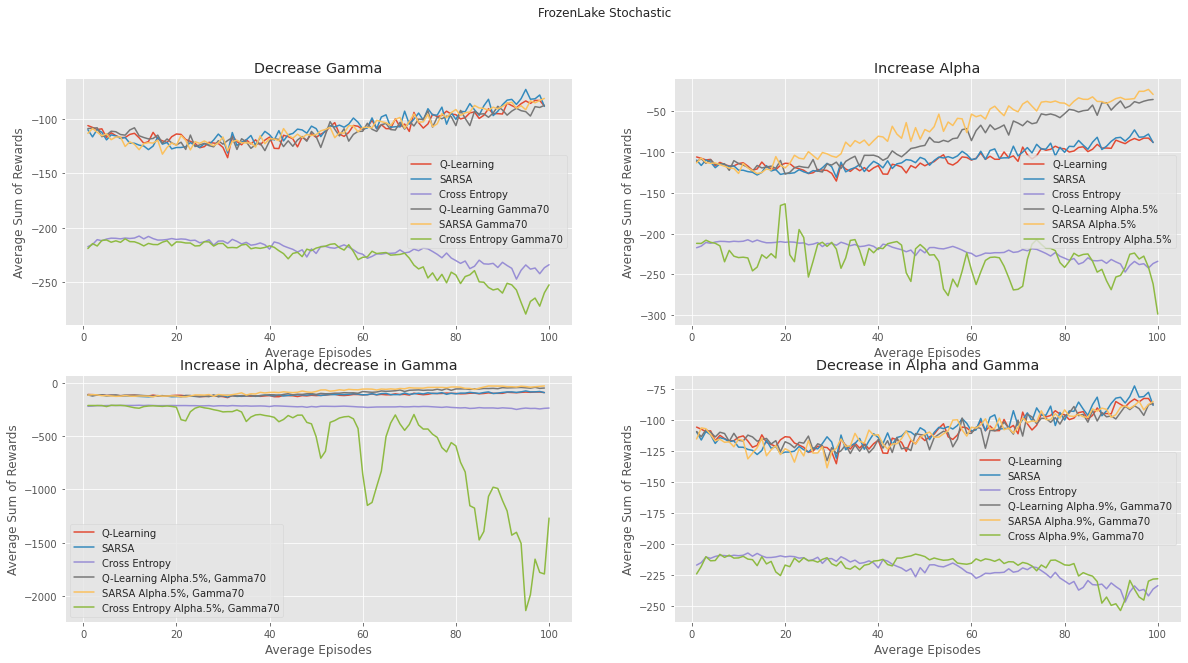

In [17]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('FrozenLake Stochastic')
axs[0,0].plot(q_x,q_y, label='Q-Learning')
axs[0,0].plot(s_x,s_y, label='SARSA')
axs[0,0].plot(c_x, c_y, label='Cross Entropy')
axs[0,0].plot(q_x_disc70, q_y_disc70, label='Q-Learning Gamma70')
axs[0,0].plot(s_x_disc70, s_y_disc70, label='SARSA Gamma70')
axs[0,0].plot(c_x_disc70, c_y_disc70, label='Cross Entropy Gamma70')

axs[0,1].plot(q_x,q_y, label='Q-Learning')
axs[0,1].plot(s_x,s_y, label='SARSA')
axs[0,1].plot(c_x, c_y, label='Cross Entropy')
axs[0,1].plot(q_x_alp10, q_y_alp10, label='Q-Learning Alpha.5%')
axs[0,1].plot(s_x_alp10, s_y_alp10, label='SARSA Alpha.5%')
axs[0,1].plot(c_x_alp10, c_y_alp10, label='Cross Entropy Alpha.5%')

axs[1,0].plot(q_x,q_y, label='Q-Learning')
axs[1,0].plot(s_x,s_y, label='SARSA')
axs[1,0].plot(c_x, c_y, label='Cross Entropy')
axs[1,0].plot(q_x_alp10Gamma70, q_y_alp10Gamma70, label='Q-Learning Alpha.5%, Gamma70')
axs[1,0].plot(s_x_alp10Gamma70, s_y_alp10Gamma70, label='SARSA Alpha.5%, Gamma70')
axs[1,0].plot(c_x_alp10Gamma70, c_y_alp10Gamma70, label='Cross Entropy Alpha.5%, Gamma70')

axs[1,1].plot(q_x,q_y, label='Q-Learning')
axs[1,1].plot(s_x,s_y, label='SARSA')
axs[1,1].plot(c_x, c_y, label='Cross Entropy')
axs[1,1].plot(q_x_alp001Gamma70, q_y_alp001Gamma70, label='Q-Learning Alpha.9%, Gamma70')
axs[1,1].plot(s_x_alp001Gamma70, s_y_alp001Gamma70, label='SARSA Alpha.9%, Gamma70')
axs[1,1].plot(c_x_alp001Gamma70, c_y_alp001Gamma70, label='Cross Alpha.9%, Gamma70')

axs[0,0].set_title('Decrease Gamma')
axs[0,1].set_title('Increase Alpha')
axs[1,0].set_title('Increase in Alpha, decrease in Gamma')
axs[1,1].set_title('Decrease in Alpha and Gamma')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='Average Episodes', ylabel='Average Sum of Rewards')
    
plt.show

All results showed that SARSA and Q-Learning bested Cross-entropy method for the CliffWalking environment. Changes in the hyperparameters showed significant changes. Notably, by increasing the alpha parameter Q-Learning and SARSA exceeded results of the baseline. 

Increase in alpha while reducing Gamma resulted to almost similar values for all variants of Q-Learning and SARSA. However, Cross-entropy became more erratic in the process.